# What makes a game succeed?

From the perspective of ICE, an online which sells video games all over the world, the principal objective of this project is to allow the company to spot potential big winners and plan advertising campaigns for the following year. For such purpose, the aim is to identify patterns that determine whether a game is likely to succeed or not.

User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales as at the end of 2016 are available from open sources.  Based on this, we'll be planning a campaign for 2017.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


First off, the libraries required for data storage, wrangling and visualization will be imported. Next, the dataframe containing data on games as of December 2016 is to be allocated in a dataframe, and then, after fixing any issues (missing values, inaccurate data types, odd values, etc.), we'll focus on identifying what features can determine the success of a game, for the sake of wisely deciding what new releases will be set in the spotlight of next year's advertising campaign.



# 1. Reading data



## 1.a) Import libraries



In [331]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats as st
from scipy import stats
import nltk

from nltk import wordnet
import seaborn as sns
import math

In [332]:
%cd

/home/jovyan


## 1.b) Load and inspect the dataset



**Data description**

— Name

— Platform

— Year_of_Release

— Genre

— NA_sales (North American sales in USD million)

— EU_sales (sales in Europe in USD million)

— JP_sales (sales in Japan in USD million)

— Other_sales (sales in other countries in USD million)

— Critic_Score (maximum of 100)

— User_Score (maximum of 10)

— Rating (ESRB)

Data for 2016 may be incomplete.

In [333]:
# Load the data file into a DataFrame
try:
    games_df=pd.read_csv('C:/Users/josef/Practicum/games.csv')
except:
    games_df=pd.read_csv('/datasets/games.csv')


In [334]:
#Print info 
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [335]:
# Print first five rows
games_df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [336]:
# Print last five rows
games_df.tail()

Name Platform  Year_of_Release       Genre  \
16710  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16711               LMA Manager 2007     X360           2006.0      Sports   
16712        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16713               Spirits & Spells      GBA           2003.0    Platform   
16714            Winning Post 8 2016      PSV           2016.0  Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
16710      0.00      0.00      0.01          0.0           NaN        NaN   
16711      0.00      0.01      0.00          0.0           NaN        NaN   
16712      0.00      0.00      0.01          0.0           NaN        NaN   
16713      0.01      0.00      0.00          0.0           NaN        NaN   
16714      0.00      0.00      0.01          0.0           NaN        NaN   

      Rating  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN

In [337]:
#Sum of missing values

games_df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [338]:
#Percentage of missing values

round(games_df.isna().sum()/len(games_df)*100,2)

Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

**From a first data overview, the issues requiring fix are:**

1. Column names: snake_case is respected, but there are uppercase characters in some names that need to be switched to lowercase.

2. Duplicates: assess if there are explicit or implicit duplicate rows

3. The following fixes/analyses are required for each column:  

**A) name:**
    
    - 2 missing values
    
    - Lemmatization and implicit duplicates analysis.
    

**B) genre:** 
    
    - 2 missing values.
    
    - Study unique values distribution.
  

**C) year_of_release:**
    
    - Change data type to integer.
    
    - 269 missing values require fix.
    
    
    
**D) Critic score:**

    - 8578 missing values need to be filled out.
    
    
**E) User score:**

    - Data type is to be switched from object to integer (if any string characters caused the auto-detection to fail, they'll be removed/replaced).

    -  6701 missing values need to be filled out.

   
**F) Rating:**

    - Information about the Entertainment Software Rating Board will be gathered from the web, as well, as a detail of what each achronym stands for.
    
    - Unique ratings will be assessed, and we will check they match those included in the ESRB web page.

    - 6766 missing values need to be filled out.

# 2. Data wrangling


### 2. a ) Fix column names: 

There are uppercase characters in some names that need to be switched to lowercase.




In [339]:
#Create dictionary for replacing column names to lower case
old_col_names= list(games_df.columns)
new_col_names= [name.lower() for name in old_col_names]
replace_dict= {old_col_names[i]: new_col_names[i] for i in range(len(old_col_names))}
replace_dict

{'Name': 'name',
 'Platform': 'platform',
 'Year_of_Release': 'year_of_release',
 'Genre': 'genre',
 'NA_sales': 'na_sales',
 'EU_sales': 'eu_sales',
 'JP_sales': 'jp_sales',
 'Other_sales': 'other_sales',
 'Critic_Score': 'critic_score',
 'User_Score': 'user_score',
 'Rating': 'rating'}

In [340]:
#Replace column names by lower case names
games_df.rename(columns=replace_dict, inplace=True)
games_df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

### 2. b) Check for explicit duplicates: 

Assess if there are complete duplicates within rows. If so, drop them out.

After addressing missing values, we'll also check for implicit duplicates in name.




In [341]:
#Filter out explicit duplicates
games_df[games_df.duplicated()]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

No rows fully duplicated were found


### 2.c) Fixes

### A & B) Name & Genre:

    1) Drop rows with missing values in 'name' and 'genre', as they are insignificant:

    name:                  2 (0.01%)
    genre:                 2 (0.01%)
  


In [342]:
#drop rows with missing values in name and genre
games_df.dropna(subset=['name','genre'], inplace = True)
games_df.reset_index(inplace=True, drop=True)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### A) Name 

Steps for addressing implicit duplicates:

1)Remove dots from name and lemmatize it.

2)Join words with no spaces.

3)Filter rows where lemmatized name and platform are the same.


In [343]:
#remove dots from name
games_df['name']=games_df['name'].str.replace('.','', regex=True)
games_df['name']=games_df['name'].str.lower()
games_df

name platform  year_of_release         genre  \
0                         wii sports      Wii           2006.0        Sports   
1                   super mario bros      NES           1985.0      Platform   
2                     mario kart wii      Wii           2008.0        Racing   
3                  wii sports resort      Wii           2009.0        Sports   
4           pokemon red/pokemon blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16708  samurai warriors: sanada maru      PS3           2016.0        Action   
16709               lma manager 2007     X360           2006.0        Sports   
16710        haitaka no psychedelica      PSV           2016.0     Adventure   
16711               spirits & spells      GBA           2003.0      Platform   
16712            winning post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16708      0.00      0.00      0.01         0.00           NaN        NaN   
16709      0.00      0.01      0.00         0.00           NaN        NaN   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.01      0.00      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16708    NaN  
16709    NaN  
16710    NaN  
16711    NaN  
16712    NaN  

[16713 rows x 11 columns]

In [344]:
#lemmatize name in a separate column
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(str(w)) for w in w_tokenizer.tokenize(text)]

games_df['lemmatized_name']=games_df.name.apply(lemmatize_text)
games_df['lemmatized_name']=games_df['lemmatized_name'].apply(lambda x: ''.join(x))
games_df

name platform  year_of_release         genre  \
0                         wii sports      Wii           2006.0        Sports   
1                   super mario bros      NES           1985.0      Platform   
2                     mario kart wii      Wii           2008.0        Racing   
3                  wii sports resort      Wii           2009.0        Sports   
4           pokemon red/pokemon blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16708  samurai warriors: sanada maru      PS3           2016.0        Action   
16709               lma manager 2007     X360           2006.0        Sports   
16710        haitaka no psychedelica      PSV           2016.0     Adventure   
16711               spirits & spells      GBA           2003.0      Platform   
16712            winning post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16708      0.00      0.00      0.01         0.00           NaN        NaN   
16709      0.00      0.01      0.00         0.00           NaN        NaN   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.01      0.00      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   

      rating             lemmatized_name  
0          E                    wiisport  
1        NaN              supermariobros  
2          E                mariokartwii  
3          E              wiisportresort  
4        NaN      pokemonred/pokemonblue  
...      ...                         ...  
16708    NaN  samuraiwarriors:sanadamaru  
16709    NaN              lmamanager2007  
16710    NaN       haitakanopsychedelica  
16711    NaN                spirit&spell  
16712    NaN            winningpost82016  

[16713 rows x 12 columns]

In [345]:
#filter lemmatized name duplicates 
games_df[games_df['name'].duplicated()].sort_values(by=['lemmatized_name', 'platform'])

name platform  year_of_release       genre  \
9506       007: quantum of solace       DS           2008.0      Action   
14656      007: quantum of solace       PC           2008.0      Action   
4474       007: quantum of solace      PS2           2008.0      Action   
1784       007: quantum of solace      PS3           2008.0      Action   
3119       007: quantum of solace      Wii           2008.0      Action   
...                           ...      ...              ...         ...   
11641           zoo tycoon (2013)     X360           2013.0  Simulation   
3515                zumba fitness      PS3           2010.0      Sports   
668                 zumba fitness     X360           2010.0      Sports   
7136   zumba fitness: world party      Wii           2013.0        Misc   
13171          zumba fitness core     X360           2012.0        Misc   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
9506       0.11      0.01      0.00         0.01          65.0        tbd   
14656      0.01      0.01      0.00         0.00          70.0        6.3   
4474       0.17      0.00      0.00         0.26           NaN        NaN   
1784       0.43      0.51      0.02         0.19          65.0        6.6   
3119       0.29      0.28      0.01         0.07          54.0        7.5   
...         ...       ...       ...          ...           ...        ...   
11641      0.02      0.06      0.00         0.01           NaN        NaN   
3515       0.28      0.21      0.00         0.08           NaN        3.8   
668        1.74      0.45      0.00         0.18          42.0        5.5   
7136       0.11      0.10      0.00         0.02           NaN        tbd   
13171      0.00      0.05      0.00         0.00          77.0        6.7   

      rating          lemmatized_name  
9506       T      007:quantumofsolace  
14656      T      007:quantumofsolace  
4474     NaN      007:quantumofsolace  
1784       T      007:quantumofsolace  
3119       T      007:quantumofsolace  
...      ...                      ...  
11641    NaN          zootycoon(2013)  
3515       E             zumbafitness  
668        E             zumbafitness  
7136       E  zumbafitness:worldparty  
13171   E10+         zumbafitnesscore  

[5154 rows x 12 columns]

A very large amount of duplicated names was detected. But apparently, even though the game's name is one, the platforms differ (meaning that it was released for several platforms in different years). Next, we'll filter out rows where lemmatized name & platform match.



In [346]:
#print rows where lemmatized name & platform are the same, sorted by name, platform and year
games_df[games_df.duplicated(subset=['lemmatized_name','platform'], keep=False)].sort_values(by=['lemmatized_name','platform','year_of_release'])

name platform  year_of_release     genre  \
604                  madden nfl 13      PS3           2012.0    Sports   
16228                madden nfl 13      PS3           2012.0    Sports   
5971   need for speed: most wanted       PC           2005.0    Racing   
11714  need for speed: most wanted       PC           2012.0    Racing   
1590   need for speed: most wanted     X360           2005.0    Racing   
1189   need for speed: most wanted     X360           2012.0    Racing   
1744            sonic the hedgehog      PS3           2006.0  Platform   
4126            sonic the hedgehog      PS3              NaN  Platform   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
604        2.11      0.22      0.00         0.23          83.0        5.5   
16228      0.00      0.01      0.00         0.00          83.0        5.5   
5971       0.02      0.23      0.00         0.04          82.0        8.5   
11714      0.00      0.06      0.00         0.02          82.0        8.5   
1590       1.00      0.13      0.02         0.10          83.0        8.5   
1189       0.62      0.78      0.01         0.15          83.0        8.5   
1744       0.41      0.06      0.04         0.66          43.0        4.1   
4126       0.00      0.48      0.00         0.00          43.0        4.1   

      rating          lemmatized_name  
604        E              maddennfl13  
16228      E              maddennfl13  
5971       T  needforspeed:mostwanted  
11714      T  needforspeed:mostwanted  
1590       T  needforspeed:mostwanted  
1189       T  needforspeed:mostwanted  
1744    E10+         sonicthehedgehog  
4126    E10+         sonicthehedgehog

The rows related to the same game & platform will be treated as follows:

a) maddennfl13: everything but sales matches, hence we'll add them up and get rid of one row.

b) needforspeed: mostwanted year of releace for PC platform and X360 seem to be inverted. We'll try to figure out what year each platform had more games released in, and assign 2005 and 2012 accordingly, appart from grouping sales and dropping one of the rows for each platform.

c) sonicthehedgehog: we'll use the row where year of release is not empty, add sales from both rows, and drop the one with the year missing.



In [347]:
#add sales for maddennfl13 compatible with PS3 :

for column in games_df.columns[games_df.columns.str.contains('sales')]:
    games_df.loc[(games_df['lemmatized_name']=='maddennfl13') & (games_df['platform']=='PS3'),column]= games_df.loc[(games_df['lemmatized_name']=='maddennfl13') & (games_df['platform']=='PS3'),column].sum()
    

#check it worked (now rows should account for as duplicates)
games_df[games_df.duplicated(keep=False)]

name platform  year_of_release   genre  na_sales  eu_sales  \
604    madden nfl 13      PS3           2012.0  Sports      2.11      0.23   
16228  madden nfl 13      PS3           2012.0  Sports      2.11      0.23   

       jp_sales  other_sales  critic_score user_score rating lemmatized_name  
604         0.0         0.23          83.0        5.5      E     maddennfl13  
16228       0.0         0.23          83.0        5.5      E     maddennfl13

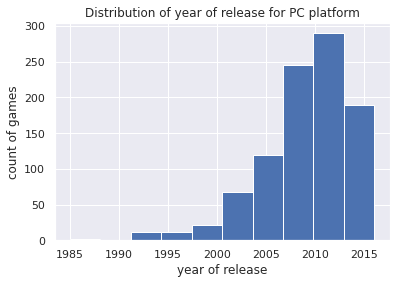

In [348]:
#Asses what year of release (2005 vs 2012) suits PC & X360 best

games_df[games_df['platform']=='PC']['year_of_release'].hist(figsize=(6,4))
plt.title('Distribution of year of release for PC platform')

plt.xlabel('year of release')
plt.ylabel('count of games')
plt.show()

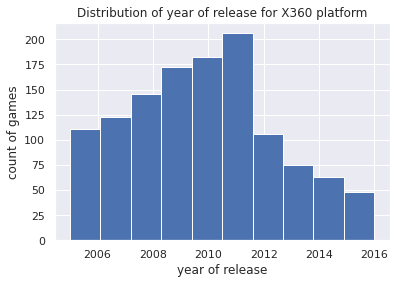

In [349]:
games_df[games_df['platform']=='X360']['year_of_release'].hist(figsize=(6,4))
plt.title('Distribution of year of release for X360 platform')
plt.xlabel('year of release')
plt.ylabel('count of games')
plt.show()

Based on the charts above, the decison is to use 2005 for the X360 platform and 2012 for the PC one



In [350]:
#Set year of release as 2012 and add sales for needforspeed:mostwanted compatible with PC :

games_df.loc[(games_df['lemmatized_name']=='needforspeed:mostwanted') & (games_df['platform']=='PC'), 'year_of_release']=  2012


for column in games_df.columns[games_df.columns.str.contains('sales')]:
    games_df.loc[(games_df['lemmatized_name']=='needforspeed:mostwanted') & (games_df['platform']=='PC'),column]= games_df.loc[(games_df['lemmatized_name']=='needforspeed:mostwanted') & (games_df['platform']=='PC'),column].sum()
    

#check it worked (now rows should account for as duplicates)
games_df[games_df.duplicated(keep=False)]

name platform  year_of_release   genre  \
604                  madden nfl 13      PS3           2012.0  Sports   
5971   need for speed: most wanted       PC           2012.0  Racing   
11714  need for speed: most wanted       PC           2012.0  Racing   
16228                madden nfl 13      PS3           2012.0  Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
604        2.11      0.23       0.0         0.23          83.0        5.5   
5971       0.02      0.29       0.0         0.06          82.0        8.5   
11714      0.02      0.29       0.0         0.06          82.0        8.5   
16228      2.11      0.23       0.0         0.23          83.0        5.5   

      rating          lemmatized_name  
604        E              maddennfl13  
5971       T  needforspeed:mostwanted  
11714      T  needforspeed:mostwanted  
16228      E              maddennfl13

In [351]:
#Set year of release as 2005 and add sales for needforspeed:mostwanted compatible with x360 :

games_df.loc[(games_df['lemmatized_name']=='needforspeed:mostwanted') & (games_df['platform']=='X360'), 'year_of_release']=  2005


for column in games_df.columns[games_df.columns.str.contains('sales')]:
    games_df.loc[(games_df['lemmatized_name']=='needforspeed:mostwanted') & (games_df['platform']=='X360'),column]= games_df.loc[(games_df['lemmatized_name']=='needforspeed:mostwanted') & (games_df['platform']=='X360'),column].sum()
    

#check it worked (now rows should account for as duplicates)
games_df[games_df.duplicated(keep=False)]

name platform  year_of_release   genre  \
604                  madden nfl 13      PS3           2012.0  Sports   
1189   need for speed: most wanted     X360           2005.0  Racing   
1590   need for speed: most wanted     X360           2005.0  Racing   
5971   need for speed: most wanted       PC           2012.0  Racing   
11714  need for speed: most wanted       PC           2012.0  Racing   
16228                madden nfl 13      PS3           2012.0  Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
604        2.11      0.23      0.00         0.23          83.0        5.5   
1189       1.62      0.91      0.03         0.25          83.0        8.5   
1590       1.62      0.91      0.03         0.25          83.0        8.5   
5971       0.02      0.29      0.00         0.06          82.0        8.5   
11714      0.02      0.29      0.00         0.06          82.0        8.5   
16228      2.11      0.23      0.00         0.23          83.0        5.5   

      rating          lemmatized_name  
604        E              maddennfl13  
1189       T  needforspeed:mostwanted  
1590       T  needforspeed:mostwanted  
5971       T  needforspeed:mostwanted  
11714      T  needforspeed:mostwanted  
16228      E              maddennfl13

In [352]:

#Set year of release as 2006 and add sales for sonicthehedgehog compatible with PS3 :

games_df.loc[(games_df['lemmatized_name']=='sonicthehedgehog') & (games_df['platform']=='PS3'), 'year_of_release']=  2006


for column in games_df.columns[games_df.columns.str.contains('sales')]:
    games_df.loc[(games_df['lemmatized_name']=='sonicthehedgehog') & (games_df['platform']=='PS3'),column]= games_df.loc[(games_df['lemmatized_name']=='sonicthehedgehog') & (games_df['platform']=='PS3'),column].sum()
    

#check it worked (now rows should account for as duplicates)
games_df[games_df.duplicated(keep=False)]

name platform  year_of_release     genre  \
604                  madden nfl 13      PS3           2012.0    Sports   
1189   need for speed: most wanted     X360           2005.0    Racing   
1590   need for speed: most wanted     X360           2005.0    Racing   
1744            sonic the hedgehog      PS3           2006.0  Platform   
4126            sonic the hedgehog      PS3           2006.0  Platform   
5971   need for speed: most wanted       PC           2012.0    Racing   
11714  need for speed: most wanted       PC           2012.0    Racing   
16228                madden nfl 13      PS3           2012.0    Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
604        2.11      0.23      0.00         0.23          83.0        5.5   
1189       1.62      0.91      0.03         0.25          83.0        8.5   
1590       1.62      0.91      0.03         0.25          83.0        8.5   
1744       0.41      0.54      0.04         0.66          43.0        4.1   
4126       0.41      0.54      0.04         0.66          43.0        4.1   
5971       0.02      0.29      0.00         0.06          82.0        8.5   
11714      0.02      0.29      0.00         0.06          82.0        8.5   
16228      2.11      0.23      0.00         0.23          83.0        5.5   

      rating          lemmatized_name  
604        E              maddennfl13  
1189       T  needforspeed:mostwanted  
1590       T  needforspeed:mostwanted  
1744    E10+         sonicthehedgehog  
4126    E10+         sonicthehedgehog  
5971       T  needforspeed:mostwanted  
11714      T  needforspeed:mostwanted  
16228      E              maddennfl13

In [353]:
#Print len before dupplicates drop
len(games_df)

16713

In [354]:
#Drop duplicates to keep only one row for each of the previous repeated lines:

games_df.drop_duplicates(inplace=True)

games_df.reset_index(inplace=True, drop=True)
len(games_df)

16709

We can see the length was reduced by 4 rows, so it worked correctly.



In [355]:
#drop lemmatized name column
games_df.drop('lemmatized_name',axis=1,inplace=True)
games_df

name platform  year_of_release         genre  \
0                         wii sports      Wii           2006.0        Sports   
1                   super mario bros      NES           1985.0      Platform   
2                     mario kart wii      Wii           2008.0        Racing   
3                  wii sports resort      Wii           2009.0        Sports   
4           pokemon red/pokemon blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16704  samurai warriors: sanada maru      PS3           2016.0        Action   
16705               lma manager 2007     X360           2006.0        Sports   
16706        haitaka no psychedelica      PSV           2016.0     Adventure   
16707               spirits & spells      GBA           2003.0      Platform   
16708            winning post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16704      0.00      0.00      0.01         0.00           NaN        NaN   
16705      0.00      0.01      0.00         0.00           NaN        NaN   
16706      0.00      0.00      0.01         0.00           NaN        NaN   
16707      0.01      0.00      0.00         0.00           NaN        NaN   
16708      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16704    NaN  
16705    NaN  
16706    NaN  
16707    NaN  
16708    NaN  

[16709 rows x 11 columns]

### B) Genre

Study unique values in genre


In [356]:
#Print unique values count
games_df['genre'].value_counts()

Action          3369
Sports          2347
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1247
Platform         887
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

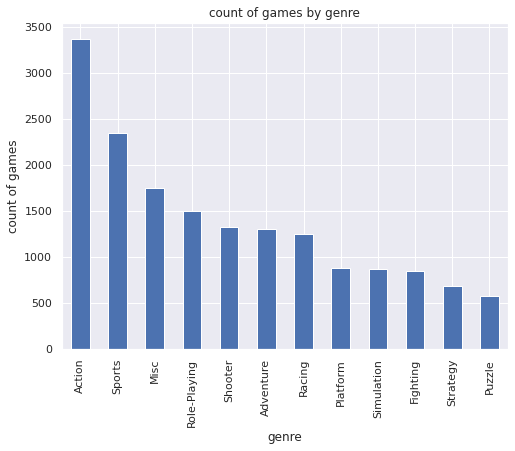

In [357]:
#Plot unique values count
games_df['genre'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('count of games by genre')
plt.xlabel('genre')
plt.ylabel('count of games')
plt.show()

There are some genres raising doubt on being sub-genres. To find out more about this issue, we made some research about videogames genres and sub-genres. The results were as follows:

**Genres:**
- Action 

    - **Sub-genres:**
    -  Platform: the game’s character interacts with platforms (usually running, jumping, or falling) throughout the gameplay.
    - Shooter: players use weapons to engage in the action, with the goal usually being to take out enemies or opposing players.
    - Fighthing: focus the action on combat, and in most cases, hand-to-hand combat.
    
- Adventure 
- Role-playing 
- Simulation 
- Strategy 
- Sports
    - **Sub-genres:**
    - Racing
- Puzzle


  
Source:
https://www.idtech.com/blog/different-types-of-video-game-genres

In [358]:
#create dictionary with sub-genres to be groupped in their respective genre:

subgenre_dict= {'Platform':'Action', 'Shooter':'Action', 'Fighting':'Action', 'Racing':'Sports'}

In [359]:
subgenre_dict.keys()

dict_keys(['Platform', 'Shooter', 'Fighting', 'Racing'])

In [360]:
#replace sub-genres by their genre:
for i in range(len(games_df)):
    current_genre= games_df.loc[i,'genre']
    
    
    if current_genre in subgenre_dict.keys():
        replacement_genre= subgenre_dict[current_genre]
        games_df.loc[i,'genre'] = replacement_genre
    else:
        continue

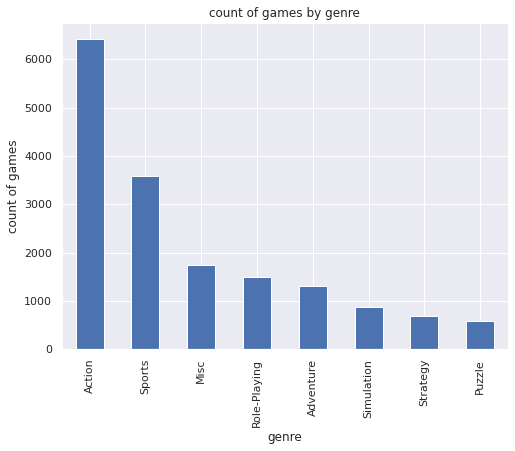

In [361]:
#Re-plot unique values count
games_df['genre'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('count of games by genre')
plt.xlabel('genre')
plt.ylabel('count of games')
plt.show()

### C) Year of release




     As for year_of_release: after addressing missing values , we'll change the data type to integer:

    year_of_release: 268 missing values - one was fixed just above- (1.61%). Even though the low % of missing values could indicate that dropping the rows is the most effective way to deal with them, we'll first assess if there's a way to fix them so as not to lose part of the dataset.
    
    a) If the name of the game discloses any year, use that value.
    
    b) For the rest, address the feasibility of replacing missing values with the mean/median year of release for the games compatible with the same platform: usually, games are launched for a given platform when it is in trend, and platforms tend to deprecate one another (once they lose popularity, they're withdrawn from the market). Based on that assumption:
    
        b.1) The mean and median year of release for every platform with missing values in the former column will be compared. Provided that there are no significant differences (the year of release is not skewed):
        
        b.2) We'll study the distribution of year of release for each platform. For those platforms which values fall around a relatively short year interval (less than 5 years), we'll use the median/mean to replace the missing values. For the rest, we'll drop the rows.





    2.a) Change data type.
    

In [362]:
#change dtype of year_of_release to integer (in case there are decimal values, they'll be rounded)
games_df.loc[games_df['year_of_release'].isna()==False,'year_of_release']=games_df.loc[games_df['year_of_release'].isna()==False,'year_of_release'].astype(int)

    2.a) If the name of the game discloses any year, use that value.
       

In [363]:
#Missing values: year of release
n_missing_year= games_df['year_of_release'].isna().sum()
perc_missing_year=round(games_df['year_of_release'].isna().sum()/len(games_df)*100,2)

print(f'There are {n_missing_year} rows missing the year of release, representing the {perc_missing_year}% of the dataset')

There are 268 rows missing the year of release, representing the 1.6% of the dataset


In [364]:
#Print rows missing year of release, but where the name of the game includes any year starting with 20 
index_year_in_name= list(games_df[(games_df['year_of_release'].isna()) & (games_df['name'].str.contains('20'))].index)

games_df[(games_df['year_of_release'].isna()) & (games_df['name'].str.contains('20')) ]



name platform  year_of_release   genre  \
183                      madden nfl 2004      PS2              NaN  Sports   
377                     fifa soccer 2004      PS2              NaN  Sports   
475            wwe smackdown vs raw 2006      PS2              NaN  Action   
1648                 nascar thunder 2003      PS2              NaN  Sports   
2490                  mlb slugfest 20-03      PS2              NaN  Sports   
2570      pes 2009: pro evolution soccer      PSP              NaN  Sports   
3484                     madden nfl 2002       XB              NaN  Sports   
4772                    nfl gameday 2003      PS2              NaN  Sports   
5153                       nba live 2003       XB              NaN  Sports   
5333                  tomb raider (2013)       PC              NaN  Action   
5652              all-star baseball 2005      PS2              NaN  Sports   
5886                       nba live 2003       GC              NaN  Sports   
6951                             jet x20      PS2              NaN  Sports   
8915              all-star baseball 2005       XB              NaN  Sports   
13191                tour de france 2011     X360              NaN  Sports   
13925                    sega rally 2006      PS2              NaN  Sports   
15948  pdc world championship darts 2008       DS              NaN  Sports   
16074              football manager 2007     X360              NaN  Sports   
16367  pdc world championship darts 2008      PSP              NaN  Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
183        4.26      0.26      0.01         0.71          94.0        8.5   
377        0.59      2.36      0.04         0.51          84.0        6.4   
475        1.57      1.02      0.00         0.41           NaN        NaN   
1648       0.60      0.46      0.00         0.16          84.0        8.7   
2490       0.41      0.32      0.00         0.11          77.0        8.2   
2570       0.04      0.33      0.26         0.17           NaN        NaN   
3484       0.53      0.02      0.00         0.03          90.0        8.1   
4772       0.20      0.15      0.00         0.05          60.0        tbd   
5153       0.31      0.04      0.00         0.01          82.0        8.8   
5333       0.06      0.25      0.00         0.04          86.0        8.5   
5652       0.16      0.12      0.00         0.04          72.0        8.6   
5886       0.23      0.06      0.00         0.01          82.0        8.2   
6951       0.11      0.09      0.00         0.03           NaN        NaN   
8915       0.11      0.03      0.00         0.01          75.0        8.8   
13191      0.00      0.04      0.00         0.01          46.0        7.6   
13925      0.00      0.00      0.04         0.00           NaN        NaN   
15948      0.01      0.00      0.00         0.00           NaN        NaN   
16074      0.00      0.01      0.00         0.00           NaN        NaN   
16367      0.01      0.00      0.00         0.00          43.0        tbd   

      rating  
183        E  
377        E  
475      NaN  
1648       E  
2490       E  
2570     NaN  
3484       E  
4772       E  
5153       E  
5333       M  
5652       E  
5886       E  
6951     NaN  
8915       E  
13191    NaN  
13925    NaN  
15948    NaN  
16074    NaN  
16367   E10+

In [365]:
#Print rows missing year of release, but where the name of the game includes any year starting with 19
games_df[(games_df['year_of_release'].isna()) & (games_df['name'].str.contains('19'))]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

In [366]:
#print count of rows where the name contains any year starting with 20
len(games_df[(games_df['year_of_release'].isna()) & (games_df['name'].str.contains('20'))])

19

In [367]:
#If year is in name, fill out missing value with that year
for row in range(len(games_df)):
    for i in range(1980,2017):
        if pd.notnull(games_df.loc[row,'name']) and (str(i) in games_df.loc[row,'name']):
            games_df.loc[row,'year_of_release'] = i
        else:
            continue

In [368]:
#check replacement worked correctly
games_df.iloc[index_year_in_name]

name platform  year_of_release   genre  \
183                      madden nfl 2004      PS2           2004.0  Sports   
377                     fifa soccer 2004      PS2           2004.0  Sports   
475            wwe smackdown vs raw 2006      PS2           2006.0  Action   
1648                 nascar thunder 2003      PS2           2003.0  Sports   
2490                  mlb slugfest 20-03      PS2              NaN  Sports   
2570      pes 2009: pro evolution soccer      PSP           2009.0  Sports   
3484                     madden nfl 2002       XB           2002.0  Sports   
4772                    nfl gameday 2003      PS2           2003.0  Sports   
5153                       nba live 2003       XB           2003.0  Sports   
5333                  tomb raider (2013)       PC           2013.0  Action   
5652              all-star baseball 2005      PS2           2005.0  Sports   
5886                       nba live 2003       GC           2003.0  Sports   
6951                             jet x20      PS2              NaN  Sports   
8915              all-star baseball 2005       XB           2005.0  Sports   
13191                tour de france 2011     X360           2011.0  Sports   
13925                    sega rally 2006      PS2           2006.0  Sports   
15948  pdc world championship darts 2008       DS           2008.0  Sports   
16074              football manager 2007     X360           2007.0  Sports   
16367  pdc world championship darts 2008      PSP           2008.0  Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
183        4.26      0.26      0.01         0.71          94.0        8.5   
377        0.59      2.36      0.04         0.51          84.0        6.4   
475        1.57      1.02      0.00         0.41           NaN        NaN   
1648       0.60      0.46      0.00         0.16          84.0        8.7   
2490       0.41      0.32      0.00         0.11          77.0        8.2   
2570       0.04      0.33      0.26         0.17           NaN        NaN   
3484       0.53      0.02      0.00         0.03          90.0        8.1   
4772       0.20      0.15      0.00         0.05          60.0        tbd   
5153       0.31      0.04      0.00         0.01          82.0        8.8   
5333       0.06      0.25      0.00         0.04          86.0        8.5   
5652       0.16      0.12      0.00         0.04          72.0        8.6   
5886       0.23      0.06      0.00         0.01          82.0        8.2   
6951       0.11      0.09      0.00         0.03           NaN        NaN   
8915       0.11      0.03      0.00         0.01          75.0        8.8   
13191      0.00      0.04      0.00         0.01          46.0        7.6   
13925      0.00      0.00      0.04         0.00           NaN        NaN   
15948      0.01      0.00      0.00         0.00           NaN        NaN   
16074      0.00      0.01      0.00         0.00           NaN        NaN   
16367      0.01      0.00      0.00         0.00          43.0        tbd   

      rating  
183        E  
377        E  
475      NaN  
1648       E  
2490       E  
2570     NaN  
3484       E  
4772       E  
5153       E  
5333       M  
5652       E  
5886       E  
6951     NaN  
8915       E  
13191    NaN  
13925    NaN  
15948    NaN  
16074    NaN  
16367   E10+

      2.b) For the rest, assess the feasibility of replacing missing values with the mean/median year of release for the games compatible with the same platform: usually, games are launched for a given platform when it is in trend, and platforms generally deprecate one another (once they lose popularity, no more games are launched for it). Based on that assumption:
    
  

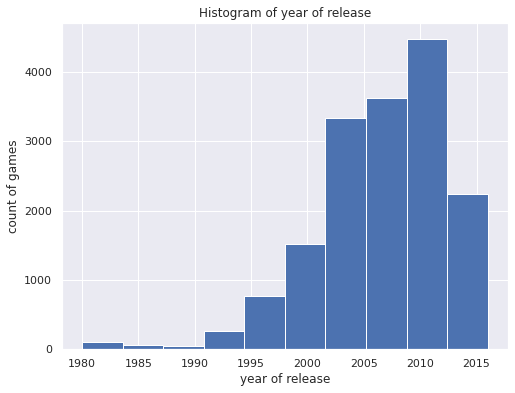

In [369]:
#Plot the distribution of year of release overall
games_df['year_of_release'].hist(figsize=(8,6))
plt.xlabel('year of release')

plt.ylabel('count of games')

plt.title('Histogram of year of release')
plt.show()

In [370]:
#Missing values: year of release
n_missing_year= games_df['year_of_release'].isna().sum()
perc_missing_year=round(games_df['year_of_release'].isna().sum()/len(games_df)*100,2)

print(f'There are {n_missing_year} rows missing the year of release, representing the {perc_missing_year}% of the dataset')

There are 251 rows missing the year of release, representing the 1.5% of the dataset


In [371]:
#list platforms for which there are missing years
platform_missing_years= list(games_df.loc[games_df['year_of_release'].isna(),'platform'].unique())
platform_missing_years

['Wii',
 '2600',
 'X360',
 'GBA',
 'PC',
 'PS3',
 'PS',
 'PSP',
 'XB',
 'PS2',
 'GB',
 'DS',
 'GC',
 '3DS',
 'N64',
 'PSV']

In [372]:
#Print basic statistics of year of release
games_df['year_of_release'].describe()

count    16458.000000
mean      2006.511848
std          5.867820
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

        2.b.1) The mean and median year of release for every platform with missing values in the former column will be compared. Provided that there are no significant differences (the year of release is not skewed):
        


In [373]:
#Compare mean and median year_of_release for platforms with missing values in that column:
games_df_platform_missing_year= games_df.loc[games_df['platform'].isin(platform_missing_years)]
games_df_platform_missing_year.pivot_table(index='platform', values='year_of_release',aggfunc=['mean','median', lambda x: x.median()-x.mean()])


mean          median        <lambda>
         year_of_release year_of_release year_of_release
platform                                                
2600         1982.137931          1982.0       -0.137931
3DS          2013.132812          2013.0       -0.132812
DS           2008.193685          2008.0       -0.193685
GB           1995.958763          1997.0        1.041237
GBA          2003.231813          2003.0       -0.231813
GC           2003.449355          2003.0       -0.449355
N64          1998.604430          1999.0        0.395570
PC           2008.967607          2010.0        1.032393
PS           1998.067227          1998.0       -0.067227
PS2          2004.611528          2005.0        0.388472
PS3          2010.858238          2011.0        0.141762
PSP          2008.747280          2009.0        0.252720
PSV          2014.135198          2014.0       -0.135198
Wii          2008.989114          2009.0        0.010886
X360         2009.904298          2010.0        0.095702
XB           2003.696030          2004.0        0.303970

        2.b.2) We'll study the distribution of year of release for each platform. For those platforms which values fall around a relatively short year interval (less than 5 years), we'll use the median/mean to replace the missing values. For the rest, we'll drop the rows.

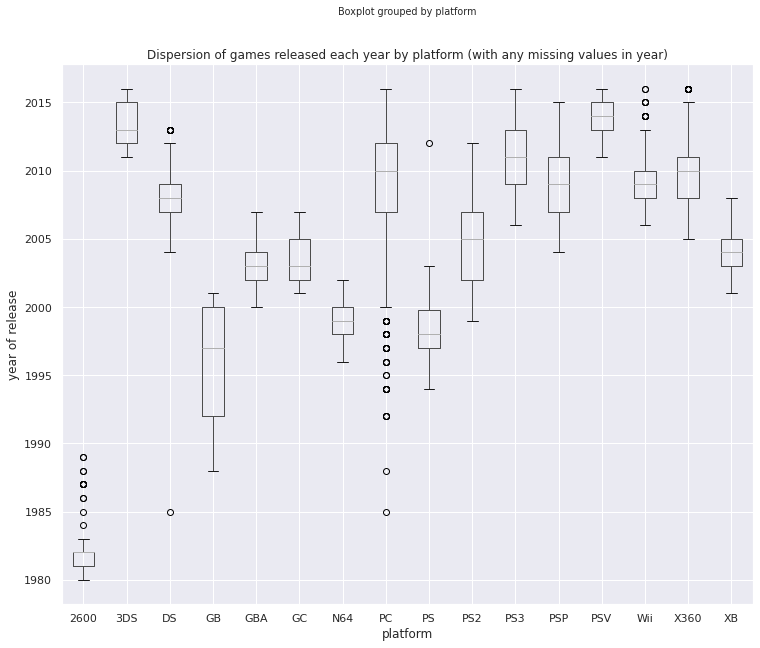

In [374]:
# Since platforms usually deprecate over time, games launch is highly correlated to the period 
#in which they were on trend.
#we see the median barely differs from the mean,
#what means dispersion is not high.

games_df_platform_missing_year.boxplot(column='year_of_release', by='platform', figsize=(12,10))
plt.ylabel('year of release')
plt.xlabel('platform')
plt.title('Dispersion of games released each year by platform (with any missing values in year)')
plt.show()

In [375]:
#Print the min, median and max year of release for games compatible with each platform, as well as the years
#between min and max value

platform_by_year =games_df_platform_missing_year.pivot_table(index='platform', values='year_of_release', aggfunc=['min','median','max',lambda x: x.max()-x.min()])
platform_by_year.columns=['min_year', 'median_year','max_year', 'max_year-min_year']
platform_by_year.reset_index(inplace=True)
platform_by_year

platform  min_year  median_year  max_year  max_year-min_year
0      2600    1980.0       1982.0    1989.0                9.0
1       3DS    2011.0       2013.0    2016.0                5.0
2        DS    1985.0       2008.0    2013.0               28.0
3        GB    1988.0       1997.0    2001.0               13.0
4       GBA    2000.0       2003.0    2007.0                7.0
5        GC    2001.0       2003.0    2007.0                6.0
6       N64    1996.0       1999.0    2002.0                6.0
7        PC    1985.0       2010.0    2016.0               31.0
8        PS    1994.0       1998.0    2012.0               18.0
9       PS2    1999.0       2005.0    2012.0               13.0
10      PS3    2006.0       2011.0    2016.0               10.0
11      PSP    2004.0       2009.0    2015.0               11.0
12      PSV    2011.0       2014.0    2016.0                5.0
13      Wii    2006.0       2009.0    2016.0               10.0
14     X360    2005.0       2010.0    2016.0               11.0
15       XB    2001.0       2004.0    2008.0                7.0

In [376]:
#Print count of missing values by platform
missing_year_by_platform= pd.DataFrame(games_df.loc[games_df['year_of_release'].isna(),'platform'].value_counts())
missing_year_by_platform.rename(columns={'platform': 'count_of_missing_year'},inplace=True)
missing_year_by_platform

count_of_missing_year
Wii                      34
DS                       29
X360                     28
PS2                      27
PS3                      24
XB                       18
2600                     17
PC                       16
PSP                      14
GC                       13
GBA                      11
3DS                       8
PS                        7
N64                       3
GB                        1
PSV                       1

In [377]:
#Merge measures and count of missing year values
platform_by_year_missing= platform_by_year.merge(missing_year_by_platform, left_on='platform', right_index=True, how='left')
platform_by_year_missing

platform  min_year  median_year  max_year  max_year-min_year  \
0      2600    1980.0       1982.0    1989.0                9.0   
1       3DS    2011.0       2013.0    2016.0                5.0   
2        DS    1985.0       2008.0    2013.0               28.0   
3        GB    1988.0       1997.0    2001.0               13.0   
4       GBA    2000.0       2003.0    2007.0                7.0   
5        GC    2001.0       2003.0    2007.0                6.0   
6       N64    1996.0       1999.0    2002.0                6.0   
7        PC    1985.0       2010.0    2016.0               31.0   
8        PS    1994.0       1998.0    2012.0               18.0   
9       PS2    1999.0       2005.0    2012.0               13.0   
10      PS3    2006.0       2011.0    2016.0               10.0   
11      PSP    2004.0       2009.0    2015.0               11.0   
12      PSV    2011.0       2014.0    2016.0                5.0   
13      Wii    2006.0       2009.0    2016.0               10.0   
14     X360    2005.0       2010.0    2016.0               11.0   
15       XB    2001.0       2004.0    2008.0                7.0   

    count_of_missing_year  
0                      17  
1                       8  
2                      29  
3                       1  
4                      11  
5                      13  
6                       3  
7                      16  
8                       7  
9                      27  
10                     24  
11                     14  
12                      1  
13                     34  
14                     28  
15                     18

Conclusion: even though the year of release is not skewed in any of the platforms under analysis (the mean and median are almost the same), the values are too widely distributed and using either of both measures could cause distorsions in the analysis. Since the portion of rows with missing values is less than the 2% of the dataset, the safest way to go is dropping them off.

In [378]:
#Drop rows where year of release is missing
games_df.dropna(subset=['year_of_release'], inplace=True)
games_df.reset_index(inplace=True, drop=True)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16458 entries, 0 to 16457
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16458 non-null  object 
 1   platform         16458 non-null  object 
 2   year_of_release  16458 non-null  float64
 3   genre            16458 non-null  object 
 4   na_sales         16458 non-null  float64
 5   eu_sales         16458 non-null  float64
 6   jp_sales         16458 non-null  float64
 7   other_sales      16458 non-null  float64
 8   critic_score     7992 non-null   float64
 9   user_score       9848 non-null   object 
 10  rating           9776 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Lastly, the data type will be switched to integer

In [379]:
#Change to integer
games_df['year_of_release'] = games_df['year_of_release'].astype(int)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16458 entries, 0 to 16457
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16458 non-null  object 
 1   platform         16458 non-null  object 
 2   year_of_release  16458 non-null  int64  
 3   genre            16458 non-null  object 
 4   na_sales         16458 non-null  float64
 5   eu_sales         16458 non-null  float64
 6   jp_sales         16458 non-null  float64
 7   other_sales      16458 non-null  float64
 8   critic_score     7992 non-null   float64
 9   user_score       9848 non-null   object 
 10  rating           9776 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


### D) Critic score (maximum of 100)

- 8578 missing values needed to be filled out, but some were removed in the previous steps. Now there are 8466 rows with empty values.

In [380]:
#Preview of rows where critic score is missing
games_df[games_df['critic_score'].isna()]

name platform  year_of_release         genre  \
1                   super mario bros      NES             1985        Action   
4           pokemon red/pokemon blue       GB             1996  Role-Playing   
5                             tetris       GB             1989        Puzzle   
9                          duck hunt      NES             1984        Action   
10                        nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16453  samurai warriors: sanada maru      PS3             2016        Action   
16454               lma manager 2007     X360             2007        Sports   
16455        haitaka no psychedelica      PSV             2016     Adventure   
16456               spirits & spells      GBA             2003        Action   
16457            winning post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1         29.08      3.58      6.81         0.77           NaN        NaN   
4         11.27      8.89     10.22         1.00           NaN        NaN   
5         23.20      2.26      4.22         0.58           NaN        NaN   
9         26.93      0.63      0.28         0.47           NaN        NaN   
10         9.05     10.95      1.93         2.74           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16453      0.00      0.00      0.01         0.00           NaN        NaN   
16454      0.00      0.01      0.00         0.00           NaN        NaN   
16455      0.00      0.00      0.01         0.00           NaN        NaN   
16456      0.01      0.00      0.00         0.00           NaN        NaN   
16457      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16453    NaN  
16454    NaN  
16455    NaN  
16456    NaN  
16457    NaN  

[8466 rows x 11 columns]

Apparently, in many rows at which this value is missing, user_score and rating are also empty. Let's count for how many rows we're missing values in the three columns.

In [381]:
#Print count of rows where all of them are missing
missing_all_scores_df=games_df[games_df['user_score'].isna() & games_df['critic_score'].isna() &  games_df['rating'].isna()]
count_missing_all_scores=len(missing_all_scores_df)
count_missing_all_scores

6539

In [382]:
#create df where not all scoring/rating columns are missing
not_missing_all_scores_df= games_df[~(games_df['user_score'].isna() & games_df['critic_score'].isna() &  games_df['rating'].isna())]
len(not_missing_all_scores_df)

9919

In [383]:
#check filtering
len(games_df)-(len(not_missing_all_scores_df)+count_missing_all_scores)

0

In [384]:
#calculate % over missing rows in each col
round(count_missing_all_scores/games_df[['critic_score','user_score','rating']].isna().sum()*100,2)

critic_score    77.24
user_score      98.93
rating          97.86
dtype: float64

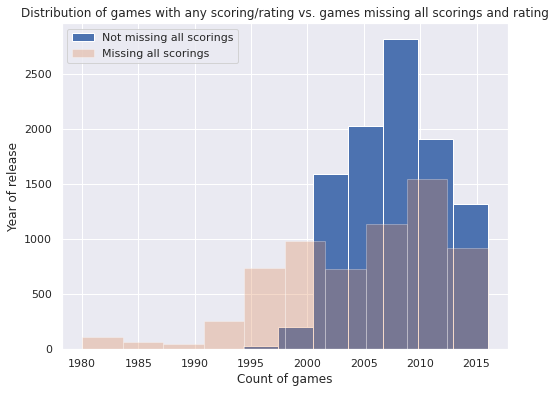

In [385]:
#Plot missing values in all columns by year vs. not missing all scores year of release distribution

not_missing_all_scores_df['year_of_release'].hist(figsize=(8,6), label='Not missing all scorings')

missing_all_scores_df['year_of_release'].hist(alpha=0.3, label='Missing all scorings')
plt.title('Distribution of games with any scoring/rating vs. games missing all scorings and rating')
plt.ylabel('Year of release')
plt.xlabel('Count of games')
plt.legend()

plt.show()

Conclusion: What we can clearly see in the histogram above, is that video games released before 1995 are all missing critic_score, user_score and rating. We'll calculate the % of the dataset these represent, and if it's less than the 5%, discard them, as they are of no use to determine what defines a best-seller.

In [386]:
#Print count of rows where year is before 1995
len(games_df[games_df['year_of_release']<1995])

484

In [387]:
#calculate % of games released before 1995
len(games_df[games_df['year_of_release']<1995])/len(games_df)

0.029408190545631305

Since only the 2% of the games listed were released before 1995, we'll drop the corresponding rows.



In [388]:
#Remove games released before 1995
games_df=games_df.query('year_of_release>1994').copy()
games_df.reset_index(drop=True, inplace=True)
games_df

name platform  year_of_release         genre  \
0                         wii sports      Wii             2006        Sports   
1                     mario kart wii      Wii             2008        Sports   
2                  wii sports resort      Wii             2009        Sports   
3           pokemon red/pokemon blue       GB             1996  Role-Playing   
4               new super mario bros       DS             2006        Action   
...                              ...      ...              ...           ...   
15969  samurai warriors: sanada maru      PS3             2016        Action   
15970               lma manager 2007     X360             2007        Sports   
15971        haitaka no psychedelica      PSV             2016     Adventure   
15972               spirits & spells      GBA             2003        Action   
15973            winning post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         15.68     12.76      3.79         3.29          82.0        8.3   
2         15.61     10.93      3.28         2.95          80.0          8   
3         11.27      8.89     10.22         1.00           NaN        NaN   
4         11.28      9.14      6.50         2.88          89.0        8.5   
...         ...       ...       ...          ...           ...        ...   
15969      0.00      0.00      0.01         0.00           NaN        NaN   
15970      0.00      0.01      0.00         0.00           NaN        NaN   
15971      0.00      0.00      0.01         0.00           NaN        NaN   
15972      0.01      0.00      0.00         0.00           NaN        NaN   
15973      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          E  
1          E  
2          E  
3        NaN  
4          E  
...      ...  
15969    NaN  
15970    NaN  
15971    NaN  
15972    NaN  
15973    NaN  

[15974 rows x 11 columns]

In [389]:
#redefine missing all scores & not missing all scores
not_missing_all_scores_df= games_df[~(games_df['user_score'].isna() & games_df['critic_score'].isna() &  games_df['rating'].isna())]
missing_all_scores_df=games_df[games_df['user_score'].isna() & games_df['critic_score'].isna() &  games_df['rating'].isna()]

In [390]:
#check filtering
len(games_df)-(len(not_missing_all_scores_df)+len(missing_all_scores_df))

0

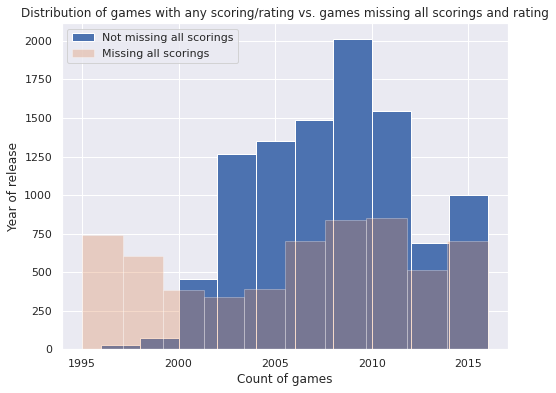

In [391]:
#Plot missing values in all columns by year vs. not missing all scores year of release distribution

not_missing_all_scores_df['year_of_release'].hist(figsize=(8,6), label='Not missing all scorings')

missing_all_scores_df['year_of_release'].hist(alpha=0.3, label='Missing all scorings')
plt.title('Distribution of games with any scoring/rating vs. games missing all scorings and rating')
plt.ylabel('Year of release')
plt.xlabel('Count of games')
plt.legend()
plt.show()

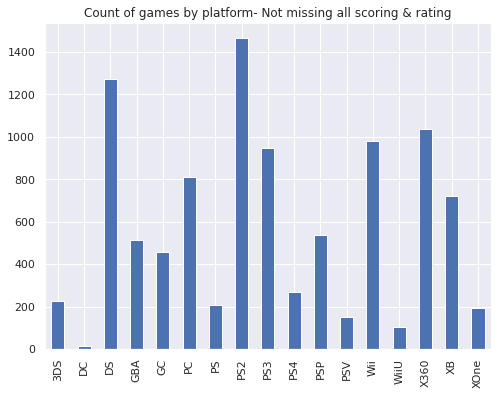

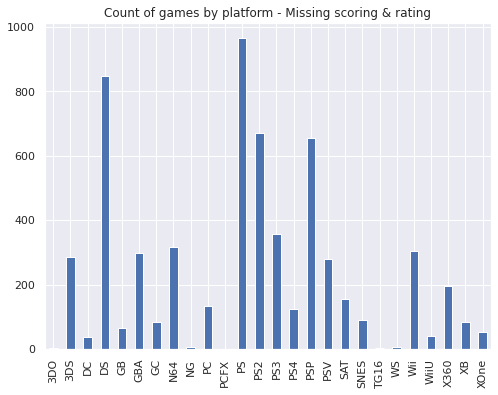

In [392]:
#Plot missing values in all columns by platform vs. full dataset platform count

not_missing_all_scores_df['platform'].value_counts().sort_index().plot(kind='bar', figsize=(8,6))
plt.title('Count of games by platform- Not missing all scoring & rating')
plt.show()
missing_all_scores_df['platform'].value_counts().sort_index().plot(kind='bar',figsize=(8,6))
plt.title('Count of games by platform - Missing scoring & rating')
plt.show()

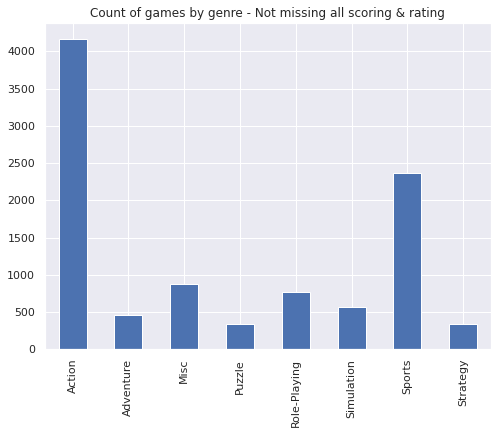

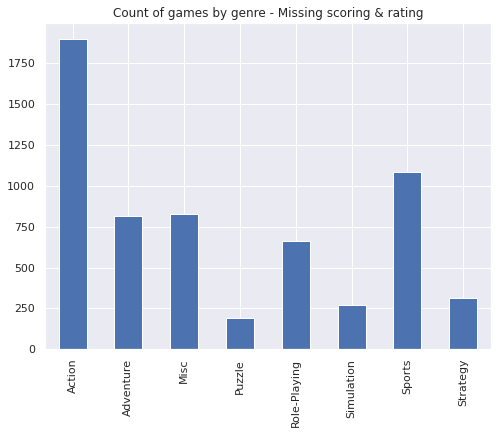

In [393]:
#Plot missing values in all columns by genre vs. full dataset count by genre

not_missing_all_scores_df['genre'].value_counts().sort_index().plot(kind='bar', figsize=(8,6))
plt.title('Count of games by genre - Not missing all scoring & rating')
plt.show()
missing_all_scores_df['genre'].value_counts().sort_index().plot(kind='bar', figsize=(8,6))
plt.title('Count of games by genre - Missing scoring & rating')
plt.show()

The percentages calculated above reveal that the majority of missing values are empty in the same rows. This means that the values are MISSING NOT AT RANDOM, what may indicate that those games weren't subject to critic, user or ESRB punctuation at all. 

The only pattern identified in the charts above, is that games released before 1994 are missing all user_score, critic_score and ESRB rating. No pattern due to which the values might be missing for games released after that year has been identified (they don't relate to a particular year, platform or genre). 

Since rows with missing values represent approximately the 50% of the dataset, dropping them out would seriously impact the outcomes of this analysis.

Based on the assumption that no scoring or rating was assigned for those videogames at all, we'll replace them with a value that reflects this theory.


Let's start by addressing critic_score.



In [394]:
#Statistics of critic score
games_df['critic_score'].describe()

count    7988.000000
mean       68.997872
std        13.927089
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [395]:
games_df['critic_score'].isna().sum()

7986

In [396]:
games_df['critic_score'].isna().sum()/len(games_df)

0.4999373982721923

Since the min value for critic_score is 13, we'll use -100 to fill the empty values. This way, if the lack of critic scoring causes sales to be lower, this pattern will be captured through a high positive correlation.

In [397]:
games_df['critic_score'] = games_df['critic_score'].fillna(-100)
games_df

name platform  year_of_release         genre  \
0                         wii sports      Wii             2006        Sports   
1                     mario kart wii      Wii             2008        Sports   
2                  wii sports resort      Wii             2009        Sports   
3           pokemon red/pokemon blue       GB             1996  Role-Playing   
4               new super mario bros       DS             2006        Action   
...                              ...      ...              ...           ...   
15969  samurai warriors: sanada maru      PS3             2016        Action   
15970               lma manager 2007     X360             2007        Sports   
15971        haitaka no psychedelica      PSV             2016     Adventure   
15972               spirits & spells      GBA             2003        Action   
15973            winning post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         15.68     12.76      3.79         3.29          82.0        8.3   
2         15.61     10.93      3.28         2.95          80.0          8   
3         11.27      8.89     10.22         1.00        -100.0        NaN   
4         11.28      9.14      6.50         2.88          89.0        8.5   
...         ...       ...       ...          ...           ...        ...   
15969      0.00      0.00      0.01         0.00        -100.0        NaN   
15970      0.00      0.01      0.00         0.00        -100.0        NaN   
15971      0.00      0.00      0.01         0.00        -100.0        NaN   
15972      0.01      0.00      0.00         0.00        -100.0        NaN   
15973      0.00      0.00      0.01         0.00        -100.0        NaN   

      rating  
0          E  
1          E  
2          E  
3        NaN  
4          E  
...      ...  
15969    NaN  
15970    NaN  
15971    NaN  
15972    NaN  
15973    NaN  

[15974 rows x 11 columns]

In [398]:
#check replacement
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15974 entries, 0 to 15973
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15974 non-null  object 
 1   platform         15974 non-null  object 
 2   year_of_release  15974 non-null  int64  
 3   genre            15974 non-null  object 
 4   na_sales         15974 non-null  float64
 5   eu_sales         15974 non-null  float64
 6   jp_sales         15974 non-null  float64
 7   other_sales      15974 non-null  float64
 8   critic_score     15974 non-null  float64
 9   user_score       9844 non-null   object 
 10  rating           9771 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.3+ MB


In [399]:
#Statistics of credit score after replacement
games_df['critic_score'].describe()

count    15974.000000
mean       -15.490485
std         85.073527
min       -100.000000
25%       -100.000000
50%         15.000000
75%         71.000000
max         98.000000
Name: critic_score, dtype: float64

### E) User score



In [400]:
games_df['user_score'].isna().sum()

6130

In [401]:
#Re-assess % of missing values.

games_df['user_score'].isna().sum()/len(games_df)

0.38374859146112433

We'll change user_score dtype to float and explore the possibilities to fill missing values as the % of empty data is too high as to drop them off.
   
   
   user_score:         6130 missing values (38%)

 

As we received an error when trying to convert user_score to float: (ValueError: could not convert string to float: 'tbd') we'll analyze this issue more in depth
    

In [402]:
#print count of rows where user score is to be determined
len(games_df[games_df['user_score']=='tbd'])

2378

In [403]:
#print an overview of those rows
games_df[games_df['user_score']=='tbd']

name platform  year_of_release       genre  \
107                     zumba fitness      Wii             2010      Sports   
272    namco museum: 50th anniversary      PS2             2005        Misc   
476                   zumba fitness 2      Wii             2011      Sports   
587                      udraw studio      Wii             2010        Misc   
654                   just dance kids      Wii             2010        Misc   
...                               ...      ...              ...         ...   
15954                 planet monsters      GBA             2001      Action   
15956                bust-a-move 3000       GC             2003      Puzzle   
15957                mega brain boost       DS             2008      Puzzle   
15963                        plushees       DS             2008  Simulation   
15965   men in black ii: alien escape       GC             2003      Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
107        3.45      2.59       0.0         0.66        -100.0        tbd   
272        2.08      1.35       0.0         0.54          61.0        tbd   
476        1.51      1.03       0.0         0.27        -100.0        tbd   
587        1.65      0.57       0.0         0.20          71.0        tbd   
654        1.52      0.54       0.0         0.18        -100.0        tbd   
...         ...       ...       ...          ...           ...        ...   
15954      0.01      0.00       0.0         0.00          67.0        tbd   
15956      0.01      0.00       0.0         0.00          53.0        tbd   
15957      0.01      0.00       0.0         0.00          48.0        tbd   
15963      0.01      0.00       0.0         0.00        -100.0        tbd   
15965      0.01      0.00       0.0         0.00        -100.0        tbd   

      rating  
107        E  
272     E10+  
476        T  
587        E  
654        E  
...      ...  
15954      E  
15956      E  
15957      E  
15963      E  
15965      T  

[2378 rows x 11 columns]

Provided that we want to make the impact of the unavailability of user_score on sales visible in the analysis, we won't get rid of those where user_score is tbd.
This achronym will be replaced by -1 so that it causes no confussion with games where real rating is 0. Same treatment will be applied to missing values.


In [404]:
#print rows where user_rating = 0
games_df[games_df['user_score']== '0']

name platform  year_of_release      genre  \
2589  my little pony: pinkie pie's party       DS             2008  Adventure   

      na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
2589      0.66       0.0       0.0         0.06        -100.0          0   

     rating  
2589      E

In [405]:
 #replace 'tbd' by 0 in user_score
games_df.loc[games_df['user_score']=='tbd','user_score'] = -1

In [406]:
#replace missing values with 0 as well
games_df['user_score']=games_df['user_score'].fillna(-1)


In [407]:
#change user_score to float
games_df['user_score']=games_df['user_score'].astype(float)

In [408]:
#print statistics
games_df['user_score'].describe()

count    15974.000000
mean         2.799111
std          4.183051
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          7.400000
max          9.700000
Name: user_score, dtype: float64

In [409]:
#check dtype change in user_score
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15974 entries, 0 to 15973
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15974 non-null  object 
 1   platform         15974 non-null  object 
 2   year_of_release  15974 non-null  int64  
 3   genre            15974 non-null  object 
 4   na_sales         15974 non-null  float64
 5   eu_sales         15974 non-null  float64
 6   jp_sales         15974 non-null  float64
 7   other_sales      15974 non-null  float64
 8   critic_score     15974 non-null  float64
 9   user_score       15974 non-null  float64
 10  rating           9771 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB


## F) Rating


- Information about the Entertainment Software Rating Board will be gathered from the web, as well, as a detail of what each achronym stands for:


Ratings are assigned by the ESRB, a non-profit, self-regulatory body for the video game industry. Established in 1994, their primary goal is to help consumers – especially parents – make informed choices about the games their families play. The rating symbols indicate the following:

**ESRB Rating symbols**

RP = RATING PENDING

Titles listed as RP (Rating Pending) have been submitted to the ESRB and are awaiting final rating. This symbol appears only in advertising prior to a game's release.


EC = EARLY CHILDHOOD 

Persons ages 3 and older. Contains no material that parents would find inappropriate.


E = EVERYONE

Persons ages 6 and older. Contain minimal cartoon, fantasy or mild violence and/or infrequent use of mild language.


E10+ = EVERYONE 10+

Ages 10 and older. May contain more cartoon, fantasy or mild violence, mild language, and/or minimal suggestive themes.


T = TEEN

Ages 13 and older. May contain violence, suggestive themes, crude humor, minimal blood, simulated gambling, and/or infrequent use of strong language.


M = MATURE

Persons ages 17 and older. May contain intense violence, blood and gore, sexual content, and/or strong language.


AO = ADULTS ONLY

Persons 18 years and older. May include prolonged scenes of intense violence and/or graphic sexual content and nudity. Microsoft does not support AO titles.


- Unique ratings will be assessed, and we will check they match those included in the ESRB web page.



In [410]:
#Print unique values in rating
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

We see the category 'K-A', which is not included in the summary below. After doing some research in the web, we found out that it used to refer to 'Kids to Adults' classification, which was replaced by 'E' (Everyone) in 1999.

Hence, we will replace it in the dataset as well.


In [411]:
#replace K-A by E in rating
games_df.loc[games_df['rating']=='K-A','rating'] = 'E'

In [412]:
#Check replacement
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

- We'll continue with the analysis of missing values.

Since the ESRB rating system was founded by the video game industry in 1994, we can now confirm that games released on or before that year had a clear reason to be missing rating.


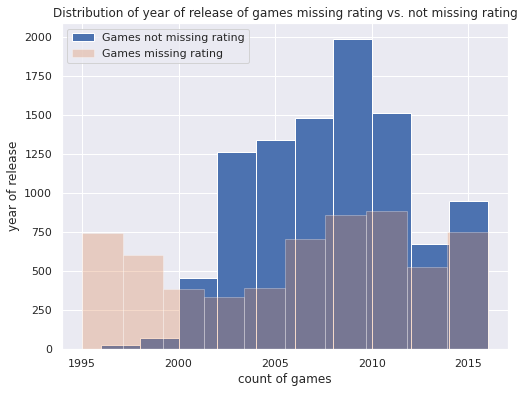

In [413]:
#Histogram of year of release for games missing ESRB rating vs. Overall 
games_df.loc[games_df['rating'].isna()==False,'year_of_release'].hist(label='Games not missing rating', figsize=(8,6))

games_df.loc[games_df['rating'].isna(),'year_of_release'].hist(alpha=0.3, label='Games missing rating')

plt.ylabel('year of release')
plt.xlabel('count of games')
plt.title('Distribution of year of release of games missing rating vs. not missing rating')
plt.legend()
plt.show()

Here we see that even though most games launched before the year 2000 are missing the ESRB rating, the distribution of year of release from 2000 onwards follows a similar pattern for games missing and not missing rating: most games were launched between 2002 and 2012. This means that the ones missing rating are not only the ones released before the ESRB rating came into place and set the ground for rating acknowledge across users. 

After doing some research on the ESRB website, we found out that the rating system is voluntary (even though all console manufacturers as well as certain U.S. retailers and mobile or online storefronts require ESRB ratings for the games or apps they offer).

Thus, another supposition to submit to testing is that the ones missing rating were voluntarily not exposed to the ESRB classification. This could most likely be due to two possible reasons:

1) Given that the main objective of the ESRB foundation was to cover the needs of parents who wanted a rating system that has both age-based categories and concise and impartial information regarding content, we can deduct that games for children are the ones more susceptible of being rated (because it increases the chances of parents buying them). Then, the ones missing rating might be for adults and hence their creators not be interested in them being assigned such label.

2) Those could also be low budget videogames which couldn't afford the ESRB evaluation.

We'll print the count of genres for which rating is missing to try to find out if they are adults games. If no clear pattern arises, we'll do the same for platforms, to check if they relate to retailers or mobile/online storefronts that don't require ESRB ratings for the games or apps they offer.



In [414]:
#print count of genres missing rating
games_df.loc[games_df['rating'].isna(),'genre'].value_counts()



Action          1937
Sports          1112
Adventure        841
Misc             839
Role-Playing     664
Strategy         326
Simulation       287
Puzzle           197
Name: genre, dtype: int64

Even though action games have the largest count of missing rating, no clear pattern can be identified on them being adult games. We'll continue with the platform analysis.

In [415]:
#print count of platforms missing rating
games_df.loc[games_df['rating'].isna(),'platform'].value_counts()

PS      970
DS      866
PS2     673
PSP     658
PS3     371
N64     316
Wii     309
GBA     297
3DS     289
PSV     279
X360    204
PC      192
SAT     155
PS4     137
SNES     91
XB       89
GC       85
GB       64
XOne     61
WiiU     42
DC       38
NG        6
WS        6
3DO       2
TG16      2
PCFX      1
Name: platform, dtype: int64

Likewise, as missing values are spread accross many different platforms, we can't say it's due to the latter not being compelled to have ESRB ratings for the games or apps they offer.

We will fill out missing values with the word 'unknown', to keep track of games that were not rated and understand how this impacted sales

In [416]:
#fill missing values in rating with "unknown"
games_df['rating'] = games_df['rating'].fillna('unknown')
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15974 entries, 0 to 15973
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15974 non-null  object 
 1   platform         15974 non-null  object 
 2   year_of_release  15974 non-null  int64  
 3   genre            15974 non-null  object 
 4   na_sales         15974 non-null  float64
 5   eu_sales         15974 non-null  float64
 6   jp_sales         15974 non-null  float64
 7   other_sales      15974 non-null  float64
 8   critic_score     15974 non-null  float64
 9   user_score       15974 non-null  float64
 10  rating           15974 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.3+ MB


Following step is to assign a number to each category. First we'll calculate total sales


In [417]:
#Add column calculating total sales

games_df['total_sales']= games_df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
games_df

name platform  year_of_release         genre  \
0                         wii sports      Wii             2006        Sports   
1                     mario kart wii      Wii             2008        Sports   
2                  wii sports resort      Wii             2009        Sports   
3           pokemon red/pokemon blue       GB             1996  Role-Playing   
4               new super mario bros       DS             2006        Action   
...                              ...      ...              ...           ...   
15969  samurai warriors: sanada maru      PS3             2016        Action   
15970               lma manager 2007     X360             2007        Sports   
15971        haitaka no psychedelica      PSV             2016     Adventure   
15972               spirits & spells      GBA             2003        Action   
15973            winning post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         15.68     12.76      3.79         3.29          82.0         8.3   
2         15.61     10.93      3.28         2.95          80.0         8.0   
3         11.27      8.89     10.22         1.00        -100.0        -1.0   
4         11.28      9.14      6.50         2.88          89.0         8.5   
...         ...       ...       ...          ...           ...         ...   
15969      0.00      0.00      0.01         0.00        -100.0        -1.0   
15970      0.00      0.01      0.00         0.00        -100.0        -1.0   
15971      0.00      0.00      0.01         0.00        -100.0        -1.0   
15972      0.01      0.00      0.00         0.00        -100.0        -1.0   
15973      0.00      0.00      0.01         0.00        -100.0        -1.0   

        rating  total_sales  
0            E        82.54  
1            E        35.52  
2            E        32.77  
3      unknown        31.38  
4            E        29.80  
...        ...          ...  
15969  unknown         0.01  
15970  unknown         0.01  
15971  unknown         0.01  
15972  unknown         0.01  
15973  unknown         0.01  

[15974 rows x 12 columns]

In [418]:
#Print summary of sales by rating
games_df.pivot_table(index='rating', values='total_sales', aggfunc=['sum','mean','median','count'])

sum        mean      median       count
        total_sales total_sales total_sales total_sales
rating                                                 
AO             1.96    1.960000        1.96           1
E           2424.00    0.616480        0.20        3932
E10+         641.44    0.460474        0.20        1393
EC             1.75    0.218750        0.22           8
M           1462.86    0.952383        0.31        1536
RP             0.04    0.040000        0.04           1
T           1470.99    0.507238        0.20        2900
unknown     2171.11    0.350010        0.10        6203

There's only 1 game for which rating is pending. We can replace it by 'unknown' as well


In [419]:
#Change RP by unknwon in rating
games_df.loc[games_df['rating']=='RP','rating']='unknown'

In [420]:
#Re-print summary of sales by rating
sales_by_rating= games_df.pivot_table(index='rating', values='total_sales', aggfunc=['sum','mean','median','count'])
sales_by_rating= sales_by_rating.sort_values(by=[('median','total_sales')])
sales_by_rating

sum        mean      median       count
        total_sales total_sales total_sales total_sales
rating                                                 
unknown     2171.15    0.349960        0.10        6204
E           2424.00    0.616480        0.20        3932
E10+         641.44    0.460474        0.20        1393
T           1470.99    0.507238        0.20        2900
EC             1.75    0.218750        0.22           8
M           1462.86    0.952383        0.31        1536
AO             1.96    1.960000        1.96           1

In [421]:
#assign a number to each category from unknown to EC (from the one less impacted by rating to the one more impacted)

rating_cat = {'unknown':0, 'AO':1, 'M':2, 'T':3, 'E10+':4, 'E':5, 'EC':6}


In [422]:
#Add a column setting this number

games_df['rating_encoded'] = games_df['rating'].apply(lambda x: rating_cat[x])

games_df

name platform  year_of_release         genre  \
0                         wii sports      Wii             2006        Sports   
1                     mario kart wii      Wii             2008        Sports   
2                  wii sports resort      Wii             2009        Sports   
3           pokemon red/pokemon blue       GB             1996  Role-Playing   
4               new super mario bros       DS             2006        Action   
...                              ...      ...              ...           ...   
15969  samurai warriors: sanada maru      PS3             2016        Action   
15970               lma manager 2007     X360             2007        Sports   
15971        haitaka no psychedelica      PSV             2016     Adventure   
15972               spirits & spells      GBA             2003        Action   
15973            winning post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         15.68     12.76      3.79         3.29          82.0         8.3   
2         15.61     10.93      3.28         2.95          80.0         8.0   
3         11.27      8.89     10.22         1.00        -100.0        -1.0   
4         11.28      9.14      6.50         2.88          89.0         8.5   
...         ...       ...       ...          ...           ...         ...   
15969      0.00      0.00      0.01         0.00        -100.0        -1.0   
15970      0.00      0.01      0.00         0.00        -100.0        -1.0   
15971      0.00      0.00      0.01         0.00        -100.0        -1.0   
15972      0.01      0.00      0.00         0.00        -100.0        -1.0   
15973      0.00      0.00      0.01         0.00        -100.0        -1.0   

        rating  total_sales  rating_encoded  
0            E        82.54               5  
1            E        35.52               5  
2            E        32.77               5  
3      unknown        31.38               0  
4            E        29.80               5  
...        ...          ...             ...  
15969  unknown         0.01               0  
15970  unknown         0.01               0  
15971  unknown         0.01               0  
15972  unknown         0.01               0  
15973  unknown         0.01               0  

[15974 rows x 13 columns]

# 3. Data analysis



## 3a. Games released by year



In [423]:
#Count games released each year and store in a dataset
games_by_year= pd.DataFrame(games_df['year_of_release'].value_counts().sort_index())
games_by_year.reset_index(inplace=True)
games_by_year['index'] = games_by_year['index'].astype(int)


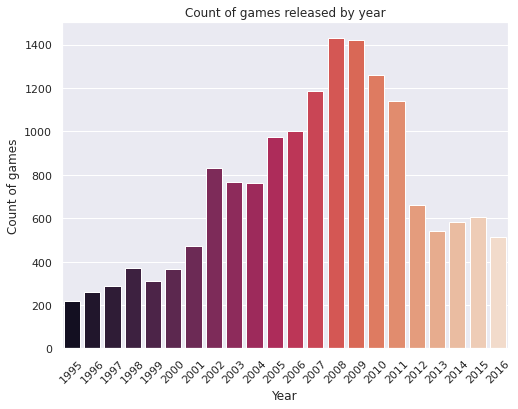

In [424]:
#plot distribution of games released each year 
plt.figure(figsize=(8,6))
sns.barplot(x='index', y= 'year_of_release', data= games_by_year, palette="rocket")

plt.xticks(rotation=45)
plt.title('Count of games released by year')
plt.xlabel('Year')
plt.ylabel('Count of games')
plt.show()

Even though we've dropped rows with games released before 1995 because of tthe small portion they represented and due to most of them missing critic score, user score and rating, we can still observe a massive difference between games annually launched between 2005 and 2011, and the years before or after that period.

To get deeper into this analysis, we might want to see which platforms were most of the games launched for, and relate it to the years in which they were on trend.

For such purpose, we'll first print a bar plot with the count of games released for each platform (in total), and then a violin plot to analyze the quantity and years dispersion of games released for each platform.

In [425]:
#Count games released each year and store in a dataset
games_by_platform= pd.DataFrame(games_df['platform'].value_counts().sort_values(ascending=False))
games_by_platform.reset_index(inplace=True)
games_by_platform.head()

index  platform
0   PS2      2134
1    DS      2121
2   PS3      1305
3   Wii      1286
4  X360      1233

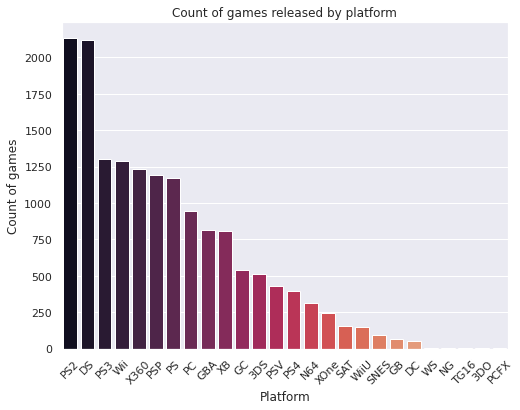

In [426]:
#plot distribution of games released for each platform
plt.figure(figsize=(8,6))
sns.barplot(x='index', y= 'platform', data= games_by_platform, palette="rocket")
plt.xticks(rotation=45)
plt.title('Count of games released by platform')
plt.xlabel('Platform')
plt.ylabel('Count of games')
plt.show()

Clearly, this shows how PS2 and DS are the leaders in terms of games released across the whole period (1995-2016). Let's plot release year dispersion for each platform, using a chart that will vary sizes depending on the count of points building up the statistics of each dispersion.

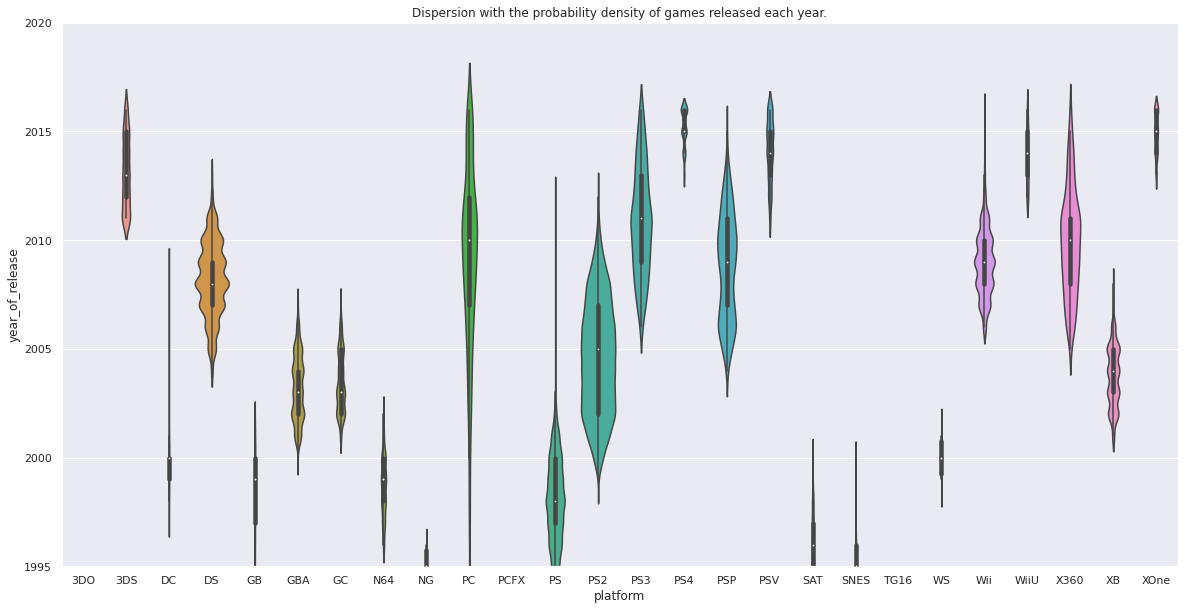

In [427]:
#plot dispersion of games launched each year by platform
sns.violinplot(x="platform", y="year_of_release",
                    data=games_df.sort_values("platform"),
                    scale="count", kind='boxen')
plt.gcf().set_size_inches(20, 10)
plt.title('Dispersion with the probability density of games released each year.')
plt.ylim(1995, 2020)
plt.show()

This graph is even more clear about how PS2 and DS are the main drivers for most games being realeased between 2002 and 2011. Besides, most video games compatible with PS3, Wii and X360 (which are the three following in quantity) were also booming in those same years. The reason for new games to start decreasing from 2012 onwards is most likely to be online games and apps becoming mainstream, as they can be accessed through the web or the mobilephone, allow to share rooms with anyone in the world, don't require buying the CD/Cassette, and sometimes they can even be accessed for free.

In line with the conclusion above, we'll group the consoles by brand, to keep track of new releases that caused previous versions to fade. Each brand had the following releases over time:


**Nintendo: Home consoles:**

SNES: 1990

N64: 1996

GC (Game Cube): 2001

Wii: 2006

Wii U: 2012

**Nintendo: Hand held consoles:**

GB (Game boy): 1989

GBA (Game boy advance): 2001 

DS: 2004

3DS: 2011

**Play station: Home consoles**

PS: 1994

PS2: 2000

PS3: 2006

PS4: 2013

**Play station: Hand held consoles**

PSP: 2004

PSV: 2011

**XBox:**

XB: 2001

X360: 2005

XOne: 2013

**Sega: Home console**

SAT: 1994

DC (Dreamcast): 1998




## 3.b) Sales by platform

Before moving to the analysis of sales broken down by platform, we'll categorize them by company (since we know that platforms remainance in the market is mostly driven by new generations launched by companies). After getting a feel of how sales progressed for each company, and for the videogame market overall, we'll assess if the variations detected are most likely attributable to the company being deprecated, or to any external phenomenon afecting the entire sector, and then we'll take a closer look at platforms performance at an individual level.


In [428]:
# Grouping platforms by Company


brands_dict= {'Nintendo home': ['SNES', 'N64', 'GC','Wii', 'WiiU'],
              'Nintendo hand': ['GB', 'GBA', 'DS', '3DS'],
              'PS home': ['PS', 'PS2', 'PS3', 'PS4'],
              'PS hand': ['PSP','PSV'],
              'Xbox home': ['XB', 'X360', 'XOne'],
              'Sega': ['SAT', 'DC'],
             'PC': ['PC']}

brands_dict 

{'Nintendo home': ['SNES', 'N64', 'GC', 'Wii', 'WiiU'],
 'Nintendo hand': ['GB', 'GBA', 'DS', '3DS'],
 'PS home': ['PS', 'PS2', 'PS3', 'PS4'],
 'PS hand': ['PSP', 'PSV'],
 'Xbox home': ['XB', 'X360', 'XOne'],
 'Sega': ['SAT', 'DC'],
 'PC': ['PC']}

In [429]:
#Add column detailing company to dataset 
games_df['company']= 'other'

for i in range(len(games_df)):
    
    platform = games_df.loc[i,'platform']
    
    for key in brands_dict:
        if platform in brands_dict[key]:
            games_df.loc[i,'company'] = key
        else:
            continue

games_df


name platform  year_of_release         genre  \
0                         wii sports      Wii             2006        Sports   
1                     mario kart wii      Wii             2008        Sports   
2                  wii sports resort      Wii             2009        Sports   
3           pokemon red/pokemon blue       GB             1996  Role-Playing   
4               new super mario bros       DS             2006        Action   
...                              ...      ...              ...           ...   
15969  samurai warriors: sanada maru      PS3             2016        Action   
15970               lma manager 2007     X360             2007        Sports   
15971        haitaka no psychedelica      PSV             2016     Adventure   
15972               spirits & spells      GBA             2003        Action   
15973            winning post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         15.68     12.76      3.79         3.29          82.0         8.3   
2         15.61     10.93      3.28         2.95          80.0         8.0   
3         11.27      8.89     10.22         1.00        -100.0        -1.0   
4         11.28      9.14      6.50         2.88          89.0         8.5   
...         ...       ...       ...          ...           ...         ...   
15969      0.00      0.00      0.01         0.00        -100.0        -1.0   
15970      0.00      0.01      0.00         0.00        -100.0        -1.0   
15971      0.00      0.00      0.01         0.00        -100.0        -1.0   
15972      0.01      0.00      0.00         0.00        -100.0        -1.0   
15973      0.00      0.00      0.01         0.00        -100.0        -1.0   

        rating  total_sales  rating_encoded        company  
0            E        82.54               5  Nintendo home  
1            E        35.52               5  Nintendo home  
2            E        32.77               5  Nintendo home  
3      unknown        31.38               0  Nintendo hand  
4            E        29.80               5  Nintendo hand  
...        ...          ...             ...            ...  
15969  unknown         0.01               0        PS home  
15970  unknown         0.01               0      Xbox home  
15971  unknown         0.01               0        PS hand  
15972  unknown         0.01               0  Nintendo hand  
15973  unknown         0.01               0        PS hand  

[15974 rows x 14 columns]

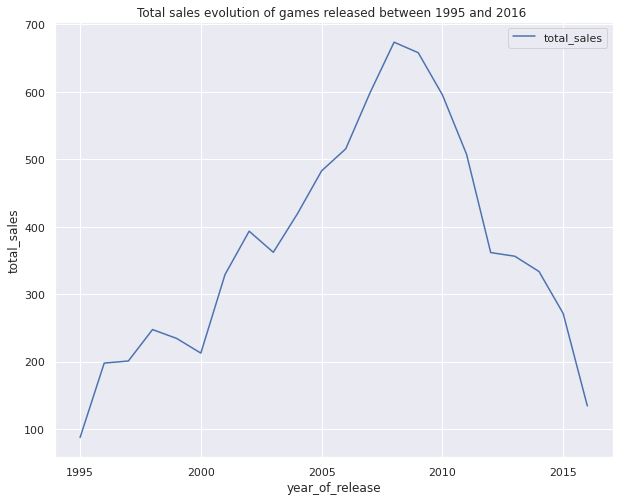

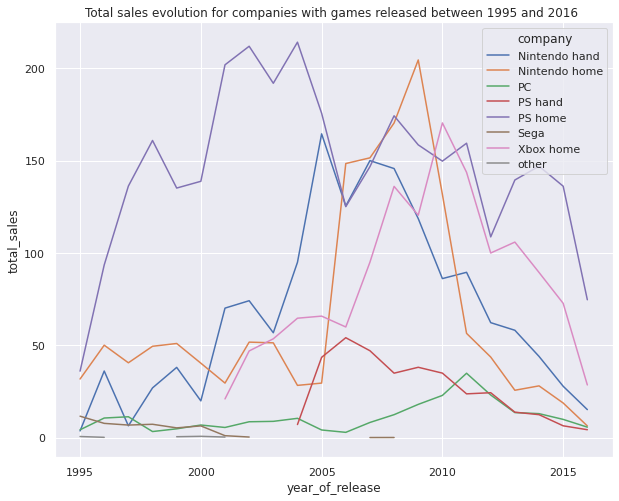

In [430]:
#Plot aggregate sales progression of games released between 1995 and 2016
games_df.pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(figsize=(10,8))
plt.ylabel('total_sales')
plt.title('Total sales evolution of games released between 1995 and 2016 ')

#Plot sales of companies that had games released between 1995 and 2016
games_df.pivot_table(index='year_of_release', columns='company',values='total_sales', aggfunc='sum').plot(figsize=(10,8))
plt.ylabel('total_sales')
plt.title('Total sales evolution for companies with games released between 1995 and 2016 ')


plt.show()

We can see that Play Station home consoles led the market from 1995 to 2005. In 2006 the launched the PS3 which income was almost equaled by Nintendo hand held console DS, and overcame by Nintendo home console "Wii" released in that same year. 2009 was the year with the highest aggregate sales for all consoles, driven mostly by Play Station, Nintendo and Xbox (PS2 + PS3 & Wii + DS & X360).

However, year 2007 marked the entry of smartphones with app stores onto global markets. Following this, global video games sales started a lunge downwards (after 2008, of course) as more and more people have taken to mobile gaming.
Fuelled by blisteringly fast improvements in tech over the past decade, mobile gaming has become so popular that it has actually overtaken console gaming in terms of revenue volume. 

Our current times have seen an overall decline in sales of video games, but an increase in mobile releases. In wake of smartphones, the PSP and the DS have all but disappeared completely — but it’s not just portables that have taken a hard hit. The banalization of smartphones has made for a paradigm shift in gaming, offering development companies a completely new market to acquire.

That said, we can attribute the sales decrease to a lower volume of games sold, assuming that the average annual sales per game remained at a similar level.

In order to verify this hypothesis, we will use the method "Hypothesis on the Equality of the Means of Paired Samples" to test the hypothesis that average sales per game of the seventh generation (2005 - 2010) and the eight generation (2010 - 2005) did not change.



Text(0.5, 1.0, 'Average sales per game each year between 1995 and 2016 ')

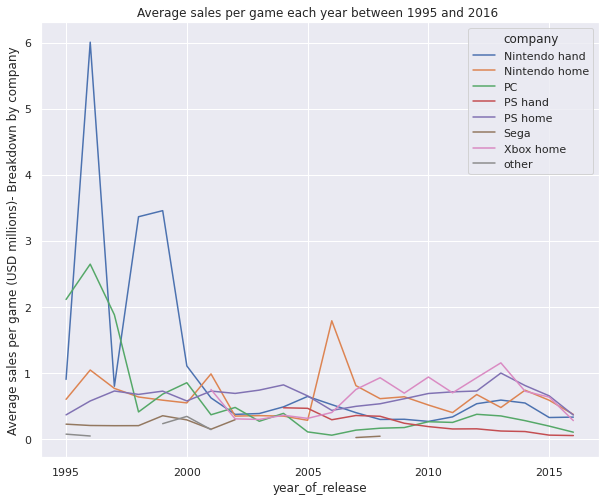

In [431]:

#Plot average sales of companies that had games released between 1995 and 2016
games_df.pivot_table(index='year_of_release', columns='company',values='total_sales', aggfunc='mean').plot(figsize=(10,8))
plt.ylabel('Average sales per game (USD millions)- Breakdown by company')
plt.title('Average sales per game each year between 1995 and 2016 ')

Text(0.5, 1.0, 'Average sales per game released between 1995 and 2016 ')

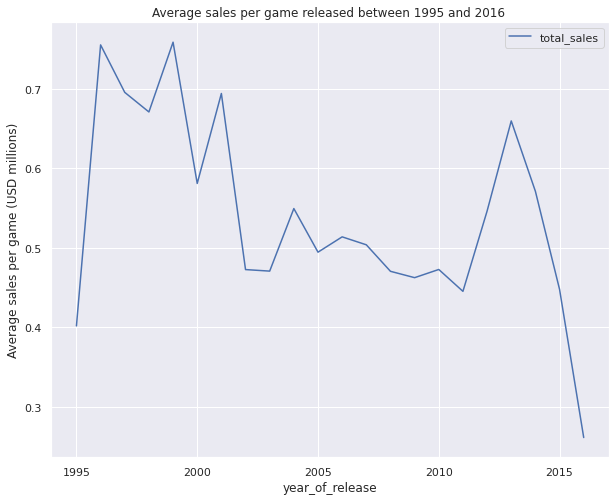

In [432]:
#Plot average sales per game released between 1995 and 2016
games_df.pivot_table(index='year_of_release', values='total_sales', aggfunc='mean').plot(figsize=(10,8))
plt.ylabel('Average sales per game (USD millions)')
plt.title('Average sales per game released between 1995 and 2016 ')

Test the hypothesis that the average sales per game (for all companies) did not vary between the period 2005-2010 and 2010 - 2015

Null hypothesis: The average sales per game for the period 2005-2010 and 2010 - 2015 were the same.

Alternative hypothesis: The average sales per game for the period 2005-2010 and 2010 - 2015 were different.


alpha = 0.05

method: Hypothesis on the Equality of the Means of Paired Samples

In [433]:
before= games_df.query('year_of_release>2005 and year_of_release <=2010').groupby('year_of_release')['total_sales'].mean()
after= games_df.query('year_of_release>=2011 and year_of_release <=2015').groupby('year_of_release')['total_sales'].mean()

alpha=0.05

results = stats.ttest_rel(before, after)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis: the mean annual sales changed")
else:
    print("We can't reject the null hypothesis")
    
print(f'The average annual sales for all companies in the first 5 years period was ${round(before.mean(),2)} and in the second period ${round(after.mean(),2)}')

p-value:  0.3449536660204403
We can't reject the null hypothesis
The average annual sales for all companies in the first 5 years period was $0.48 and in the second period $0.53


Provided that we can't reject the null hypothesis, meaning that average annual sales for games released between 2006-2010 and 2011-2015 might have not varied, we can move on with the theory that the drop in total sales is mostly attributable to a decrease in games released, rather than to a price dropdown. Next, we'll plot the count of games sold each year to visualize this phenomenon.

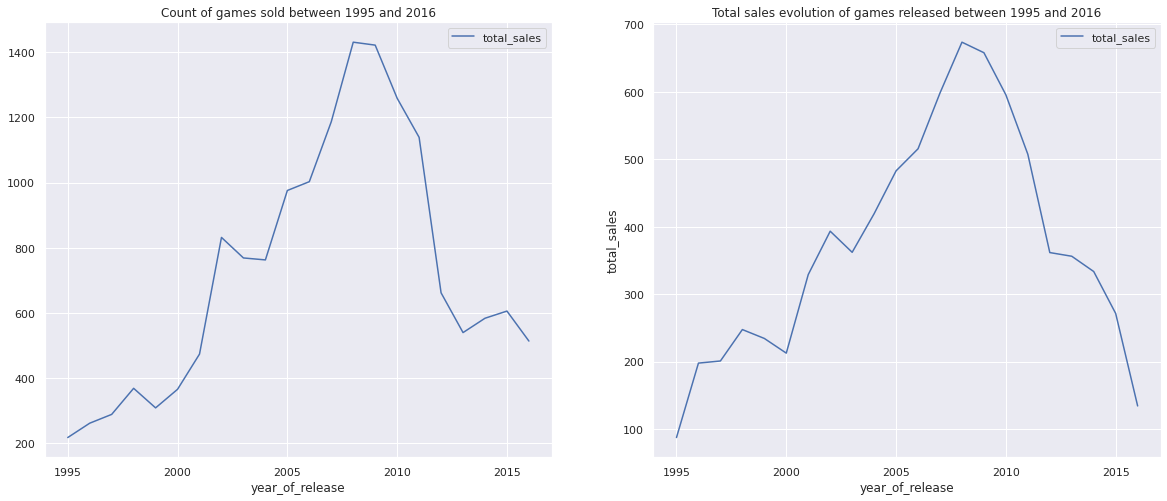

In [434]:
fig, (ax1, ax2) =  plt.subplots(1,2, figsize=(20,8))

#Plot count of games sold of those released between 1995 and 2016 vs evolution of total sales

games_df.pivot_table(index='year_of_release', values='total_sales', aggfunc='count').plot(ax=ax1, title='Count of games sold between 1995 and 2016')
plt.ylabel('Count of games sold')


#Plot aggregate sales progression of games released between 1995 and 2016

games_df.pivot_table(index='year_of_release',values='total_sales', aggfunc='sum').plot(ax=ax2, title='Total sales evolution of games released between 1995 and 2016')
plt.ylabel('total_sales')

plt.show()

By comparing both plots we can easily see that their shapes are rather similar, in consistency with the abovementioned theory.

Following steps will be focused on analyzing which platforms have the greatest sales amount, and picking the most significant ones to try to understand how long it takes to new platforms to appear, and old ones to be deprecated. On this basis, we will next select platforms that are expected to be half way to disappearing, with their sales still being high, in order to prioritize games compatible with them in the following year ad campaign.

###  Sales distribution per year for top 6 selling platforms 

After totalizing sales for each platform, and selecting the top 6 sellers, we'll plot a bar chart showing total sales per platform by year to get a feel of how long each platform stays in the market.

In [435]:
#Sum of total sales by platform

sales_by_plat=games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
sales_by_plat

platform
PS2     1247.28
X360     961.30
PS3      931.82
Wii      891.18
DS       802.77
PS       721.55
PS4      314.14
GBA      312.88
PSP      290.34
3DS      257.81
XB       252.66
PC       242.28
N64      218.01
GC       197.03
XOne     159.32
GB       139.90
WiiU      82.19
PSV       53.81
SNES      49.59
SAT       30.22
DC        15.95
WS         1.42
NG         0.43
TG16       0.16
3DO        0.08
PCFX       0.03
Name: total_sales, dtype: float64

We'll pick the first 6 platforms, as there's a great difference between the 6th and the 7th when it comes to sales amount.

In [436]:
# top 6 platforms by sales
top_6_plat= sales_by_plat.head(6).index
top_6_plat

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

In [437]:
# Pivot table of top 6 platforms by sales, totalizing sales per year

sales_by_plat_year=games_df.query('platform in @top_6_plat').pivot_table(index='year_of_release', columns= 'platform', values='total_sales', aggfunc='sum')

sales_by_plat_year.reset_index(inplace=True)


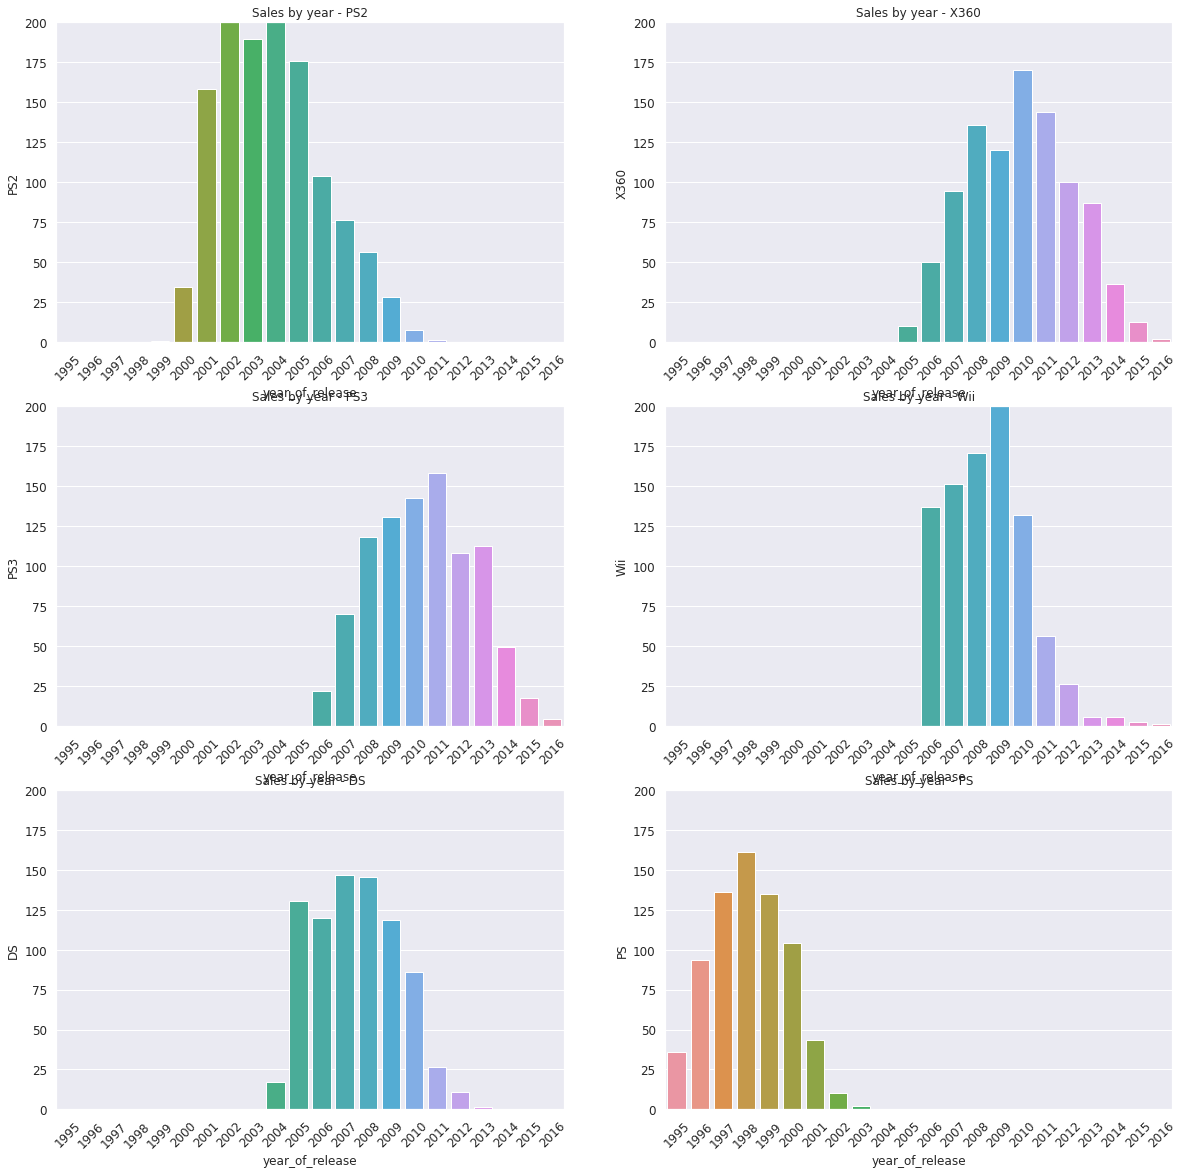

In [438]:
sns.set( rc = {'figure.figsize' : ( 20, 20 ), 'axes.labelsize' : 12}) 
for i,column in enumerate(top_6_plat):
    plt.subplot(3, 2, i+1)
    
    sns.barplot(data=sales_by_plat_year[['year_of_release',column]], x='year_of_release', y=column)
    plt.ylim(0,200)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12,rotation=45)
    plt.title(f'Sales by year - {column}', fontsize=12)
    

Apparently, top sellers have a permanence of roughly 9 to 11 years in the market. 

### Platforms that used to be popular and now have zero sales

Next, we'll detect which platforms of those with a high sales history, had already faded by 2016 (i.e. did not have any sales that year).

In [439]:
#Pivot table by platform with sales per year

sales_by_plat_year_total= games_df.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')

sales_by_plat_year_total.reset_index(inplace=True)

sales_by_plat_year_total.head()

platform  year_of_release  total_sales
0      3DO             1995         0.08
1      3DS             2011        63.18
2      3DS             2012        51.20
3      3DS             2013        56.56
4      3DS             2014        43.95

In [440]:
#Print total sales for platforms that did not have any sales in 2016

platform_active_2016= list(sales_by_plat_year_total.query('year_of_release==2016')['platform'])

platform_total= list(games_df['platform'].unique())

platform_inactive_2016= list(set(platform_total) - set(platform_active_2016))

platform_inactive_2016_total_sales= games_df.query('platform in @platform_inactive_2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False)

top_platforms_inactive_2016= platform_inactive_2016_total_sales.head()

top_platforms_inactive_2016

platform
PS2    1247.28
DS      802.77
PS      721.55
GBA     312.88
PSP     290.34
Name: total_sales, dtype: float64

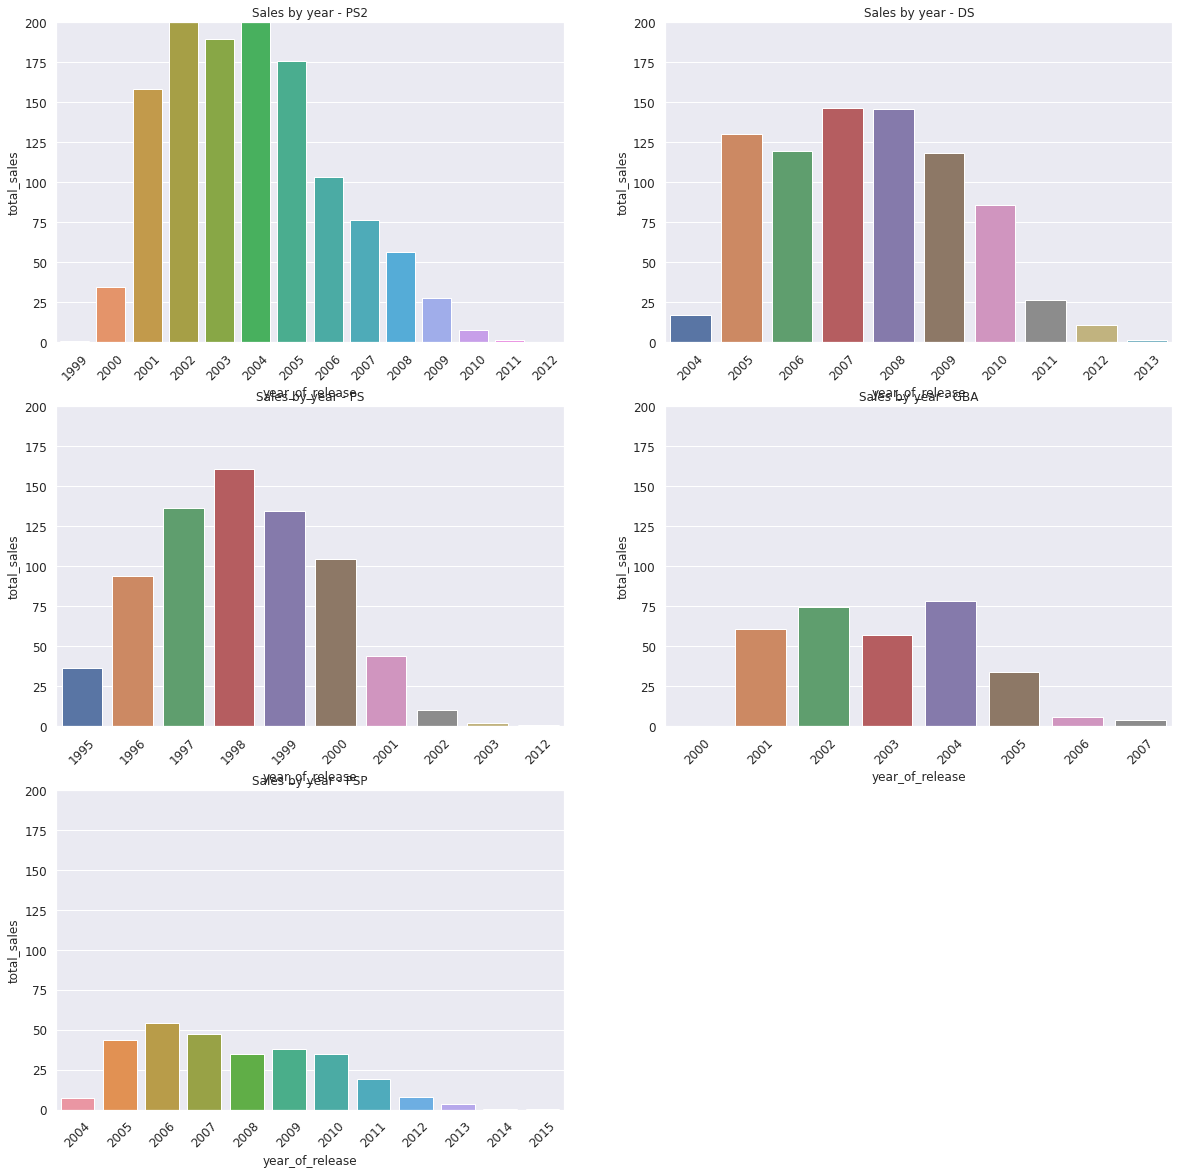

In [441]:
#Plot annual sales for top seller platforms inactive in 2016
sns.set( rc = {'figure.figsize' : ( 20, 20 ), 'axes.labelsize' : 12, "font.size":8}) 
for i,platforms in enumerate(top_platforms_inactive_2016.index):
    data_plot= sales_by_plat_year_total.query('platform ==@platforms')
    plt.subplot(3, 2, i+1)
    sns.set(rc = {'figure.figsize':(100,80)})
    sns.barplot(data=data_plot, x='year_of_release', y='total_sales')
    plt.ylim(0,200)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12,rotation=45)
    plt.title(f'Sales by year - {platforms}', fontsize=12)

We see that many of the most popular platforms having the greatest sales during the golden years of console videogames now have zero sales. The clearest example is the PlayStation console: PS was in trend from 1995 to 2002. Then it was replaced by the PS2, which overlapped sales with the former between 2000 and 2002, and remained mainstream up until 2008. Later on, it faded due to the release of the newer versions: PS3 - PS4. On the other hand, DS, GBA and PSP are hand-held consoles, which started to be replaced by mobilephone games since they became massive in 2010/2012.

### Average years in the market  





We'll calculate for how many years has each platform has had games released, and get the average, median and most frequent value.

In [442]:
#Pivot table with min year of release, max year of release, and calculated time in the market by platform
plat_years_in_trend= sales_by_plat_year_total.pivot_table(index='platform', values='year_of_release', aggfunc=['min','max', lambda x: x.max()-x.min()])
plat_years_in_trend.reset_index(inplace=True)
plat_years_in_trend=plat_years_in_trend.droplevel(0, axis=1)

plat_years_in_trend.columns=['platform','min_year','max_year','years_in_market']

plat_years_in_trend.sort_values(by='years_in_market', ascending=False,inplace=True,ignore_index=True)
plat_years_in_trend


platform  min_year  max_year  years_in_market
0        PC      1995      2016               21
1        PS      1995      2012               17
2       PS2      1999      2012               13
3       PSP      2004      2015               11
4      X360      2005      2016               11
5       Wii      2006      2016               10
6       PS3      2006      2016               10
7        DC      1998      2008               10
8        DS      2004      2013                9
9        XB      2001      2008                7
10      GBA      2000      2007                7
11      N64      1996      2002                6
12       GC      2001      2007                6
13       GB      1995      2001                6
14      3DS      2011      2016                5
15      PSV      2011      2016                5
16      SAT      1995      2000                5
17     SNES      1995      2000                5
18     WiiU      2012      2016                4
19     XOne      2013      2016                3
20      PS4      2013      2016                3
21       WS      1999      2001                2
22       NG      1995      1996                1
23     TG16      1995      1995                0
24     PCFX      1996      1996                0
25      3DO      1995      1995                0

In [443]:
#Calculate mean/median years in market
plat_years_in_trend.years_in_market.describe()

count    26.000000
mean      6.807692
std       5.146022
min       0.000000
25%       3.250000
50%       6.000000
75%      10.000000
max      21.000000
Name: years_in_market, dtype: float64

In [444]:
#print info for platforms that had sales in 2016
plat_years_in_trend.query('max_year==2016')

platform  min_year  max_year  years_in_market
0        PC      1995      2016               21
4      X360      2005      2016               11
5       Wii      2006      2016               10
6       PS3      2006      2016               10
14      3DS      2011      2016                5
15      PSV      2011      2016                5
18     WiiU      2012      2016                4
19     XOne      2013      2016                3
20      PS4      2013      2016                3

In [445]:
#Get the most frequent value of years in the market
plat_years_in_trend.years_in_market.mode()

0    5
dtype: int64

**Years in the market**

The mean and median time of permanence in the market is around 6 or 7 years. The most frequently repeated value across all platforms is 5 years. Therefore, for the purpose of this analysis we'll only use the last 5 years period available, provided that as videogames trends have changed significantly over time we want to focus only in the most recent data. Moreover, we'll dispose of the platforms that had no sales in 2016 as they're not of our interest for next year sales forecast.

### Restricting the dataset to the most recent years and active platforms only

In [446]:
#add column setting value to 1 (True) if the platform had games sold in 2016 or to 0 otherwise

games_df['currently_vigent'] = games_df['platform'].apply(lambda x: int(x not in platform_inactive_2016_total_sales.index))
games_df

name platform  year_of_release         genre  \
0                         wii sports      Wii             2006        Sports   
1                     mario kart wii      Wii             2008        Sports   
2                  wii sports resort      Wii             2009        Sports   
3           pokemon red/pokemon blue       GB             1996  Role-Playing   
4               new super mario bros       DS             2006        Action   
...                              ...      ...              ...           ...   
15969  samurai warriors: sanada maru      PS3             2016        Action   
15970               lma manager 2007     X360             2007        Sports   
15971        haitaka no psychedelica      PSV             2016     Adventure   
15972               spirits & spells      GBA             2003        Action   
15973            winning post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         15.68     12.76      3.79         3.29          82.0         8.3   
2         15.61     10.93      3.28         2.95          80.0         8.0   
3         11.27      8.89     10.22         1.00        -100.0        -1.0   
4         11.28      9.14      6.50         2.88          89.0         8.5   
...         ...       ...       ...          ...           ...         ...   
15969      0.00      0.00      0.01         0.00        -100.0        -1.0   
15970      0.00      0.01      0.00         0.00        -100.0        -1.0   
15971      0.00      0.00      0.01         0.00        -100.0        -1.0   
15972      0.01      0.00      0.00         0.00        -100.0        -1.0   
15973      0.00      0.00      0.01         0.00        -100.0        -1.0   

        rating  total_sales  rating_encoded        company  currently_vigent  
0            E        82.54               5  Nintendo home                 1  
1            E        35.52               5  Nintendo home                 1  
2            E        32.77               5  Nintendo home                 1  
3      unknown        31.38               0  Nintendo hand                 0  
4            E        29.80               5  Nintendo hand                 0  
...        ...          ...             ...            ...               ...  
15969  unknown         0.01               0        PS home                 1  
15970  unknown         0.01               0      Xbox home                 1  
15971  unknown         0.01               0        PS hand                 1  
15972  unknown         0.01               0  Nintendo hand                 0  
15973  unknown         0.01               0        PS hand                 1  

[15974 rows x 15 columns]

In [447]:
#filter by currently vigent platforms and drop the column added above
games_df = games_df.loc[games_df['currently_vigent']==1].copy()
games_df.reset_index(inplace=True, drop=True)
games_df.drop(columns='currently_vigent',inplace=True)
games_df

name platform  year_of_release       genre  \
0                        wii sports      Wii             2006      Sports   
1                    mario kart wii      Wii             2008      Sports   
2                 wii sports resort      Wii             2009      Sports   
3                          wii play      Wii             2006        Misc   
4          new super mario bros wii      Wii             2009      Action   
...                             ...      ...              ...         ...   
6491               aiyoku no eustia      PSV             2014        Misc   
6492  samurai warriors: sanada maru      PS3             2016      Action   
6493               lma manager 2007     X360             2007      Sports   
6494        haitaka no psychedelica      PSV             2016   Adventure   
6495            winning post 8 2016      PSV             2016  Simulation   

      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0        41.36     28.96      3.77         8.45          76.0         8.0   
1        15.68     12.76      3.79         3.29          82.0         8.3   
2        15.61     10.93      3.28         2.95          80.0         8.0   
3        13.96      9.18      2.93         2.84          58.0         6.6   
4        14.44      6.94      4.70         2.24          87.0         8.4   
...        ...       ...       ...          ...           ...         ...   
6491      0.00      0.00      0.01         0.00        -100.0        -1.0   
6492      0.00      0.00      0.01         0.00        -100.0        -1.0   
6493      0.00      0.01      0.00         0.00        -100.0        -1.0   
6494      0.00      0.00      0.01         0.00        -100.0        -1.0   
6495      0.00      0.00      0.01         0.00        -100.0        -1.0   

       rating  total_sales  rating_encoded        company  
0           E        82.54               5  Nintendo home  
1           E        35.52               5  Nintendo home  
2           E        32.77               5  Nintendo home  
3           E        28.91               5  Nintendo home  
4           E        28.32               5  Nintendo home  
...       ...          ...             ...            ...  
6491  unknown         0.01               0        PS hand  
6492  unknown         0.01               0        PS home  
6493  unknown         0.01               0      Xbox home  
6494  unknown         0.01               0        PS hand  
6495  unknown         0.01               0        PS hand  

[6496 rows x 14 columns]

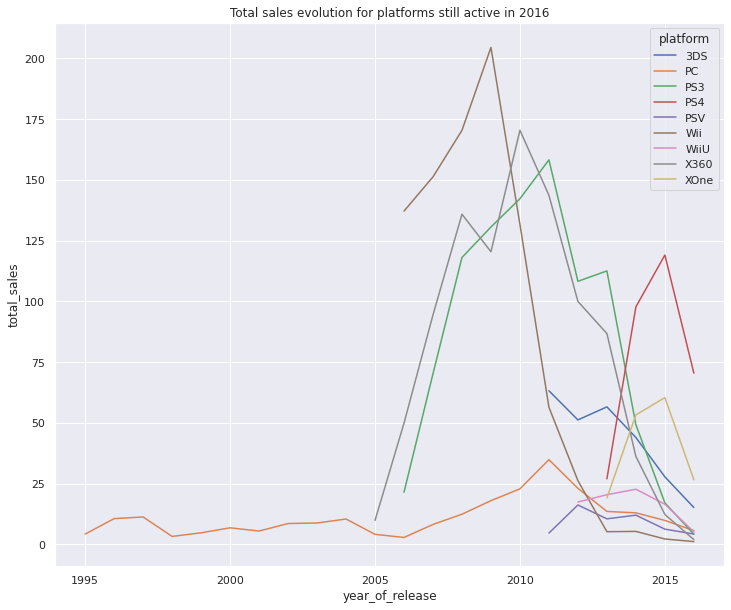

In [448]:
#Plot sales of platforms that had games released in 2016
games_df.pivot_table(index='year_of_release', columns='platform',values='total_sales', aggfunc='sum').plot(figsize=(12,10))
plt.ylabel('total_sales')
plt.title('Total sales evolution for platforms still active in 2016')
plt.show()

In the chart above we can see that the PC has had sales since 1995 and is still in the market. This is most likely due to it not having mew versions released. On the contrary, the other consoles are new generations released by each company (Nintendo, Play Station, Xbox, etc), hence, as new console models are launched every 5-7 years by most companies, this shapes the average time they take to fade and be replaced by the newest generation.


Provided that we want to promote games for platforms that are not about to fade, we'll filter the dataset again, including only the period between 2013-2016

In [449]:
#Create dataset using only data from 2013 onwards
new_games_df = games_df.query('year_of_release>2012').copy().reset_index(drop=True)
new_games_df

name platform  year_of_release         genre  \
0                grand theft auto v      PS3             2013        Action   
1                grand theft auto v     X360             2013        Action   
2         call of duty: black ops 3      PS4             2015        Action   
3               pokemon x/pokemon y      3DS             2013  Role-Playing   
4                grand theft auto v      PS4             2014        Action   
...                             ...      ...              ...           ...   
2163               strawberry nauts      PSV             2016     Adventure   
2164               aiyoku no eustia      PSV             2014          Misc   
2165  samurai warriors: sanada maru      PS3             2016        Action   
2166        haitaka no psychedelica      PSV             2016     Adventure   
2167            winning post 8 2016      PSV             2016    Simulation   

      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         7.02      9.09      0.98         3.96          97.0         8.2   
1         9.66      5.14      0.06         1.41          97.0         8.1   
2         6.03      5.86      0.36         2.38        -100.0        -1.0   
3         5.28      4.19      4.35         0.78        -100.0        -1.0   
4         3.96      6.31      0.38         1.97          97.0         8.3   
...        ...       ...       ...          ...           ...         ...   
2163      0.00      0.00      0.01         0.00        -100.0        -1.0   
2164      0.00      0.00      0.01         0.00        -100.0        -1.0   
2165      0.00      0.00      0.01         0.00        -100.0        -1.0   
2166      0.00      0.00      0.01         0.00        -100.0        -1.0   
2167      0.00      0.00      0.01         0.00        -100.0        -1.0   

       rating  total_sales  rating_encoded        company  
0           M        21.05               2        PS home  
1           M        16.27               2      Xbox home  
2     unknown        14.63               0        PS home  
3     unknown        14.60               0  Nintendo hand  
4           M        12.62               2        PS home  
...       ...          ...             ...            ...  
2163  unknown         0.01               0        PS hand  
2164  unknown         0.01               0        PS hand  
2165  unknown         0.01               0        PS home  
2166  unknown         0.01               0        PS hand  
2167  unknown         0.01               0        PS hand  

[2168 rows x 14 columns]

In [450]:
#Store active platforms' name sorted by sum of total sales (2013-2016) in descending order (to pass to the parameter "order" in charts)

sum_of_sales_active=new_games_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)
platforms_by_sales= list(sum_of_sales_active.index)
platforms_by_sales

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii']

### Evolution and distribution of sales by platform

Below, we'll analyze the distribution of sales by platform in the past 4 years. The aim of restricting the period to such length is to exclude platforms that, in spite of having sales in 2016, are close to fading away.


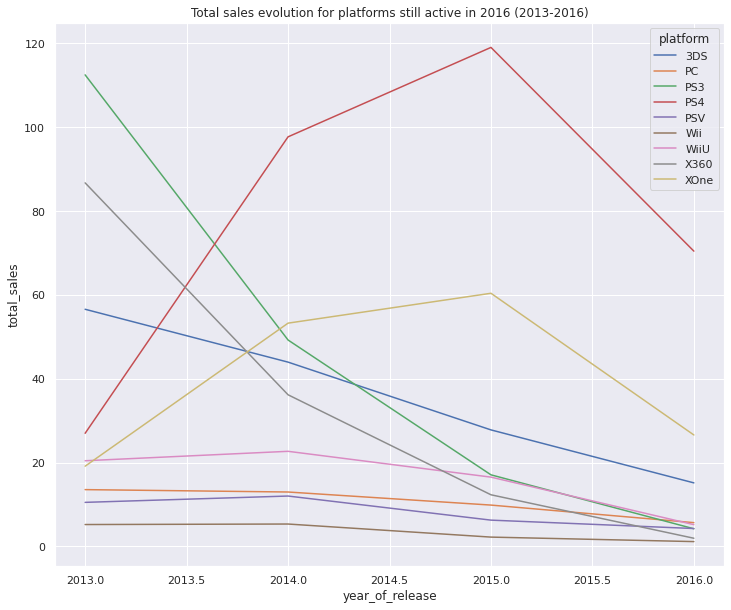

In [451]:
#Plot sales progress of active platforms in the last 3 years
new_games_df.pivot_table(index='year_of_release', columns='platform',values='total_sales', aggfunc='sum').plot(figsize=(12,10))
plt.ylabel('total_sales')
plt.title('Total sales evolution for platforms still active in 2016 (2013-2016)')
plt.show()

**Platforms leading in sales**

The platforms leading sales in the last three years are PS4, XOne and 3DS. Even though sales of games for all platforms seem to have decreased in 2016 (year on year), this is due to the data for that year being incomplete. 

**Platforms growing**
Considering the typical life time of platforms in the market, as both PS4 and XOne have been in place for only three years, we can conclude that those are growing, and are approximately three years away from fading (based on the median/mean for all platforms). 

**Platforms shrinking**
On the other hand 3DS, PS3, PSV, Wii and X360 seem to be shrinking. 3DS had apparently no success, as sales started decreasing YoY since it was launched, PS3 is probably being deprecated by PS4, and both Wii amd X360 had a massive drop in sales from 2009 to 2013.

**Potentially profitable platforms**

In line with the abovementioned insight, we can tell that the consoles that are likely to be more profitable the coming year are PS4 and XOne.

## 3.c) Global sales of all games, broken down by platform

In [452]:
#create pivot table with total sales by platform each year
total_sales_by_plat= new_games_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

total_sales_by_plat

platform           3DS     PC     PS3     PS4    PSV   Wii   WiiU   X360  \
year_of_release                                                            
2013             56.56  13.53  112.49   26.97  10.49  5.20  20.42  86.72   
2014             43.95  12.96   49.23   97.70  12.00  5.32  22.67  36.16   
2015             27.78   9.84   17.06  119.04   6.25  2.20  16.51  12.30   
2016             15.14   5.65    4.19   70.43   4.25  1.13   5.17   1.93   

platform          XOne  
year_of_release         
2013             19.12  
2014             53.25  
2015             60.38  
2016             26.57

<Figure size 864x576 with 0 Axes>

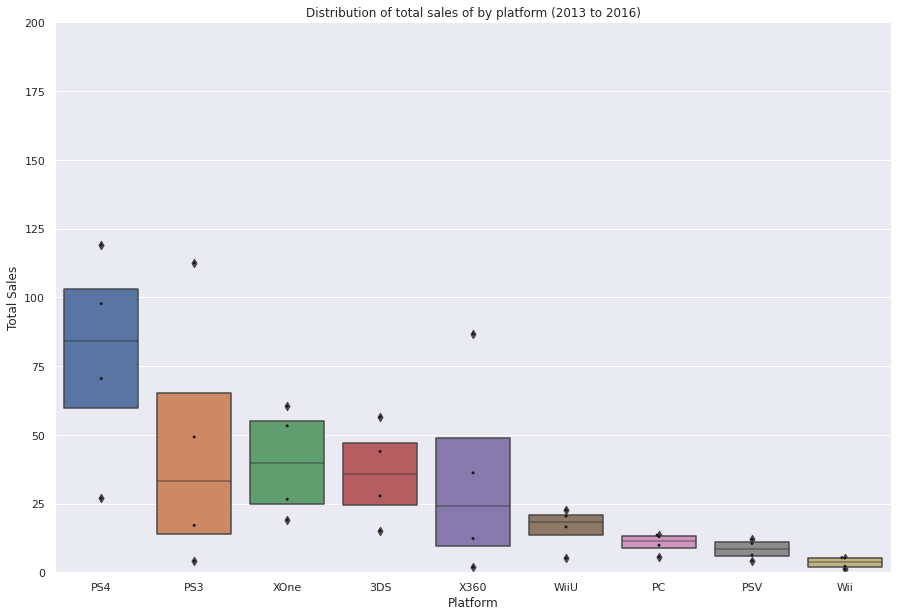

In [453]:
#PLot total sales by platforms (active, from 2013 to 2016),sorted by total sales in descending order.
plt.figure(figsize=(12,8))
g=sns.catplot( kind="boxen", order=platforms_by_sales, data=total_sales_by_plat, height=8.27, aspect=12/8)
sns.swarmplot(color="k", size=3, order=platforms_by_sales, data=total_sales_by_plat, ax=g.ax)

plt.title('Distribution of total sales of by platform (2013 to 2016)')
plt.ylim(0,200)
plt.xlabel('Platform')
plt.ylabel('Total Sales');

###  Average sales of all games, broken down by platform

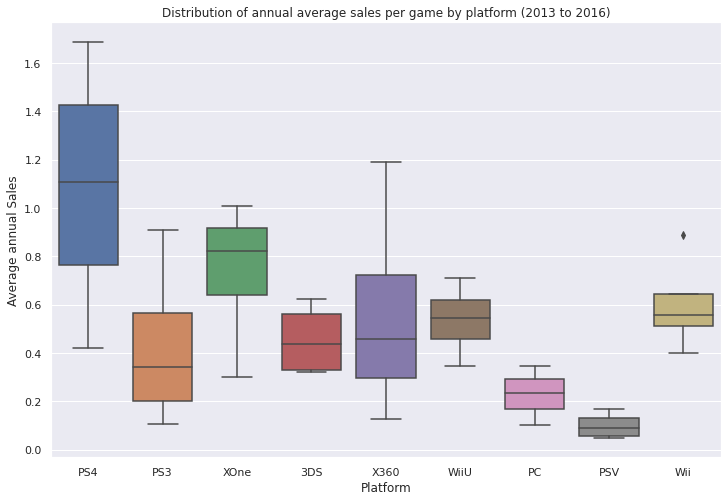

In [454]:
#create pivot table with average sales per game by platform
avg_sales_by_plat= new_games_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='mean', fill_value=0).reset_index()

#PLot distribution of average annual sales per game for each platform (active, from 2013 to 2016)
plt.figure(figsize=(12,8))
sns.boxplot(data=avg_sales_by_plat, order=platforms_by_sales)

plt.title('Distribution of annual average sales per game by platform (2013 to 2016)')
plt.xlabel('Platform')
plt.ylabel('Average annual Sales');

###  Count of games released, broken down by platform

In [455]:
#create pivot table with count of games released by platform each year
games_sold_by_plat= new_games_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='count', fill_value=0).reset_index()


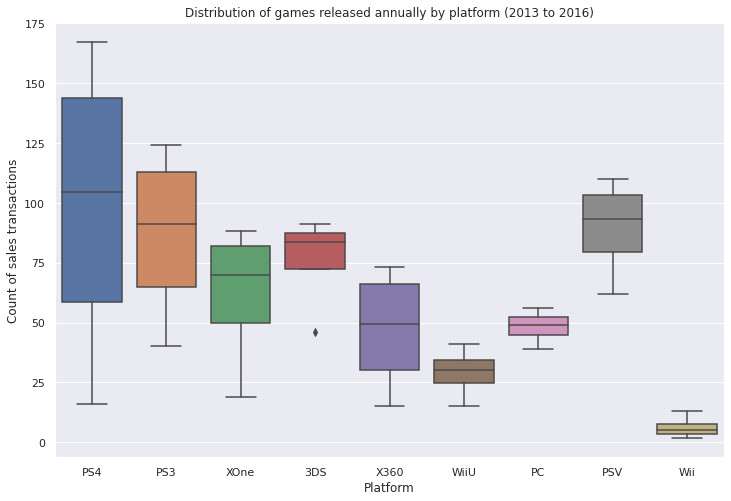

In [456]:
#PLot distribution of games traded annually by platform
plt.figure(figsize=(12,8))
sns.boxplot(data=games_sold_by_plat, order=platforms_by_sales)

plt.title('Distribution of games released annually by platform (2013 to 2016)')
plt.xlabel('Platform')
plt.ylabel('Count of sales transactions');

From the box plots showing annual sales amount, average annual sales and annual sales transactions count, we can observe that in the last 4 years, PS4 has been the one providing the highest income anually, both in total and on average per game. PS3 follows in count of transactions, but on average its games were cheaper than XOne's. As for Nintendo, WiiU was their latest release (2012) but it does not seem to be having a great success in terms of sales.

When it comes to dispersion, the ones with the smallest distribution range are those with the lowest sales. This means that in general platforms do not have stable high revenues across different years, and high sales along their entire life time are driven by a few years of splendor.

## 3.d) Correlation between critic/user score and sales



Below, we'll print the correlation between user_score and total_sales for the top 4 best-seller platforms in the past 4 years, sorted by total sales, from highest to lowest. We'll start by excluding rows where user score or critic score is negative, for the purposes of using only the data available beforehand, and avoid biasing conslusions with filled missing values.

Later on, we'll draw three heatmaps both for PS4 and XOne (the two we picked as most likely to be profitable in the coming years), correlating total sales to the rest of the numerical values from three different perspectives:

-Full dataset 

-Only rows where user score is >= 0 (not missing originally)

-Only rows where critic score is >= 0 (not missing originally)

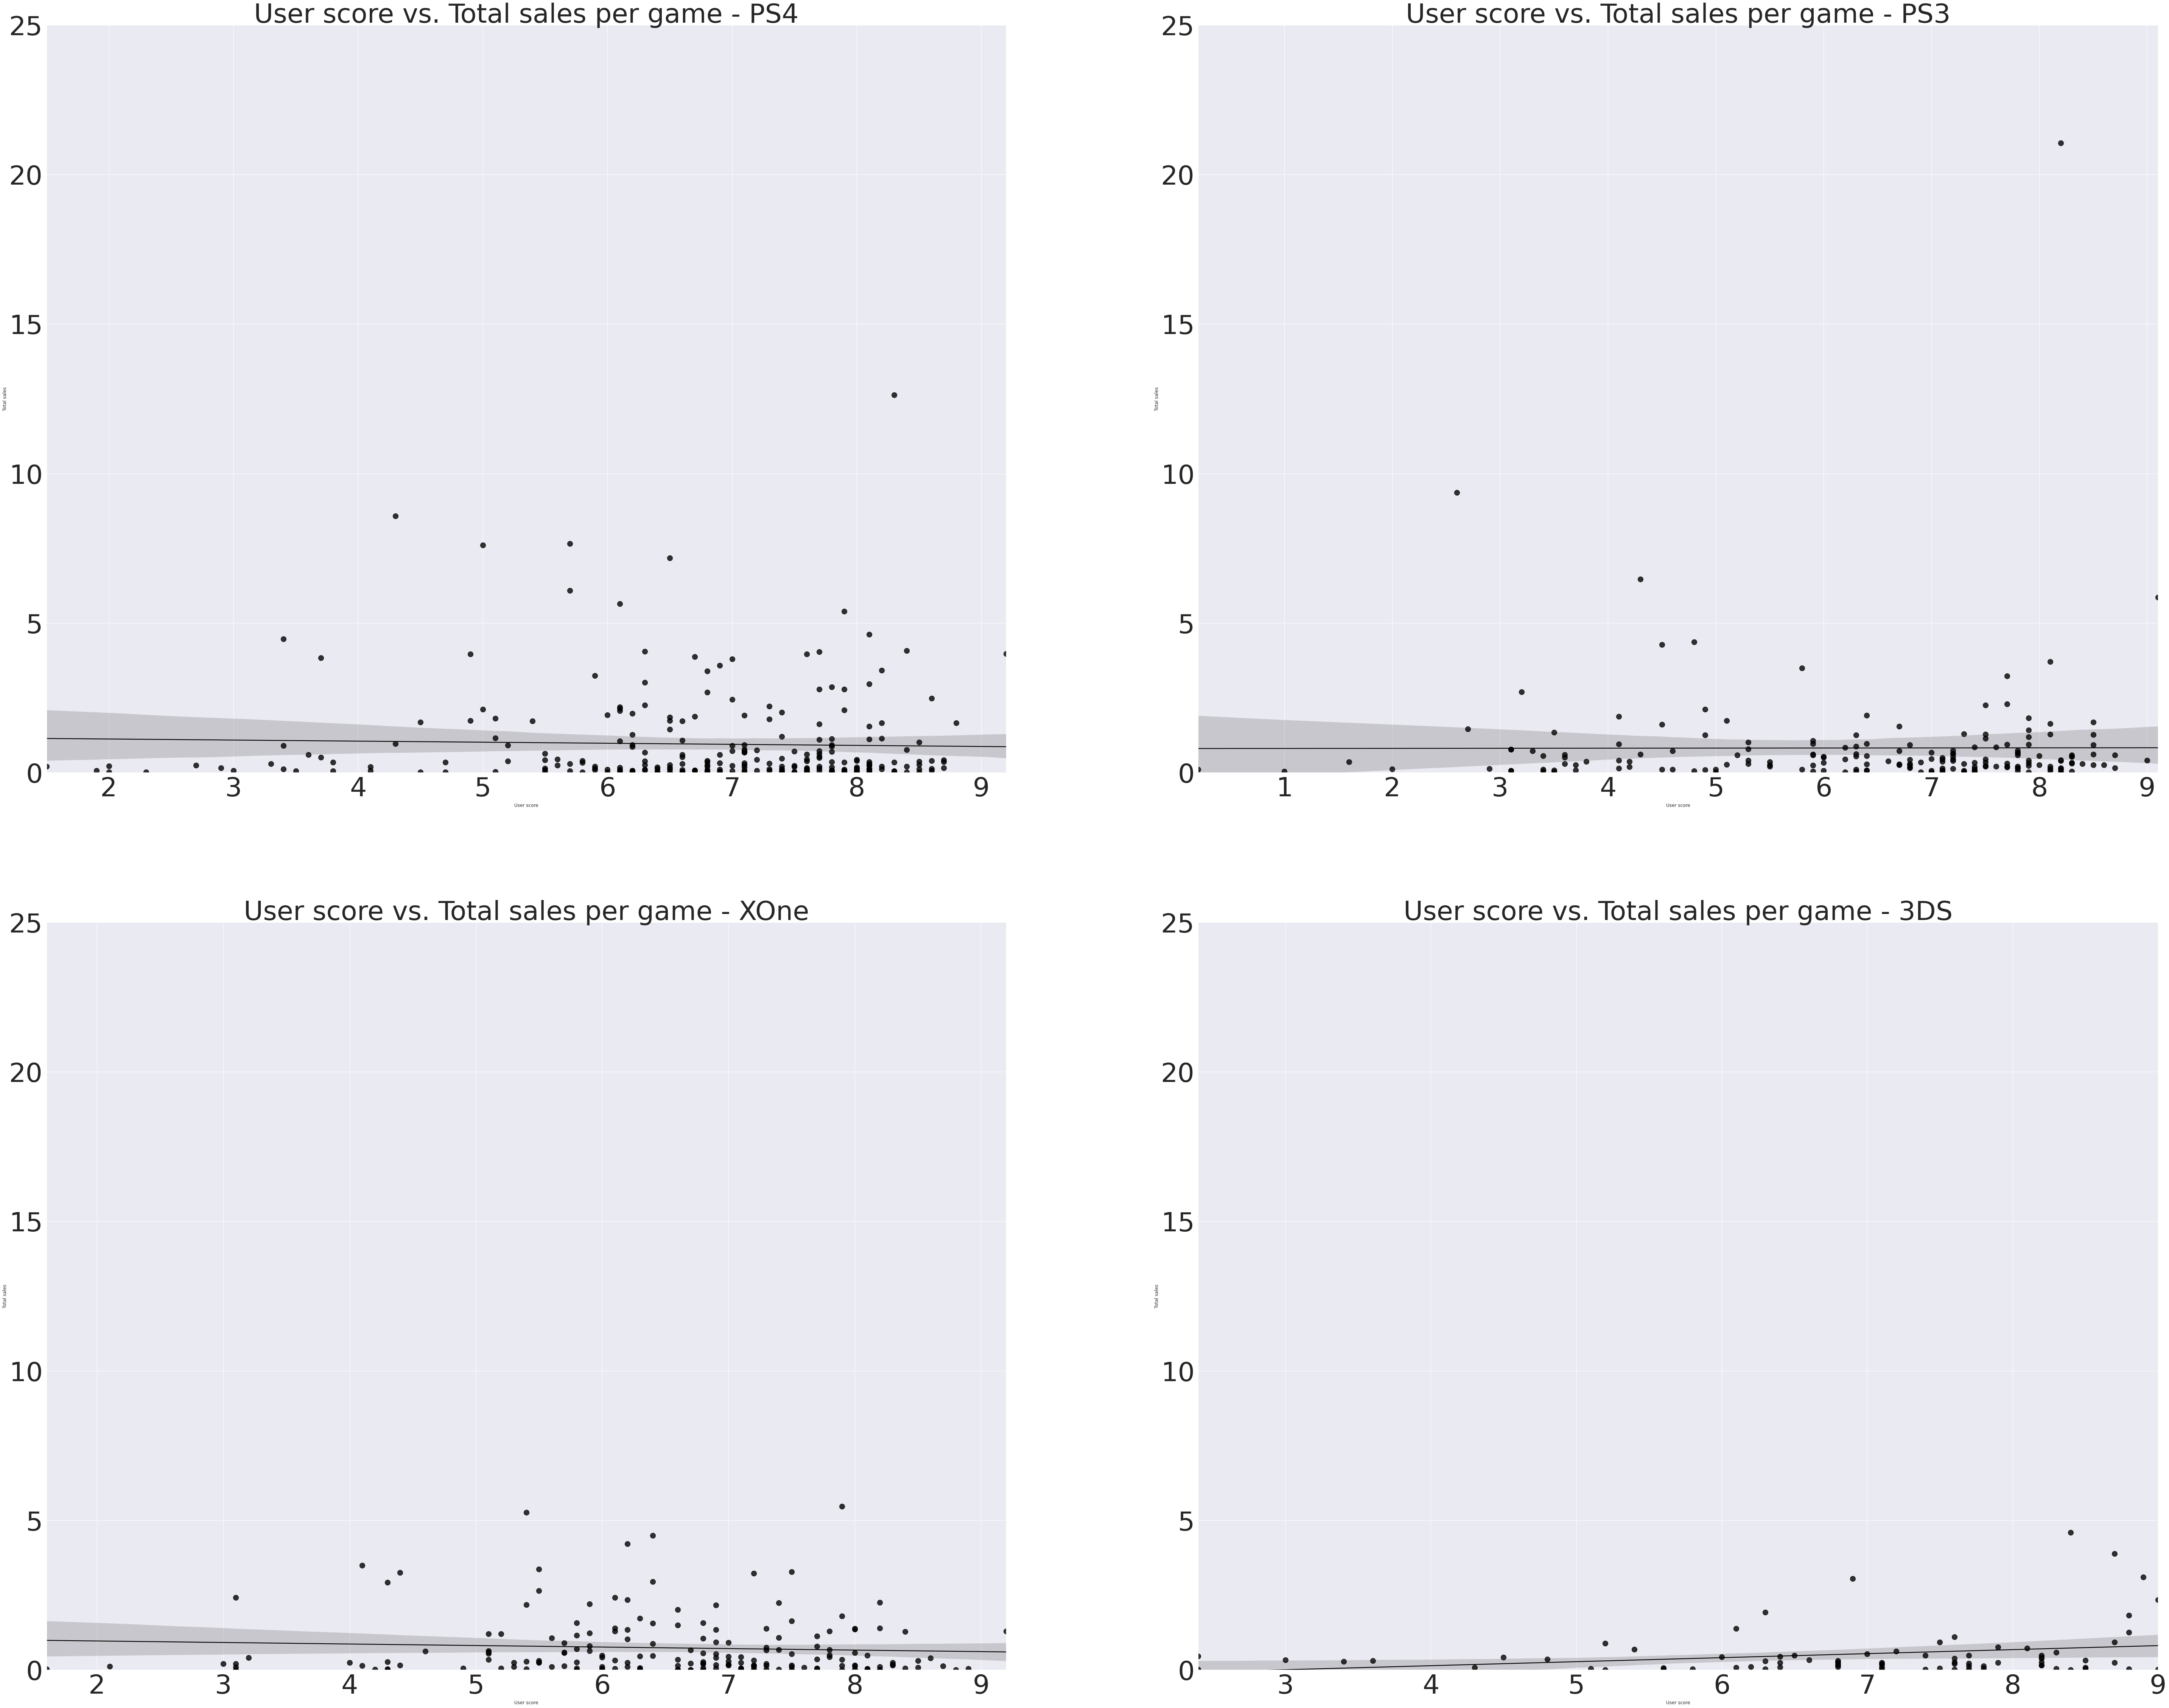

In [457]:
#Scatter plot for top 4 sellers plotting correlation between sales and user score, where user score was not missing

for i,platforms in enumerate(platforms_by_sales[:4]):
    data_plot= new_games_df.query('platform ==@platforms and user_score>=0')
    plt.subplot(2, 2, i+1)
    sns.set(rc = {'figure.figsize':(80,60)})
    sns.regplot(data=data_plot, x='user_score', y='total_sales', color='black',scatter_kws={'s':200})
    plt.ylim(0,25)
    plt.xlabel('User score')
    plt.ylabel('Total sales')
    plt.yticks(fontsize=70)
    plt.xticks(fontsize=70)
    plt.title(f'User score vs. Total sales per game - {platforms}', fontsize=70)


When considering only rows where user score was available from import, we can observe that correlation between sales and user scoring is slightly negative in all platforms except for 3DS.

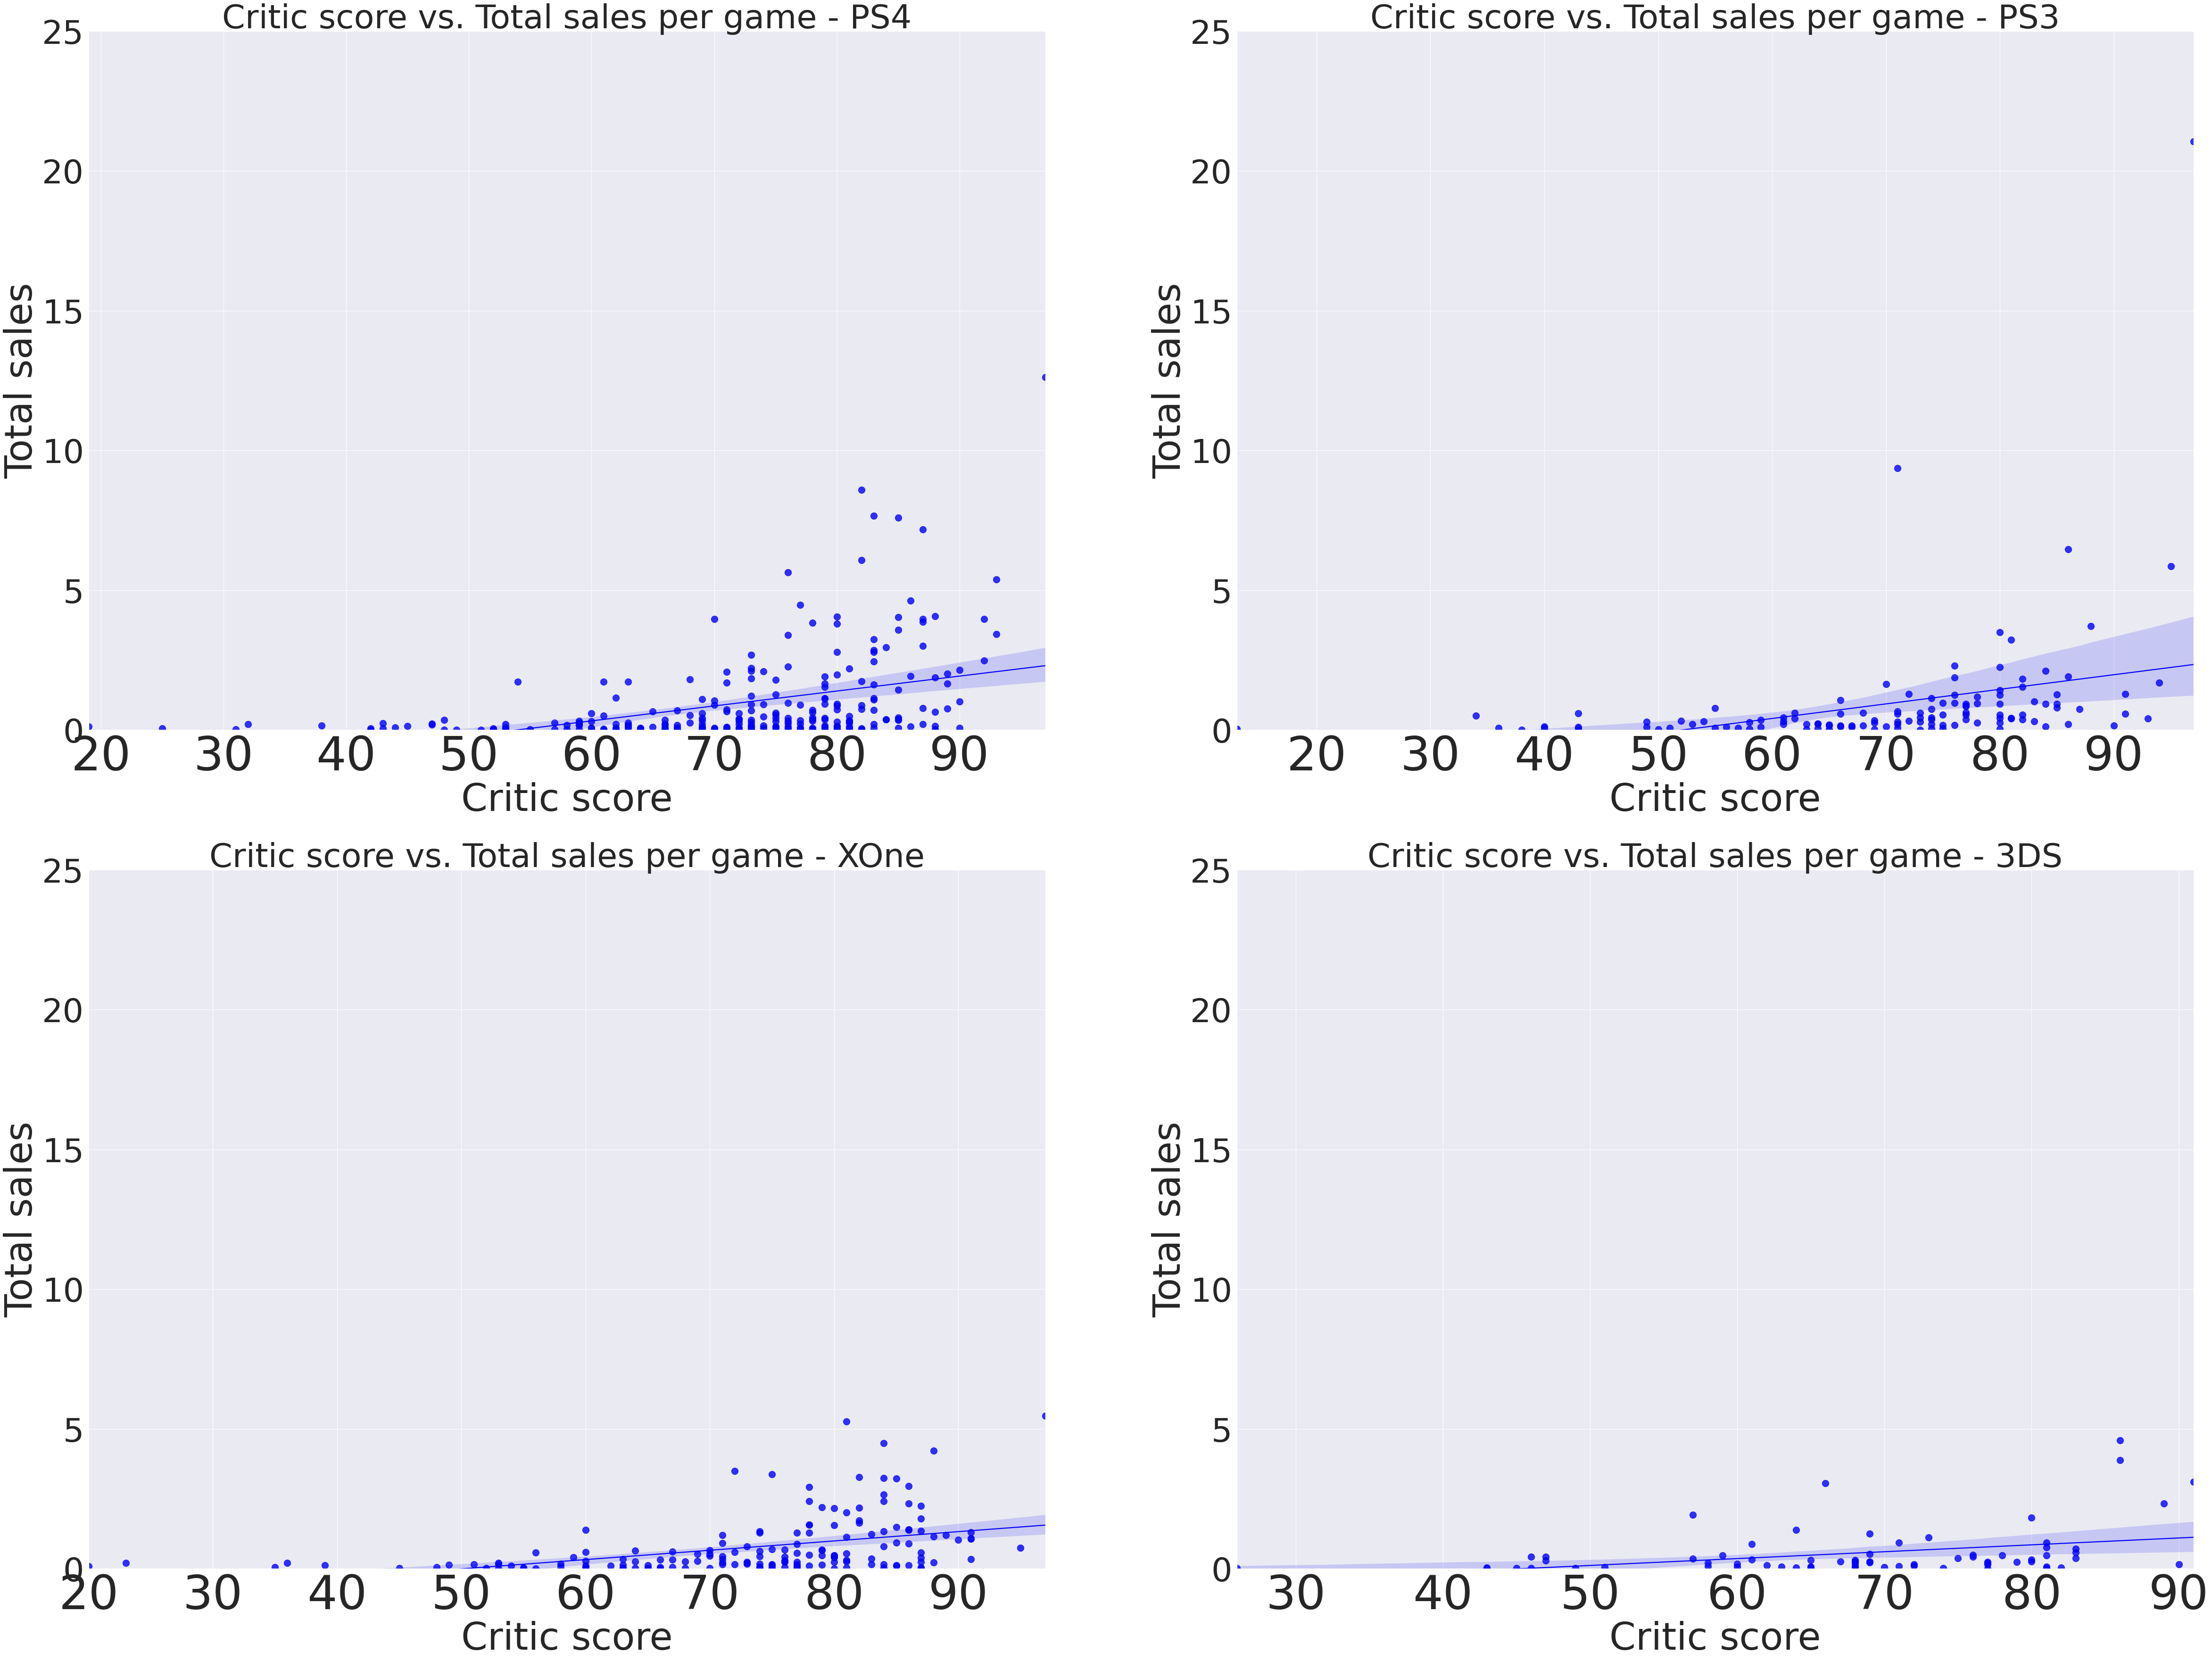

In [458]:
#Scatter plot for top 4 sellers plotting correlation between sales and critic score, where critic score was not missing
for i,platforms in enumerate(platforms_by_sales[:4]):
    data_plot= new_games_df.query('platform ==@platforms and critic_score>=0')
    plt.subplot(2, 2, i+1)
    sns.set(rc = {'figure.figsize':(120,100)})
    sns.regplot(data=data_plot, x='critic_score', y='total_sales', color='blue',scatter_kws={'s':200})
    plt.ylim(0,25)
    plt.xlabel('Critic score', fontsize=80)
    plt.ylabel('Total sales',fontsize=80)
    plt.yticks(fontsize=70)
    plt.xticks(fontsize=100)
    plt.title(f'Critic score vs. Total sales per game - {platforms}', fontsize=70)

As for critic score,considering only rows where this value was not originally missing, in all PS4, XOne, PS3 and 3DS we can visualize that there's a slightly positive correlation between critic score and sales. 

The general conclusion is that high critic scores help boosting sales, but user score standalone is not useful for predicting sales. 

To find out how this relationship between scoring and sales varies depending on whether we include missing values as a negative score, or filter them out, we'll print three heatmaps, showing correlation to total sales.

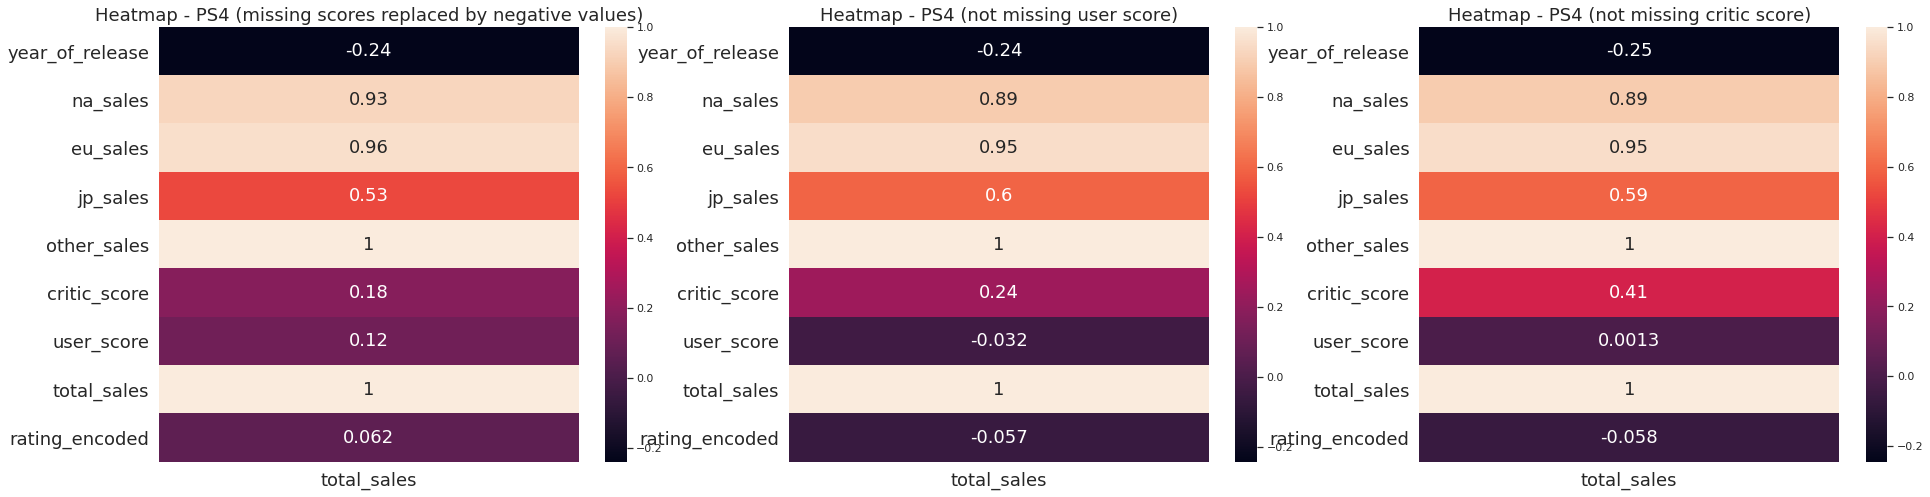

In [459]:
#plot three heatmaps aside
fig, (ax1, ax2,ax3) =  plt.subplots(1,3, figsize=(32,8))


#heatmap for PS4 platform
games_with_user_score = pd.DataFrame(new_games_df.query('platform=="PS4"').corr()['total_sales'])

sns.heatmap(games_with_user_score, annot=True,annot_kws={"fontsize":18}, ax= ax1)
ax1.set_title('Heatmap - PS4 (missing scores replaced by negative values)', fontsize = 18)
ax1.set_xticklabels(ax1.get_xmajorticklabels(), fontsize = 18)
ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize = 18)
#heatmap for PS4 platform not missing user score
games_with_user_score = pd.DataFrame(new_games_df.query('platform=="PS4" and user_score>=0').corr()['total_sales']) 

sns.heatmap(games_with_user_score, annot=True,annot_kws={"fontsize":18}, ax= ax2)
ax2.set_title('Heatmap - PS4 (not missing user score)', fontsize = 18)
ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 18)
ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 18)

#heatmap for PS4 platform not missing critic score
games_with_user_score = pd.DataFrame(new_games_df.query('platform=="PS4" and critic_score>=0').corr()['total_sales']) 

sns.heatmap(games_with_user_score, annot=True,annot_kws={"fontsize":18}, ax= ax3)
ax3.set_title('Heatmap - PS4 (not missing critic score)', fontsize = 18)
ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 18)
ax3.set_yticklabels(ax3.get_ymajorticklabels(), fontsize = 18)

plt.show()

It's easy to notice that critic score has a higher correlation to sales when excluding missing values (0.41 vs 0.18), but in both cases it's positive. On the contrary, user score has a positive correlation when considering missing values as games with a negative scoring assigned, but a negative coefficient if we only calculate it based on real user scores. This is probably due to many games lacking user score because of having low sales (and hence, no buyer's reviews). 

The conclusion we can make is that user score is publicly available after the largest portion of sales has been closed, given that games usually have high sales when recently launched and no user score is yet available. For such reason, this parameter is not useful for predicting sales as critic score is.

## 3.e) Sales in PS4 vs. same games on other platforms

### Sales and scores of the same games in PS4 and XOne

Now, we'll check out the correlation between sales, user score and critic score for the same games in PS4 and XOne (provided that they are the two platforms from the last generation of consoles that are most popular in terms of sales).

In [460]:
#Comparing sales of the same games in PS4 and XOne
ps4_games = list(new_games_df.query('platform=="PS4"')['name'].unique())
xone_games = list(new_games_df.query('platform=="XOne"')['name'].unique())

sales_ps4_xone= new_games_df.query('( platform=="XOne" | platform =="PS4" ) and (name in @ps4_games & name in @xone_games)').copy().reset_index(drop=True)
sales_ps4_xone


name platform  year_of_release  \
0                        call of duty: black ops 3      PS4             2015   
1                               grand theft auto v      PS4             2014   
2                                          fifa 16      PS4             2015   
3                     star wars battlefront (2015)      PS4             2015   
4                   call of duty: advanced warfare      PS4             2014   
..                                             ...      ...              ...   
429                       sébastien loeb rally evo     XOne             2016   
430                              rugby challenge 3     XOne             2016   
431                                         zombiu     XOne             2016   
432                               prison architect     XOne             2016   
433  metal gear solid v: the definitive experience     XOne             2016   

      genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0    Action      6.03      5.86      0.36         2.38        -100.0   
1    Action      3.96      6.31      0.38         1.97          97.0   
2    Sports      1.12      6.12      0.06         1.28          82.0   
3    Action      2.99      3.49      0.22         1.28        -100.0   
4    Action      2.81      3.48      0.14         1.23          83.0   
..      ...       ...       ...       ...          ...           ...   
429  Sports      0.00      0.01      0.00         0.00          63.0   
430  Sports      0.00      0.01      0.00         0.00        -100.0   
431  Action      0.00      0.01      0.00         0.00        -100.0   
432  Action      0.01      0.00      0.00         0.00          74.0   
433  Action      0.01      0.00      0.00         0.00        -100.0   

     user_score   rating  total_sales  rating_encoded    company  
0          -1.0  unknown        14.63               0    PS home  
1           8.3        M        12.62               2    PS home  
2           4.3        E         8.58               5    PS home  
3          -1.0  unknown         7.98               0    PS home  
4           5.7        M         7.66               2    PS home  
..          ...      ...          ...             ...        ...  
429         8.2        E         0.01               5  Xbox home  
430         6.6        E         0.01               5  Xbox home  
431        -1.0  unknown         0.01               0  Xbox home  
432         6.7  unknown         0.01               0  Xbox home  
433        -1.0        M         0.01               2  Xbox home  

[434 rows x 14 columns]

In [461]:
#create table with games available for both platforms, including sales, user score and critic score for each one of them
sales_ps4_xone_pivot= sales_ps4_xone.pivot_table(index='name', columns='platform' , values='total_sales', aggfunc='sum').reset_index()
sales_ps4_xone_pivot['ps4_user_score']=0
sales_ps4_xone_pivot['ps4_critic_score']=0
sales_ps4_xone_pivot['xone_user_score']=0
sales_ps4_xone_pivot['xone_critic_score']=0
for i in range(len(sales_ps4_xone_pivot)):
    game= sales_ps4_xone_pivot.loc[i,'name']
    sales_ps4_xone_pivot.loc[i,'ps4_user_score']= float(new_games_df.loc[(new_games_df['platform']=="PS4") & (new_games_df['name']== game),'user_score'])
    sales_ps4_xone_pivot.loc[i,'ps4_critic_score']= float(new_games_df.loc[(new_games_df['platform']=="PS4") & (new_games_df['name']== game),'critic_score'])
    sales_ps4_xone_pivot.loc[i,'xone_user_score']= float(new_games_df.loc[(new_games_df['platform']=="XOne") & (new_games_df['name']== game),'user_score'])
    sales_ps4_xone_pivot.loc[i,'xone_critic_score']= float(new_games_df.loc[(new_games_df['platform']=="XOne") & (new_games_df['name']== game),'critic_score'])

    
sales_ps4_xone_pivot.set_index(sales_ps4_xone_pivot['name']).drop(columns='name', inplace=True)
sales_ps4_xone_pivot.rename(columns={'PS4': 'sales_PS4', 'XOne':'sales_xone'}, inplace=True)
sales_ps4_xone_pivot.head()

platform                                        name  sales_PS4  sales_xone  \
0                                      7 days to die       0.14        0.05   
1         adventure time: finn & jake investigations       0.10        0.05   
2                  agatha christie's the abc murders       0.02        0.01   
3                                   alien: isolation       1.12        0.50   
4                              angry birds star wars       0.22        0.17   

platform  ps4_user_score  ps4_critic_score  xone_user_score  xone_critic_score  
0                    5.9                45              5.2                 35  
1                   -1.0              -100             -1.0               -100  
2                    6.2                67              7.5                 66  
3                    8.1                79              7.8                 78  
4                    2.0                47              6.9                 53

In [462]:
#store columns' name in list
cols_to_plot= list(sales_ps4_xone_pivot.columns[1:])
cols_to_plot

['sales_PS4',
 'sales_xone',
 'ps4_user_score',
 'ps4_critic_score',
 'xone_user_score',
 'xone_critic_score']

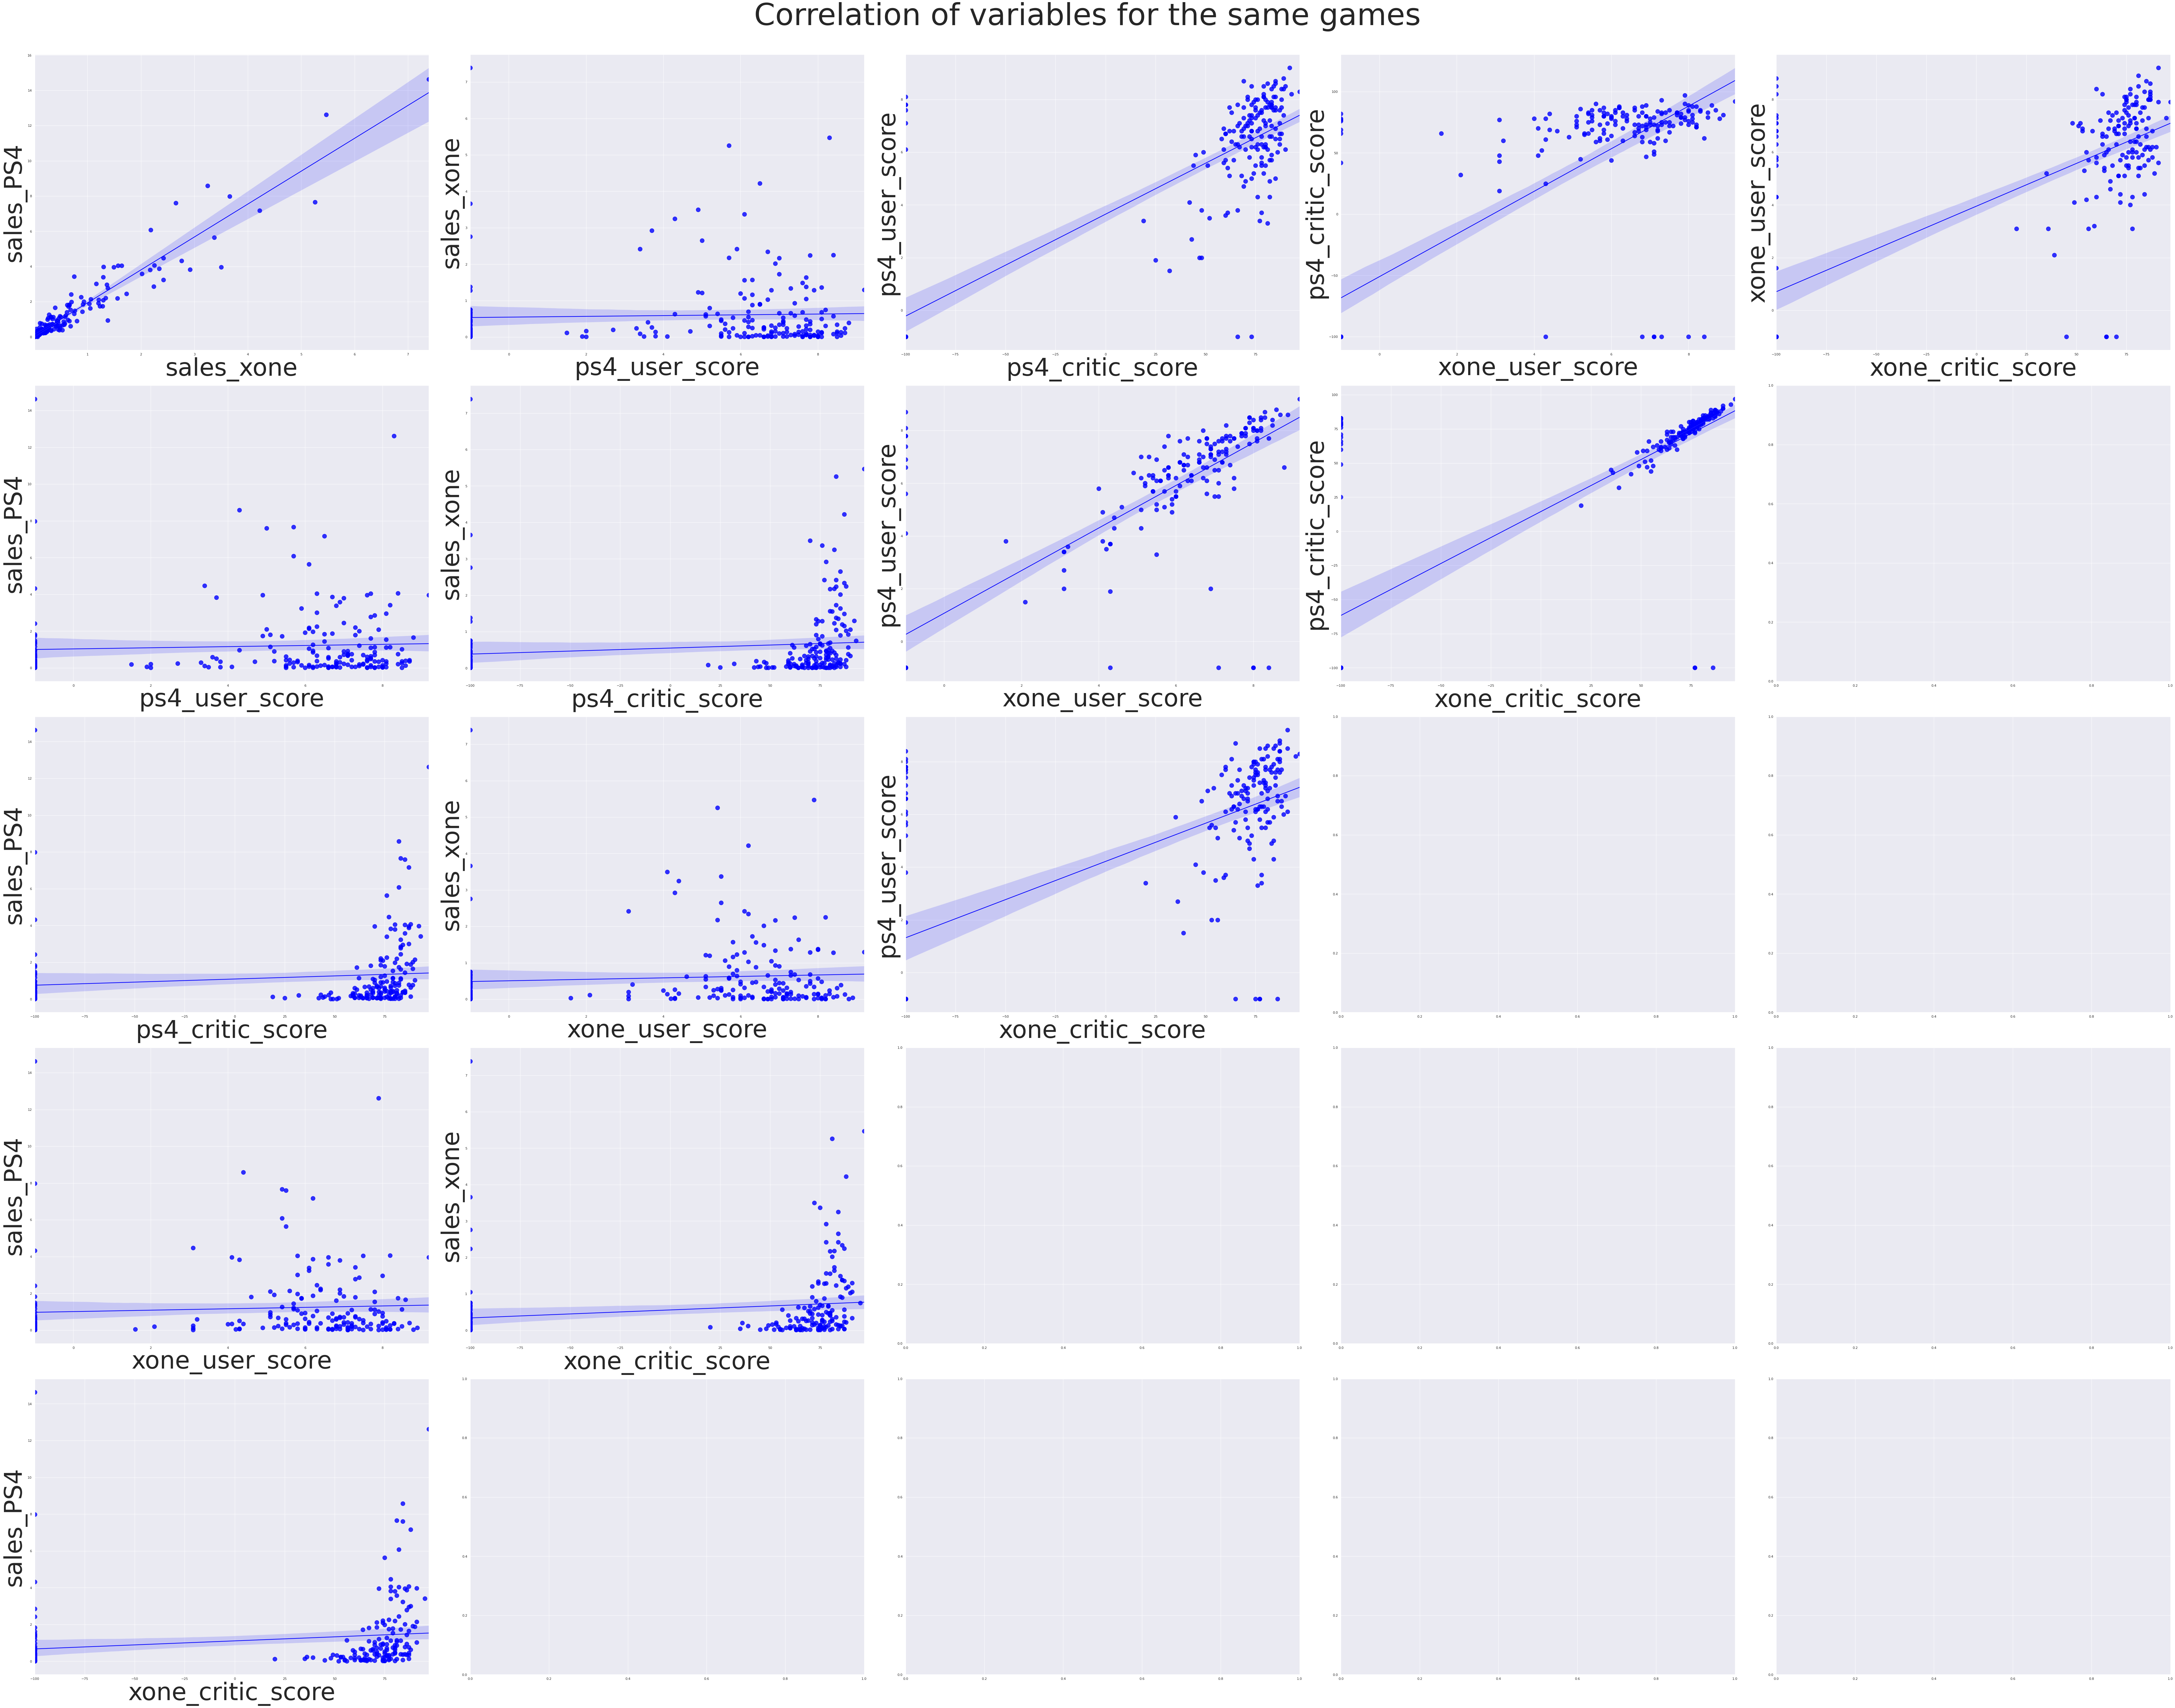

In [463]:
#Draw a scatter plot correlating sales, user score and critic score between platforms 
sns.set( rc = {'figure.figsize' : ( 20, 20 ), 'axes.labelsize' : 80}) 
fig,axes= plt.subplots(5, 5, figsize=(100, 80))
fig.suptitle('Correlation of variables for the same games', fontsize=100)  

for x in range(len(cols_to_plot)-1):
    col_x= cols_to_plot[x]
    
    
    
    for i,y in enumerate(range(x+1,len(cols_to_plot))):

        col_y= cols_to_plot[y]
        
        ax_x= i
        ax_y= x 
        
        sns.regplot(ax= axes[ax_x,ax_y] ,data=sales_ps4_xone_pivot, x=col_y, y=col_x, color='blue',scatter_kws={'s':200})

fig.tight_layout()
fig.subplots_adjust(top=0.95)

Critic score and user score for the same games are strongly correlated to each other and among both platforms. Considering that we are including missing scores as negative, we can conclude that the same games are missing score in the two platforms. 

Sales in both platforms also shows a high linear correlation, but when it comes to relating sales and scoring, critic score seems to have a greater influence on sales than user score.

### Sales of the same games in PS4 and the rest of active platforms in 2016 (sorted by total sales)

Coming up, we'll draw scatter-plots correlating sales for each game available for PS4 to those same games in other platforms.

In [464]:
#add up sales for games available for PS4 in other platforms
sales_dif_plat= new_games_df.query('name in @ps4_games').copy().reset_index(drop=True)
sales_dif_plat_pivot= sales_dif_plat.pivot_table(index='name', columns='platform' , values='total_sales', aggfunc='sum',fill_value=0).reset_index()
sales_dif_plat_pivot.set_index(sales_dif_plat_pivot['name']).drop(columns='name', inplace=True)
sales_dif_plat_pivot


platform                                        name   3DS   PC   PS3   PS4  \
0                                      7 days to die  0.00  0.0  0.00  0.14   
1         adventure time: finn & jake investigations  0.09  0.0  0.08  0.10   
2                 aegis of earth: protonovus assault  0.00  0.0  0.02  0.02   
3                  agatha christie's the abc murders  0.00  0.0  0.00  0.02   
4                   akiba's trip: undead & undressed  0.00  0.0  0.11  0.11   
..                                               ...   ...  ...   ...   ...   
387                   yakuza zero: the place of oath  0.00  0.0  0.25  0.17   
388                                    yakuza: ishin  0.00  0.0  0.26  0.15   
389                                 yoru no nai kuni  0.00  0.0  0.05  0.08   
390                              zombie army trilogy  0.00  0.0  0.00  0.20   
391                                           zombiu  0.00  0.0  0.00  0.06   

platform   PSV  Wii  WiiU  X360  XOne  
0         0.00  0.0  0.00  0.00  0.05  
1         0.00  0.0  0.05  0.09  0.05  
2         0.03  0.0  0.00  0.00  0.00  
3         0.00  0.0  0.00  0.00  0.01  
4         0.15  0.0  0.00  0.00  0.00  
..         ...  ...   ...   ...   ...  
387       0.00  0.0  0.00  0.00  0.00  
388       0.00  0.0  0.00  0.00  0.00  
389       0.08  0.0  0.00  0.00  0.00  
390       0.00  0.0  0.00  0.00  0.11  
391       0.00  0.0  0.00  0.00  0.01  

[392 rows x 10 columns]

In [465]:
#print platforms by sales

platforms_by_sales

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii']

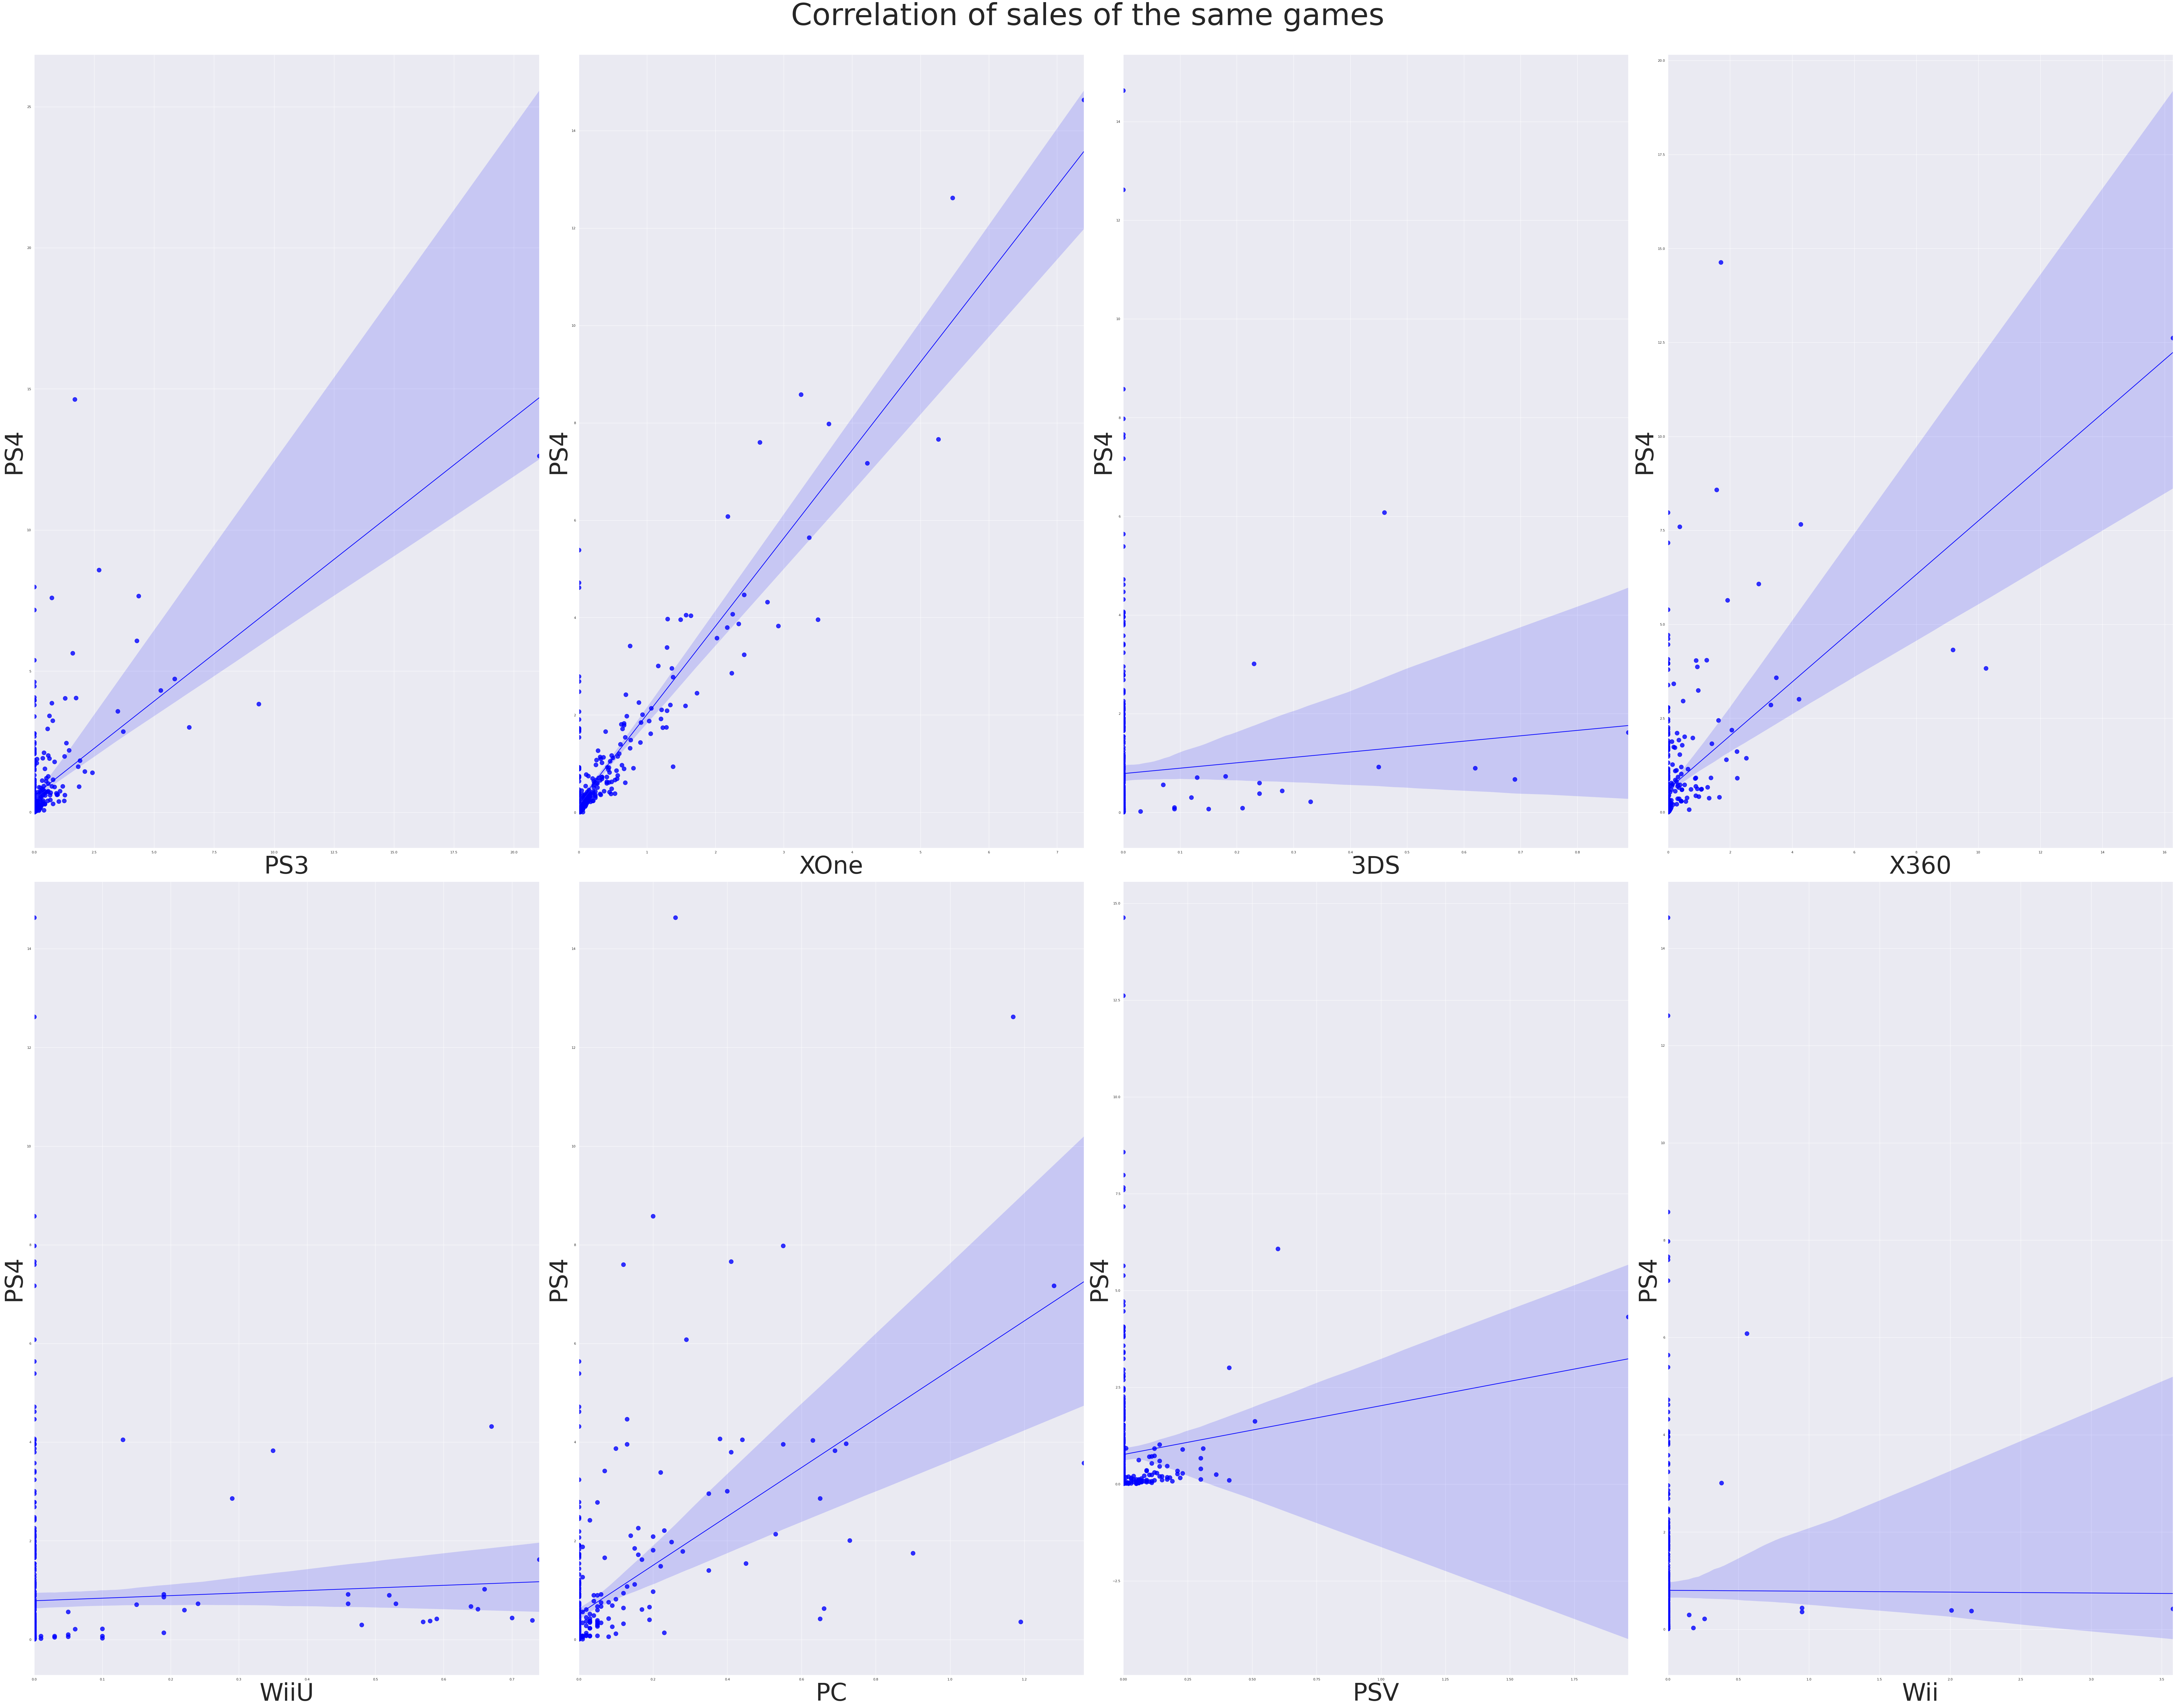

In [466]:
#Plot correlation between sales for the same games across different platforms
fig,axes= plt.subplots(2, 4, figsize=(100, 80))
fig.suptitle('Correlation of sales of the same games', fontsize=100) 
col_x= 'PS4'
    

for i,y in enumerate(range(1,len(platforms_by_sales))):

    col_y= platforms_by_sales[y]
    
    if i<4:
        
        ax_x= 0
        ax_y= i
    else:
        ax_x= 1
        ax_y= i-4



    sns.set( rc = {'figure.figsize' : ( 20, 20 ), 
           'axes.labelsize' : 100})
    sns.regplot(ax= axes[ax_x,ax_y] ,data=sales_dif_plat_pivot, x=col_y, y=col_x, color='blue',scatter_kws={'s':200})
 
fig.tight_layout()
fig.subplots_adjust(top=0.95)

The platforms where the same games have a similar sales amount to PS4 are XOne, PS3, X360 and PC. The fact that the two most attractive platforms in terms of profitability expected for the following year have a similar selling behaviour for the same games is key to this analysis, as it means that by promoting games independently, sales will increase for both consoles.

## 3.f)  Distribution of games by genre

Coming up, we'll compare the median and mean sales per game by genre, and analyze what genres are the ones with the highest sales and games released.

Text(0.5, 1.0, 'Mean vs. median sales by genre- All active platforms in 2016')

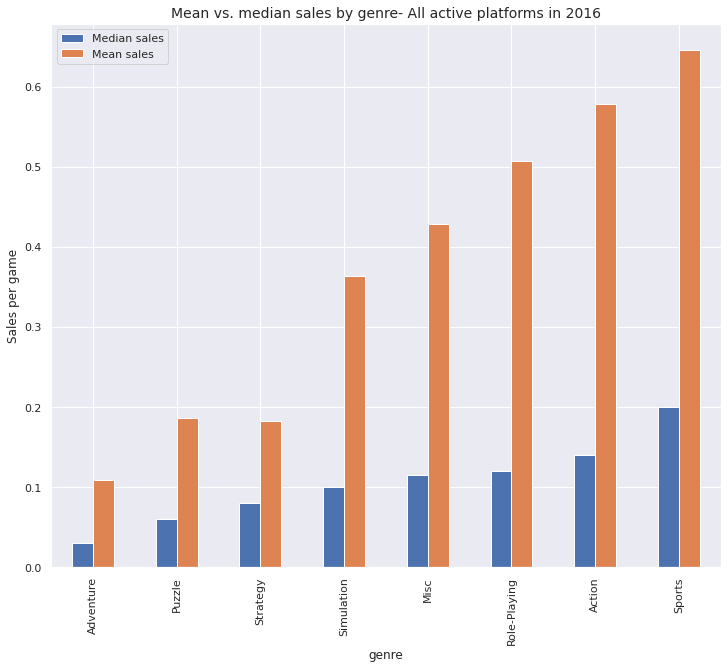

In [467]:
# Compare the median and mean sales per game across all genres
median_sales_genre= new_games_df.pivot_table(index='genre', values='total_sales', aggfunc=['median','mean']).sort_values(by=[('median','total_sales')])



sns.set( rc = {'figure.figsize' : ( 12, 8 ), 'axes.labelsize' : 12}) 
median_sales_genre.plot(kind='bar', figsize=(12,10))
plt.ylabel('Sales per game')
plt.legend(['Median sales', 'Mean sales']);
plt.title('Mean vs. median sales by genre- All active platforms in 2016', fontsize=14)

Median sales by genre are always higher than average sales, meaning that the data is negatively skewed due to many games with low sales pulling down the mean. Genres with the highest median and mean are Sports, action and role-playing.

Text(0.5, 1.0, 'Games sold vs. total sales by genre - All active platforms in 2016')

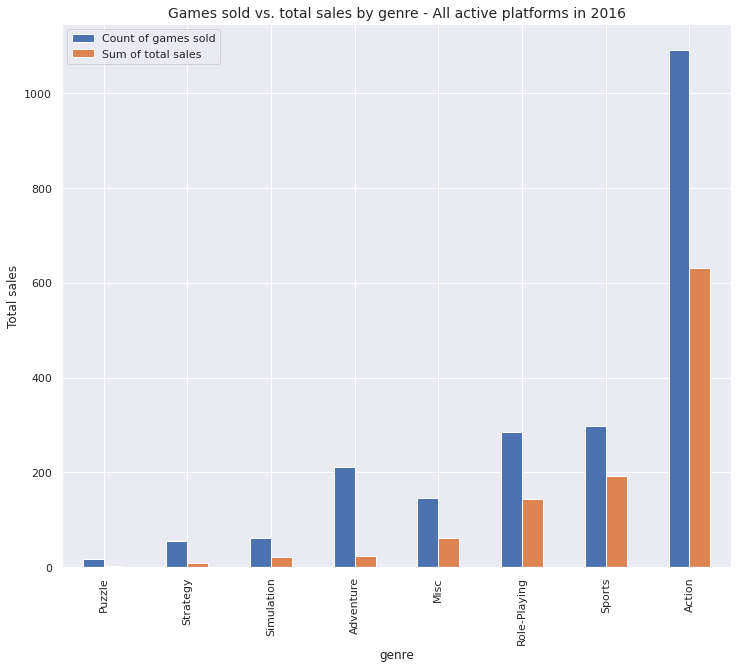

In [468]:
#Compare the count of games sold and total sales  per game across all genres

total_sales_genre= new_games_df.pivot_table(index='genre', values='total_sales', aggfunc=['count','sum']).sort_values(by=[('sum','total_sales')])


total_sales_genre.plot(kind='bar', figsize=(12,10))
plt.legend(['Count of games sold', 'Sum of total sales']);
plt.ylabel('Total sales')
plt.title('Games sold vs. total sales by genre - All active platforms in 2016', fontsize=14)

In spite of Sports games having a higher mean and median sales amount per game, Action has the greatest total sales and count of games sold overall. This means that even though selling a sports game is more likely to provide a larger margin because of it price being higher, Action is the most popular genre are the one that has more games released. Next we're going to take a closer look at historical genre distribution in the two companies whose platforms are still growing: PlayStation (PS4) and XBOX (Xone).

Text(0.5, 1.0, 'Total sales by genre - Play Station & XBox')

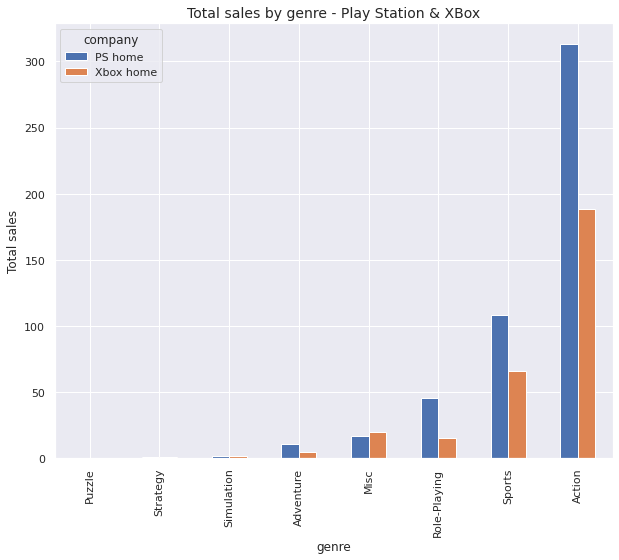

In [469]:
#create pivot table with count of games released by genre for XBOX and Play station
games_sold_by_gen= new_games_df.query('company=="PS home" or company=="Xbox home"').pivot_table(index='genre', columns='company', values='total_sales', aggfunc='sum', fill_value=0, margins=True).sort_values(by='All')

games_sold_by_gen.loc[:'Action',['PS home','Xbox home']].plot(kind='bar', figsize=(10,8))

plt.ylabel('Total sales')
plt.title('Total sales by genre - Play Station & XBox', fontsize=14)

The distribution of sales by genre matches the one of the active platforms overall.

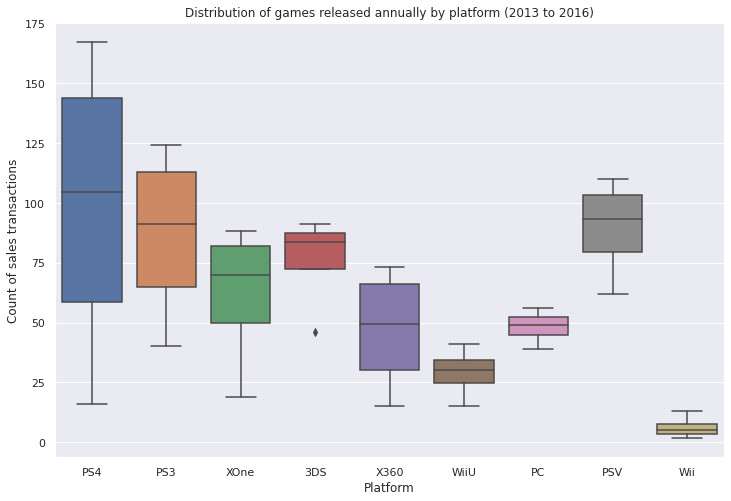

In [470]:
#PLot distribution of games traded annually by platform
plt.figure(figsize=(12,8))
sns.boxplot(data=games_sold_by_plat, order=platforms_by_sales)

plt.title('Distribution of games released annually by platform (2013 to 2016)')
plt.xlabel('Platform')
plt.ylabel('Count of sales transactions');

# 4. Create a user profile for each region



## 4.a) Top five platforms per market

Below, we'll depict the market share of each region in a pie chart. Then, we'll compare the sales by platform followed by the sales per genre in each market.

In [471]:
#print proportion of sales per market


sales_per_market= pd.DataFrame({'market': ['NA','EU','JP','OTHER'],
                                'market_sales':[ new_games_df['na_sales'].sum(),new_games_df['eu_sales'].sum(),new_games_df['jp_sales'].sum(),new_games_df['other_sales'].sum() ]
                                })
sales_per_market

market  market_sales
0     NA        437.57
1     EU        394.24
2     JP        138.24
3  OTHER        120.51

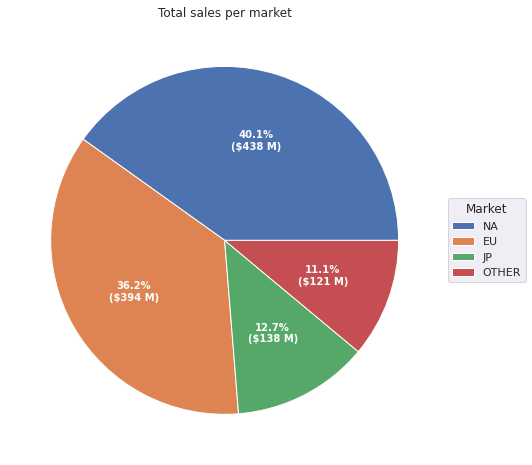

In [472]:
#plot proportion of sales per market

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

market_sales = sales_per_market['market_sales']
market = sales_per_market['market']


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n(${:d} M)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(market_sales, autopct=lambda pct: func(pct, market_sales),
                                  textprops=dict(color="w"))

ax.legend(wedges, market,
          title="Market",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Total sales per market")

plt.show()

In the last 4 years, North America has been the market with greatest sales (40%), followed by Europe (36%).

In [473]:
#NA Top five active platforms

na_top_5_platforms= new_games_df.pivot_table(index='platform',values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head()
na_top_5_platforms

na_sales
platform          
PS4         108.74
XOne         93.12
X360         81.74
PS3          63.68
3DS          38.25

In [474]:
#EU Top five active platforms

eu_top_5_platforms= new_games_df.pivot_table(index='platform',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()
eu_top_5_platforms

eu_sales
platform          
PS4         141.09
PS3          68.44
XOne         51.59
X360         42.72
3DS          30.98

In [475]:
#jp Top five active platforms

jp_top_5_platforms= new_games_df.pivot_table(index='platform',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()
jp_top_5_platforms

jp_sales
platform          
3DS          67.91
PS3          23.84
PSV          18.59
PS4          15.96
WiiU         10.88

In [476]:
#other Top five active platforms

other_top_5_platforms= new_games_df.pivot_table(index='platform',values='other_sales', aggfunc='sum').sort_values(by='other_sales',ascending=False).head()
other_top_5_platforms

other_sales
platform             
PS4             48.35
PS3             27.01
XOne            14.27
X360            12.14
3DS              6.29

In [477]:
#merge pivot tables, filling empty values with 0 if there were no sales for that platform in any market

merged_platforms= na_top_5_platforms.merge(eu_top_5_platforms, how='outer', right_index=True, left_index=True)
merged_platforms = merged_platforms.merge(jp_top_5_platforms, how='outer', right_index=True, left_index=True)
merged_platforms = merged_platforms.merge(other_top_5_platforms, how='outer', right_index=True, left_index=True)
merged_platforms= merged_platforms.fillna(0)
merged_platforms ['total_sales'] = merged_platforms.apply(lambda row: row['na_sales']+row['eu_sales']+row['jp_sales']+row['other_sales'], axis=1)
merged_platforms.sort_values(by='total_sales', ascending=False, inplace=True)
merged_platforms

na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
PS4         108.74    141.09     15.96        48.35       314.14
PS3          63.68     68.44     23.84        27.01       182.97
XOne         93.12     51.59      0.00        14.27       158.98
3DS          38.25     30.98     67.91         6.29       143.43
X360         81.74     42.72      0.00        12.14       136.60
PSV           0.00      0.00     18.59         0.00        18.59
WiiU          0.00      0.00     10.88         0.00        10.88

Text(0.5, 1.0, 'Total sales by platform 2013-2016')

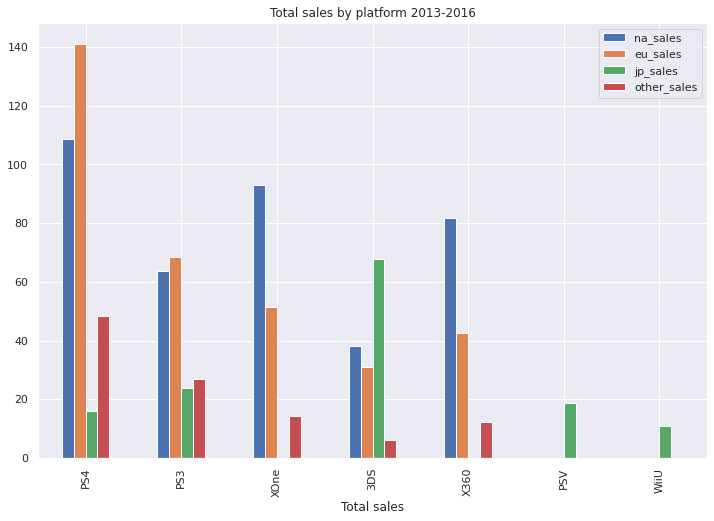

In [478]:
#plot sales by platform in each market
merged_platforms.drop(columns='total_sales').plot(kind='bar')
plt.xlabel('Total sales')
plt.title('Total sales by platform 2013-2016')

PS4 largest market was Europe, followed by NA, as it was for PS3. For XBox (XOne and X360), it was the other way round. For 3DS Japan captured the greatest portion of sales, and PSV and WiiU only had sales in that same market.

## 4.b)  Top five genres per market

In [479]:
#NA Top five genres

na_top_5_genres= new_games_df.pivot_table(index='genre',values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head()
na_top_5_genres

na_sales
genre                 
Action          269.17
Sports           78.54
Role-Playing     46.40
Misc             27.46
Adventure         7.14

In [480]:
#EU Top five active platforms

eu_top_5_genres= new_games_df.pivot_table(index='genre',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()
eu_top_5_genres

eu_sales
genre                 
Action          229.75
Sports           82.43
Role-Playing     36.97
Misc             20.00
Simulation       11.65

In [481]:
#jp Top five active platforms

jp_top_5_genres= new_games_df.pivot_table(index='genre',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()
jp_top_5_genres

jp_sales
genre                 
Action           58.68
Role-Playing     50.11
Misc              9.03
Sports            7.86
Adventure         5.11

In [482]:
#other Top five active platforms

other_top_5_genres= new_games_df.pivot_table(index='genre',values='other_sales', aggfunc='sum').sort_values(by='other_sales',ascending=False).head()
other_top_5_genres

other_sales
genre                    
Action              73.61
Sports              24.35
Role-Playing        11.48
Misc                 6.08
Adventure            2.43

In [483]:
#plot sales by genre in each market
merged_genres= na_top_5_genres.merge(eu_top_5_genres, how='outer', right_index=True, left_index=True)
merged_genres = merged_genres.merge(jp_top_5_genres, how='outer', right_index=True, left_index=True)
merged_genres = merged_genres.merge(other_top_5_genres, how='outer', right_index=True, left_index=True)
merged_genres= merged_genres.fillna(0)
merged_genres ['total_sales'] = merged_genres.apply(lambda row: row['na_sales']+row['eu_sales']+row['jp_sales']+row['other_sales'], axis=1)
merged_genres.sort_values(by='total_sales', ascending=False, inplace=True)
merged_genres

na_sales  eu_sales  jp_sales  other_sales  total_sales
genre                                                               
Action          269.17    229.75     58.68        73.61       631.21
Sports           78.54     82.43      7.86        24.35       193.18
Role-Playing     46.40     36.97     50.11        11.48       144.96
Misc             27.46     20.00      9.03         6.08        62.57
Adventure         7.14      0.00      5.11         2.43        14.68
Simulation        0.00     11.65      0.00         0.00        11.65

<AxesSubplot:xlabel='genre'>

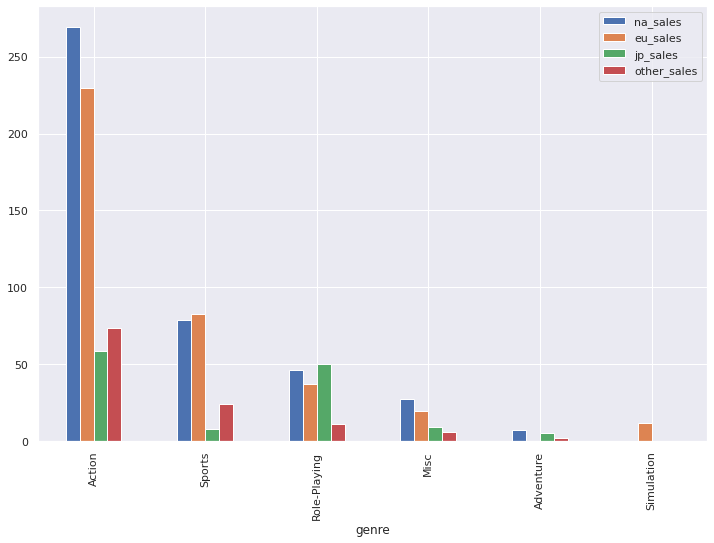

In [484]:
#plot sales by genre per market
merged_genres.drop(columns='total_sales').plot(kind='bar')

Action sold the most in North America and Europe, as well as sports. Japan is the smallest market for both genres, and the largest for Role playing.

Simulation only had a few sales in Europe, where Adventure did not succeed. 

## 4.c)  Correlation between ESRB rating and sales in each region

Next, we'll see how the ESRB rating affects sales in each market. Provided that half of the dataset was missing rating, we expect 'unknown' (rating encoded = 0) to have the large sales. Out of the rest of the games, given that action games are the ones leading sales, we expect "TEEN" or "MATURE" to have the greatest revenue. Recall from section 2 that:

T = TEEN

Ages 13 and older. May contain violence, suggestive themes, crude humor, minimal blood, simulated gambling, and/or infrequent use of strong language.

M = MATURE

Persons ages 17 and older. May contain intense violence, blood and gore, sexual content, and/or strong language.

In [485]:
#print count of each rating value
new_games_df.groupby('rating')['rating_encoded'].value_counts()

rating   rating_encoded
E        5                 301
E10+     4                 251
M        2                 370
T        3                 332
unknown  0                 914
Name: rating_encoded, dtype: int64

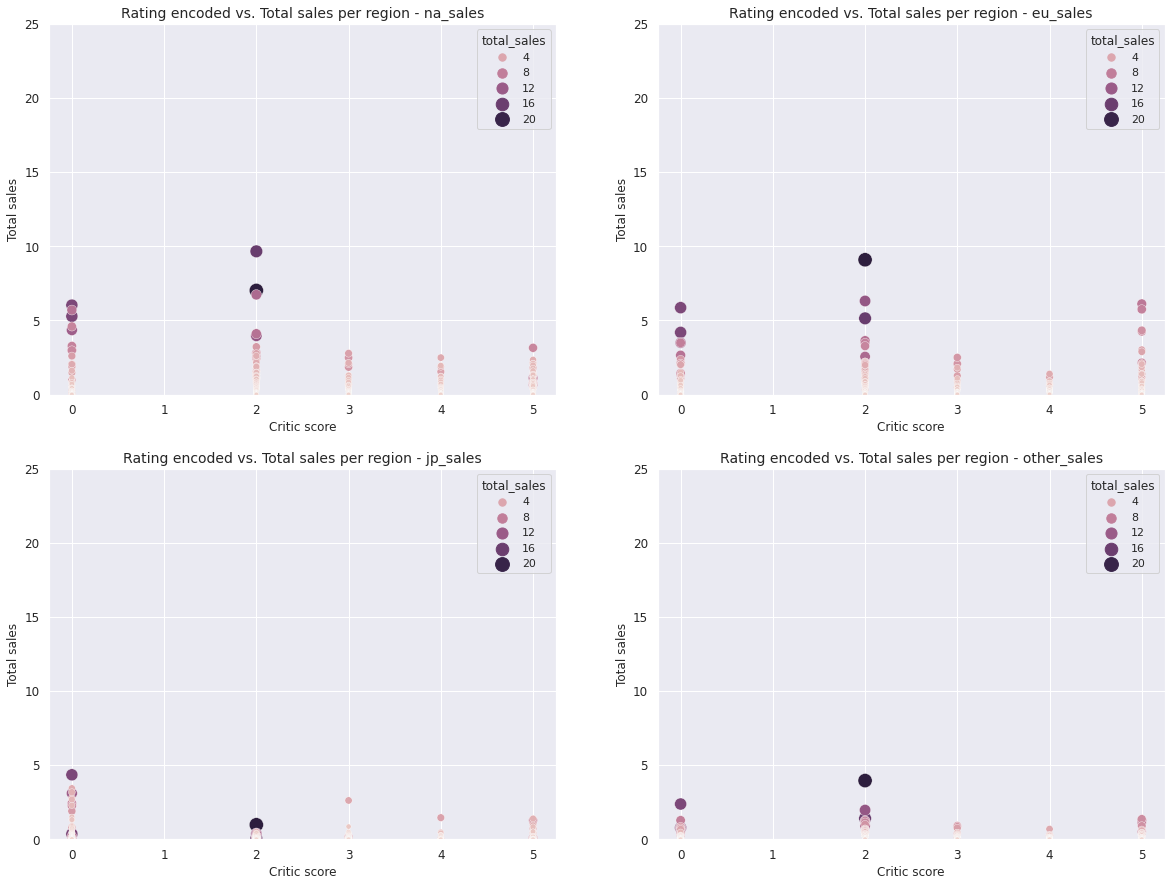

In [486]:
#Scatter plot foreach region plotting correlation between sales and critic score
sns.set( rc = {'figure.figsize' : ( 20, 15 ), 'axes.labelsize' : 12, "font.size":8})


for i,column in enumerate(['na_sales','eu_sales','jp_sales','other_sales']):
    data_plot= new_games_df
    
    plt.subplot(2, 2, i+1)

    splot=sns.scatterplot(data=data_plot, x='rating_encoded', y=column,hue='total_sales', size='total_sales', sizes=(20,200))
    
    plt.ylim(0,25)
    plt.xlabel('Critic score', fontsize=12)
    plt.ylabel('Total sales',fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(f'Rating encoded vs. Total sales per region - {column}', fontsize=14)


All the datapoints in intense purple (higher count) correspond to games with rating_encoded = 0 (missing rating) and 2 (mature) in all markets. In NA and EU both made the largest sales. This tells a lot about the typical user's age (teenagers who disregard the ESRB advise on being older than 17) and preferences (action, sports games with sensitive content). In Japan, mature games sell less, what can reveal a preference for more naive games in that market.

# 5. Hypothesis testing

## 5.a) Average user ratings of the Xbox One and PC platforms are the same.

In [487]:
new_games_df['other_sales'].describe()

count    2168.000000
mean        0.055586
std         0.167979
min         0.000000
25%         0.000000
50%         0.010000
75%         0.040000
max         3.960000
Name: other_sales, dtype: float64

Null hypothesis: "The average user ratings of the Xbox One and PC platforms are the same"

Alternative hypothesis: "The average user ratings of the Xbox One and PC platforms are different"

Statistical test: Hypothesis on the Equality of Two Population Mean.

alpha= 0.05

In [488]:
#Define parameters to test if the mean user rating for XOne is equal to the mean of PC

sample_xone =new_games_df.query('platform=="XOne"and user_score>0')['user_score']
sample_pc= new_games_df.query('platform=="PC"and user_score>0')['user_score']
alpha=0.05


In [489]:
#print mean user score for each platform
print( sample_xone.mean())
print(sample_pc.mean())

6.521428571428572
6.298113207547169


In [490]:
# Test the hypotheses


results=stats.ttest_ind(sample_xone,sample_pc, equal_var=False)
print(results.pvalue)

if results.pvalue<alpha:
    
    print('We reject the null hypothesis. The average user score for both platforms differs')
    
else:
    
    
    print('We can\'t reject the null hypothesis')

0.19350702328016764
We can't reject the null hypothesis


## 5.b) Average user ratings for the Action and Sports genres are different

Null hypothesis: "The average user ratings for the Action and Sports genres are the same"

Alternative hypothesis: "The average user ratings for the Action and Sports genres are the different"

Statistical test: Hypothesis on the Equality of Two Population Mean.

alpha= 0.05

In [491]:
#Define parameters to test the hypothesis
action_user_score= new_games_df.query('genre=="Action" and user_score>0')['user_score']
sports_user_score= new_games_df.query('genre=="Sports" and user_score>0')['user_score']
alpha=0.05

In [492]:
#Apply levene test to decide on whether there are reasons to set equal_var as false

p_value_levene=stats.levene(action_user_score,sports_user_score).pvalue
if p_value_levene<alpha:
    print(p_value_levene, False)
else:
    print(p_value_levene, True)


2.2378873143195775e-05 False


In [493]:
# Test the hypothesis

results=stats.ttest_ind(action_user_score,sports_user_score, equal_var=False)
print(results.pvalue)

if results.pvalue<alpha:
    
    print('We reject the null hypothesis. The average user score for both genres differs')
    
else:
    
    print('We can\'t reject the null hypothesis')

2.8860431653239343e-18
We reject the null hypothesis. The average user score for both genres differs


In [494]:
#Print both means
print( action_user_score.mean())
print(sports_user_score.mean())

6.72760736196319
5.5135964912280695


# What makes a game succeed?

From the perspective of ICE, an online store which sells video games all over the world, the principal objective of this project is to allow the company to spot potential big winners and plan advertising campaigns for the following year. For such purpose, the aim is to identify patterns that determine whether a game succeeds or not.

User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales as at the end of 2016 are available from open sources.  Based on this, we'll be planning a campaign for 2017.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


First off, the libraries required for data storage, wrangling and visualization were imported. Next, the dataframe containing data on games as of December 2016 was allocated in a dataframe, and then, after fixing detected issues (missing values, inaccurate data types, odd values, etc.), we focused on identifying what features can determine the success of a game, for the sake of wisely deciding what new releases will be set in the spotlight of next year's advertising campaign.

## Data description

The dataset includes the following features for each game listed:

— Name

— Platform

— Year_of_Release

— Genre

— NA_sales (North American sales in USD million)

— EU_sales (sales in Europe in USD million)

— JP_sales (sales in Japan in USD million)

— Other_sales (sales in other countries in USD million)

— Critic_Score (maximum of 100)

— User_Score (maximum of 10)

— Rating (ESRB)

Data for 2016 may be incomplete.

The length of the data set is of 16715 rows.

## Data preparation

1) Column names: 

- snake_case is respected, but there are uppercase characters in some names that need to be switched to lowercase.

2) Duplicates: 

- no exact duplicates were found.

3) Name & Genres: 

- 2 rows with missing values in each column were dropped off. Total rows after drop were 16713 (both features were missing for the same rows).

4)a) Name: Implicit duplicates: in order to detect implicit duplicates referring to the same game & platform, the following process were carried out:

- Removed dots from name and lemmatized it.

- Joined words with no spaces in between.

- Filtered rows where lemmatized name and platform were the same.

Four pair of rows corresponding to the same game and platform were found. The sales of each pair were added up, year of release was unified, and then one of each was dropped. After such removal, the length of the table was left to 16709 rows.

4)b) Genre: After printing unique values in Genre, we detected that many labels actually corresponded to sub-genres. Hence, they were re-groupped to the correct major category. 

No more odd values requiring fix were found in name or genre.


5) Year of release: 

- 268 values, representing 1.6% of total rows were missing.

- 17 games missing year of release referenced it within their name, so that value was used for filling it out.

- After assessing the feasibility to replace the remaining empty values by the mean or median value for each platform (on the assumption that usually, games are launched for a given platform when it is in trend, and platforms generally deprecate one another), we concluded that even though the year of release is not skewed in any of the platforms under analysis (the mean and median are almost the same), the values are too widely distributed overall, and using either of both measures could be distorting. Since the portion of rows with missing values was less than the 2% of the dataset, the safest way to go was dropping them off (251 rows). 16458 rows were left.

- Data type was changed to integer.

6) Critic score:

- 8466 values were missing. After printing a preview of those rows, we could realize that in many rows at which this value was missing, user_score and rating were also empty. Roughly the 40% of the dataset was missing values for the three of them.

Moreover, the percentages of missing values of each row where the other two scorings/rating were also missing was really high:

- critic_score    77.24%

- user_score      98.93%

- rating          97.86%

This means the values are missing not at random, and the most likely reason due to which they might be empty is that those games were not rated or scored at all. To confirm this, we:

a- Plotted two overlapped histograms: one containing rows where at least one of the three columns was not missing, and other containing the rows where the three of them were missing. What immediately popped up was that the small count of games released before 1995 were all missing rating and scorings. Since these accounted for less than the 5% of the dataset (2%), we removed them for being too old and lacking many features of interest.

Now the rows were left to 15974.

No other pattern was found due to which the scoring and rating might be missing for games released after 1995 (Distribution by platform and by genre was pretty similar for games missing all and not missing all scorings and rating. 

Since rows with missing values represent approximately the 50% of the dataset, dropping them out would seriously impact the outcomes of this analysis.

Based on the assumption that no scoring or rating was assigned for those videogames at all, we decided to replace them by a value that reflects this theory: 

- Missing values in critic_score: Since the min value for critic_score is 13, we used -100 to fill the empty values. This way, if the lack of critic scoring causes sales to be lower, this pattern would be captured through a high positive correlation. 7986 missing values were replaced by -100 (50%)

7) User score: 

- some scores were set as 'tbd' (to be determined), which were treated as empty values. As one game had a score of 0 previously assigned, -1 was used to fill out both 'tbd' and empty values. 6130 missing values and 2378 'tbd' were replaced by -1 (38%)-

8) Rating:

Ratings are assigned by the ESRB, a non-profit, self-regulatory body for the video game industry. Established in 1994, their primary goal is to help consumers – especially parents – make informed choices about the games their families play. The rating sticks mostly to the age of the audience.

From this information, we can infer that the reason games released before 1995 were all missing rating is due to the board being created in 1994.


The changes that had to be done were:

- Replacing the category ' K-A' (kids and adults) by 'E' (Everyone), as it was depreacated by the latter in 1999.

- Missing values and RP (rating pending) were studied, to test this two assumptions:

Their lack of rating could be due to two possible reasons:

1) Given that the main objective of the ESRB foundation was to cover the needs of parents who wanted a rating system that has both age-based categories and concise and impartial information regarding content, we can deduct that games for children are the ones more susceptible of being rated (because it increases the chances of parents buying them). Then, the ones missing rating might be for adults and hence their creators not be interested in them being assigned such label.


2) Those could also be low budget videogames which couldn't afford the ESRB evaluation.

Provided that no specific pattern traced to the platform, genre or year_released of games missing values in rating (except for the ones launched before 1995, which were disposed of), Missing values and RP were changed to 'unknown'.

Besides, a column encoding each category (assigning a number from 0 to 6 to each category) was added to the dataset. The equivalences were as follows:

{'unknown':0, 'AO':1, 'M':2, 'T':3, 'E10+':4, 'E':5, 'EC':6}


## Data analysis

### 1) Games released each year.

By plotting a bar chart with the count of games released each year (from 1995 to 2016) we can still observe a massive difference between games launched  annually in the 2005-2011 period, and the rest of the years. 

After plotting the same graph but with the count of games by platform, we could easily see that the PS2 and DS were the ones which had more games released for. Finally, we combined both features (platform and year of release) in a violin plot, aimed at showing both the dispersion and the probability density of games released each year. There, we noticed that platforms with the highest count of games released (PS2, PS3, X360 and DS2, among others) were in trend within 2002 and 2010/2011.

### 2) Sales by platform.

***Grouping by company*** 

Before moving to the analysis of sales broken down by platform, we grouped the latter by company (since we know that platform's remainance in the market is mostly driven by new generations launched by companies). The point was getting a feel of how sales varied for companies, and for the videogame market overall, to detect whether those variations are most likely due to the company being deprecated, or to any external phenomenon afecting the entire sector.

From the line plot showing the overall videogames sales evolution we could unveil how the entry of smartphones with app stores onto global markets in 2007 caused global video games sales to start a lunge downwards (after 2008), as more and more people have taken to mobile gaming.

Later on, observing the line plot of sales by company over time we observed that Play Station home consoles led the market from 1995 to 2005. In 2006 they launched the PS3 which income was almost equaled by Nintendo hand held console DS, and overcame by Nintendo home console "Wii" released in that same year. 2009 was the year with the highest aggregate sales for all consoles, driven mostly by Play Station, Nintendo and Xbox (PS2 + PS3 & Wii + DS & X360).

Fuelled by blisteringly fast improvements in tech over the past decade, mobile gaming became so popular that it has ended up overtaking console gaming in terms of revenue volume.

That said, we formulated the theory that what caused revenue to decrease was the diminishment of games realeased, rather than the average sales per game. 

We tested the hypothesis that the average sales per game of the seventh generation (2005 - 2010) and the eight generation (2010 - 2005) did not change.

For such purpose, we used the method "Hypothesis on the Equality of the Means of Paired Samples", with a 95% confidence level.

Provided that we could not reject the null hypothesis and assert that the average sales per game changed between the two 5 years period, we visualized the count of games sold each year (overall), and bumped into a steep decrease in games traded from 2009 onwards. The shape of the line plot is quite similar to the one showing total sales, hence, we can conclude that the drop in total sales is mostly attributable to a decrease in games released, rather than to a sales per game dropdown.

***Sales distribution for top seller platforms*** 

Following steps were focused on analyzing which platforms had the greatest sales amount, and picking the most significant ones to try understand how long it takes to new platforms to appear, and old ones to be deprecated.
The six platforms with the greatest sales between 1995-2016 (PS2, X360, PS3, Wii, DS and PS) had a permanence of roughly 10 years in the market.

***Platforms that used to be popular and now have zero sales*** 

We noticed that many of the most popular platforms having the greatest sales during the golden years of console videogames now have zero sales. The clearest example is the PlayStation console: PS was in trend from 1995 to 2002. Then it was replaced by the PS2, which overlapped sales with the former between 2000 and 2002, and remained mainstream up until 2008. Later on, it faded due to the release of the newer versions: PS3 - PS4. 
In short, the top 5 platforms that had great sales in the past but had faded by 2016 were: PS and PS2 (replaced by new generations of consoles) and PSP, GBA and DS, which were hand held, and more likely replaced by mobilephones.


***Average years in the market (for platforms)*** 

When considering all platforms together, the mean/median lifetime value is around 6/7 years, and the most frequent value of years in the market across all platforms is 5 years.

Taking into consideration that we want to use this data for planning the 2017 advertising campaign, we decided restricting the analysis to the period between 2013 and 2016, and including only the platforms that had sales in 2016. 

***Platform trends in the last 4 years***

Platforms leading in sales

The platforms leading sales in the last three years are PS4, XOne and 3DS. Even though sales of games for all platforms seem to have decreased in 2016 (year on year), this is due to the data for that year being incomplete.

Platforms growing 

Considering the typical life time of platforms in the market, as both PS4 and XOne have been in place for only three years, we can conclude that those are growing, and are approximately three years away from fading (based on the median/mean for all platforms).

Platforms shrinking 

On the other hand 3DS, PS3, PSV, Wii and X360 seem to be shrinking. 3DS had apparently no success, as sales started decreasing YoY since it was launched, PS3 is probably being deprecated by PS4, and both Wii amd X360 had a massive drop in sales from 2009 to 2013.

Potentially profitable platforms

In line with the abovementioned insight, we can tell that the consoles that are likely to be more profitable the coming year are PS4 and XOne.

### 3) Sales distribution by platform (2013-2016)

After building box plots showing annual sales amount, average annual sales and annual sales transactions count, we observed that in the last 4 years, PS4 has been the one providing the highest income anually, both in total and on average per game. PS3 follows in count of transactions, but on average its games were cheaper than XOne's. As for Nintendo, WiiU was their latest release (2012) but it does not seem to be having a great success in terms of sales.

When it comes to dispersion, the ones with the smallest distribution range are those with the lowest sales. This means that in general platforms do not have stable high revenues across different years, and high sales along their entire life time are driven by a few years of splendor.

### 4) Correlation between scoring and sales

Below, we printed the correlation between user_score and total_sales for the top 4 best-seller platforms in the past 4 years, sorted by total sales, from highest to lowest. At first we excluded rows where user score or critic score was 0, for the purposes of using only the data available beforehand, and avoid biasing conslusions with filled missing values.

Next, we drew three heatmaps both for PS4 and XOne (the two we picked as most likely to be profitable in the coming years), correlating total sales to the rest of the numerical values from three different perspectives:

-Full dataset 

-Only rows where user score is > 0 (not missing originally) 

-Only rows where critic score is > 0 (not missing originally)

The general conclusion is that high critic scores help boosting sales, but user score standalone is not useful for predicting sales.

Critic score had a higher correlation to sales when excluding missing values (0.41 vs 0.18), but in both cases it was positive. On the contrary, user score had a positive correlation when considering missing values as games with no scoring assigned, but a negative coefficient if when calculated based on real user scores. This is probably due to many games lacking user score because of having low sales (and hence, no buyer's reviews).

The conclusion we can make is that user score is publicly available after the largest portion of sales has been closed, given that games usually have high sales when recently launched and no user score is yet available. For such reason, this parameter is not useful for predicting sales as critic score is.

### 5a) Sales, user score and critic score in PS4 vs. XOne

Critic score and user score for the same games prooved to be strongly correlated to each other and among both platforms. Considering that we included missing scores as negative values, we can conclude that the same games are missing score in the two platforms.

Sales in both platforms also shows a high linear correlation, but when it comes to relating sales and scoring, critic score seems to have a greater influence on sales than user score.

### 5b) Sales of the same games in PS4 and the rest of active platforms in 2016 (sorted by total sales)

The platforms where the same games had a similar sales amount to PS4 are XOne, PS3, X360 and PC. The fact that the two most attractive platforms in terms of profitability expected for the following year have a similar selling behaviour for the same games is key to this analysis, as it means that by promoting games independently, sales will increase for both consoles.

### 3.f) Distribution of games by genre

The following step was to compare the median and mean sales per game by genre, and analyze what genres were the ones with the highest sales and games released.

Median sales by genre were always higher than average sales, meaning that the data is negatively skewed due to many games with low sales pulling down the mean. Genres with the highest median and mean were Sports, action and role-playing.

As for total sales and games released Action had the greatest total sales and count of games released overall. This means that even though selling a sports game is more likely to provide a larger margin because of it price being higher, Action is the most popular genre and the one that has more games released. 

We took a closer look at historical genre distribution in the two companies whose platforms are still growing: PlayStation (PS4) and XBOX (Xone), and the distribution of sales by genre matched the one of all the active platforms overall.



## User profile for each region

### 1. Top five platforms per market

In the last 4 years, North America has been the market with greatest sales (40%), followed by Europe (36%).

PS4 largest market was Europe, followed by NA, as it was for PS3. For XBox (XOne and X360), it was the other way round. For 3DS Japan captured the greatest portion of sales, and PSV and WiiU only had sales in that same market.

### 2.  Top five genres per market

Action sold the most in North America and Europe, as well as sports. Japan is the smallest market for both genres, and Role playing was preferred there.

Simulation only had a few sales in Europe, where Adventure did not succeed.

### 3. Correlation between ESRB rating and sales in each region

All the games with higher sales correspond to games with rating_encoded = 0 (missing rating) and 2 (mature) in all markets. This tells a lot about the typical user's age (teenagers who disregard the ESRB advise on being older than 17) and preferences (action, sports games with sensitive content).


### Hypothesis testing

Finally, we tested two hypothesis related to average user rating variation across two different platforms and genres.

**Hypothesis one: Average user ratings of the Xbox One and PC platforms are the same.**

Null hypothesis: "The average user ratings of the Xbox One and PC platforms are the same"

Alternative hypothesis: "The average user ratings of the Xbox One and PC platforms are different"

Statistical test: Hypothesis on the Equality of Two Population Mean.

alpha= 0.05 (confidence level = 95%)

Conclusion: We couldn't reject the null hypothesis. The mean user rating might not defer.

**Hypothesis two: Average user ratings for the Action and Sports genres are different**

Null hypothesis: "The average user ratings for the Action and Sports genres are the same"

Alternative hypothesis: "The average user ratings for the Action and Sports genres are the different"

Statistical test: Hypothesis on the Equality of Two Population Mean.

alpha= 0.05 (confidence level = 95%)

Conclusion: We reject the null hypothesis. The average user score for both genres differs.


# General conclusion

Based on the extensive analysis performed, we can advise ICE that the features that are more relevant to identify potential big winners and plan advertising campaigns for the following year are:

- The two high selling platforms that are likely to keep on growing in 2017 are PS4 and XOne.

- The same games have similar sales amounts in both platforms.

- Games with high critic score are more likely to have high sales.

- Most games were rated as Mature by the ESRB in every region. The second largest group were games missing rating. In NA, EU and other markets, Mature games are prone to have higher sales, followed by "Everyone" and those games with no rating assigned. In Japan, games with high sales are usually missing rating.

- Action games are preferred in every market. Sports follows in NA and EU, and Role Playing in Japan. 

- XOne seems not to have an evidently different usability to a Personal Computer, since the average user score in the first one could not be prooved to be different to the latter's.

- Action and Sports games have a different average user score. Even though Sports games have a higher median and mean sales per game, Action sales are higher in aggregate, since there are much more action than sports games released.

- Provided that mobilephones have caused console games sales to start fading from 2009 onwards, we could advise the company to start planning on shifting their business to satisfy the growing demand of online games for cellphones.